In [1]:
import pandas as pd
import glob
import cv2
import matplotlib.pyplot as plt

In [5]:
def plot_common_pixels(image1, image2, common_pixels):
    
    # Create a figure with three subplots in a row
    fig, axs = plt.subplots(1, 3, figsize=(10, 5))
    
    # Plot the first image in the left subplot
    axs[0].imshow(image1, cmap='gray')
    axs[0].set_title('Image 1')
    
    # Plot the second image in the middle subplot
    axs[1].imshow(image2, cmap='gray')
    axs[1].set_title('Image 2')
    
    # Plot the common pixels in the right subplot
    axs[2].imshow(common_pixels, cmap='gray')
    axs[2].set_title('Common Pixels')
    
    # Show the plot
    plt.show()

In [75]:
def dice_score_from_np(gt, seg) -> float:
    gt = gt.astype(float)
    seg = seg.astype(float)
    tp = np.sum(np.logical_and(seg, gt)).astype(float)
    fp = np.sum(np.logical_and(seg, np.logical_not(gt))).astype(float)
    fn = np.sum(np.logical_and(np.logical_not(seg), gt)).astype(float)

    if np.sum(gt) == 0:
        dice = 1 if np.sum(seg) == 0 else 0
    else:
        dice = 2 * tp / (2 * tp + fp + fn)

    return dice

In [32]:
def count_pixels(segmentation):
    unique, counts = np.unique(segmentation, return_counts=True)
    pixels_dict = dict(zip(unique, counts))

    return pixels_dict


In [30]:
sequential_paths = "/home/carlos/Documentos/proyectos/breast_cancer/runs/20230320_175905/fold_0/segs/*png"
functional_paths = "/home/carlos/Documentos/proyectos/breast_cancer/runs/20230320_215937/fold_0/segs/*png"

NOT


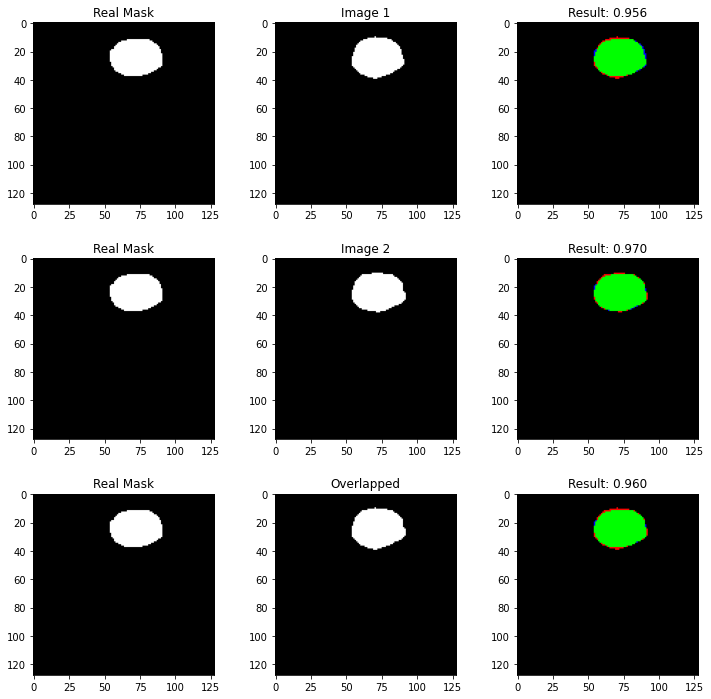

NOT


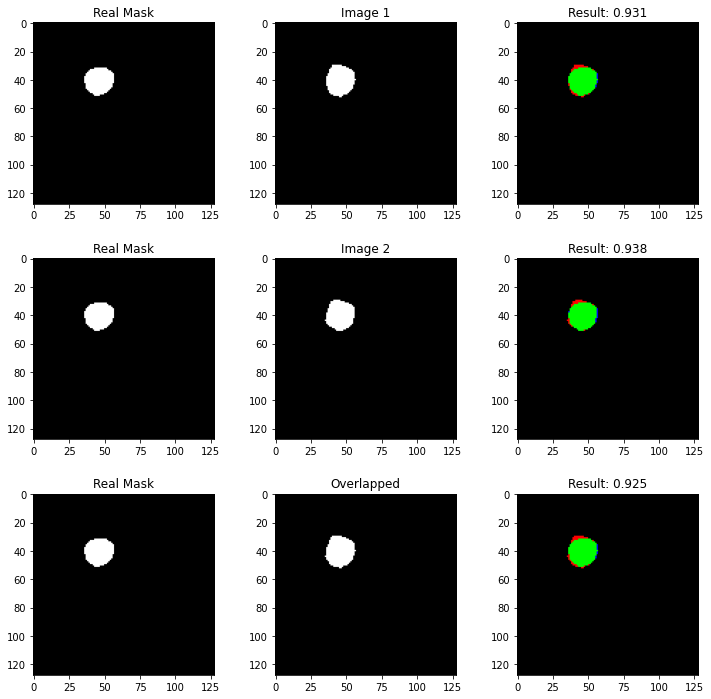

NOT


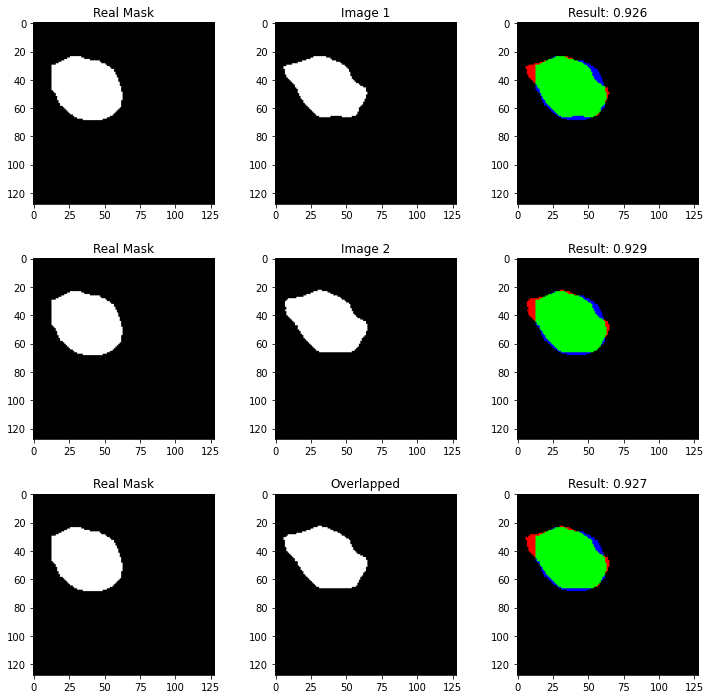

IMPROVED


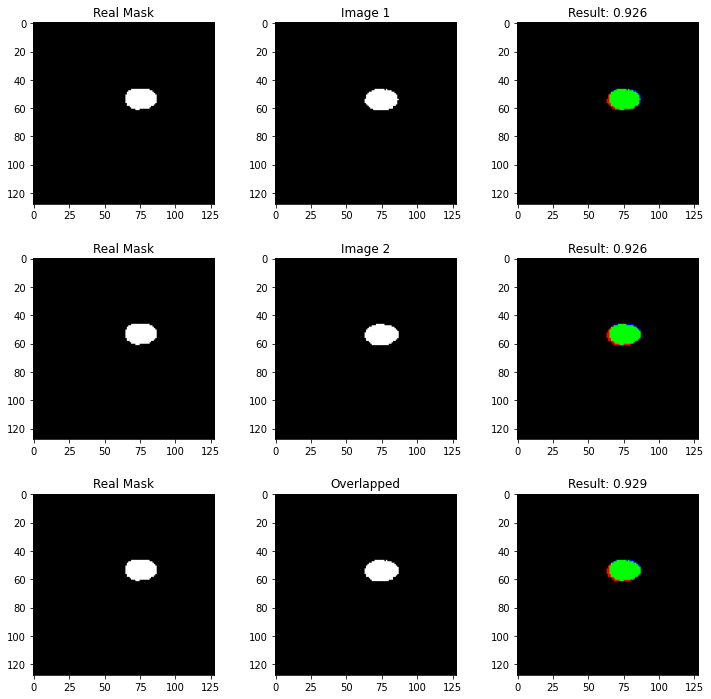

NOT


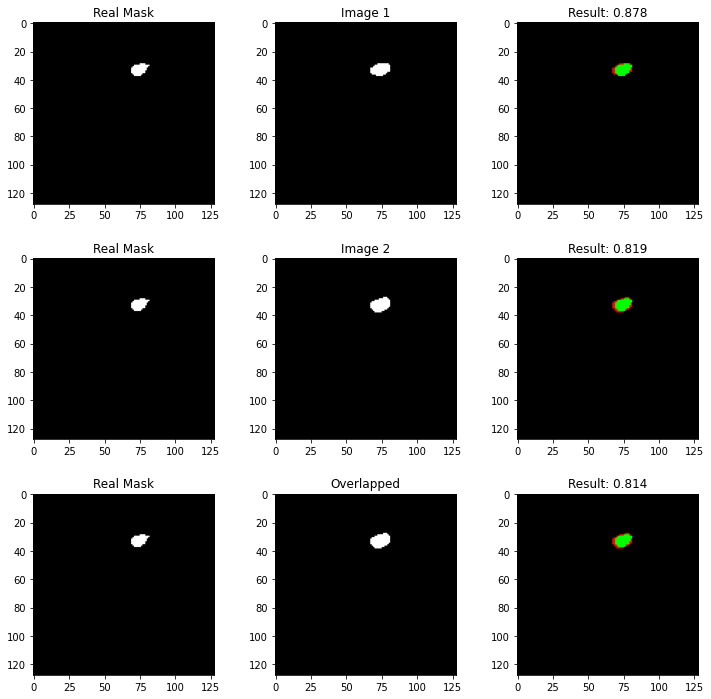

NOT


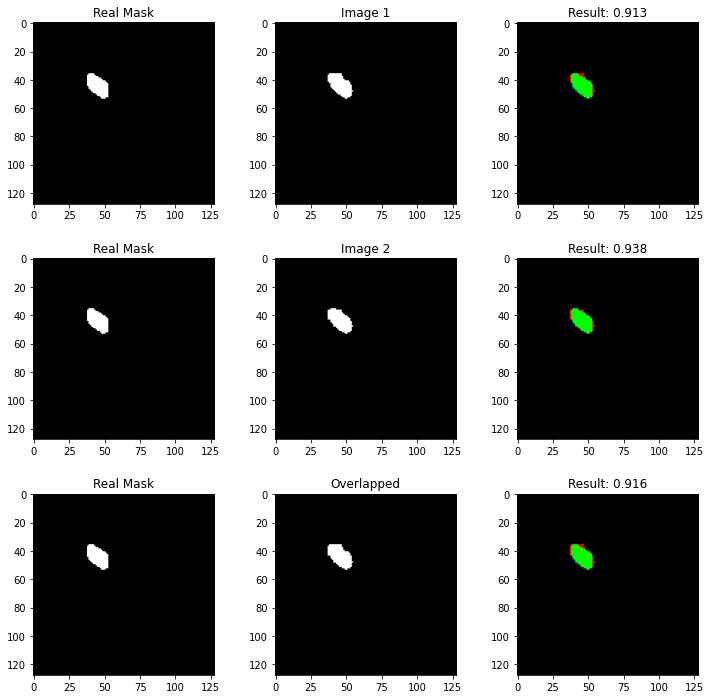

IMPROVED


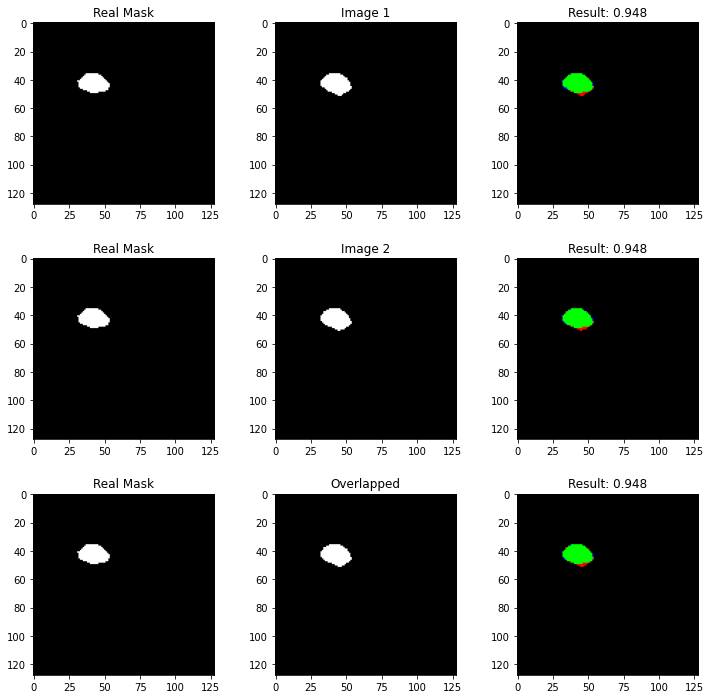

IMPROVED


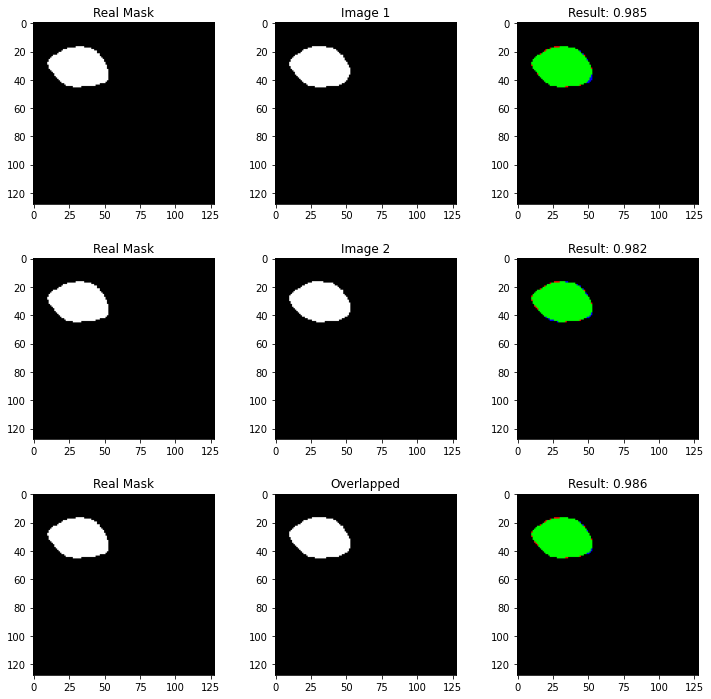

NOT


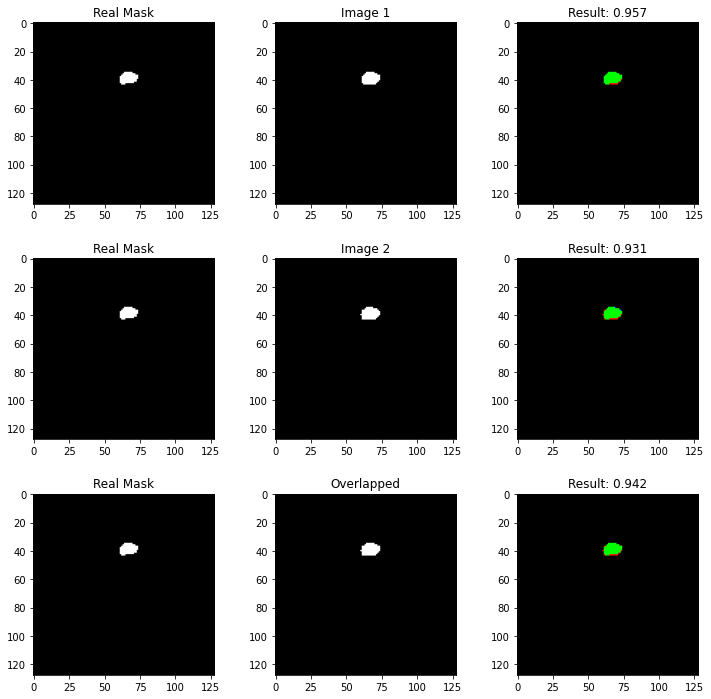

NOT


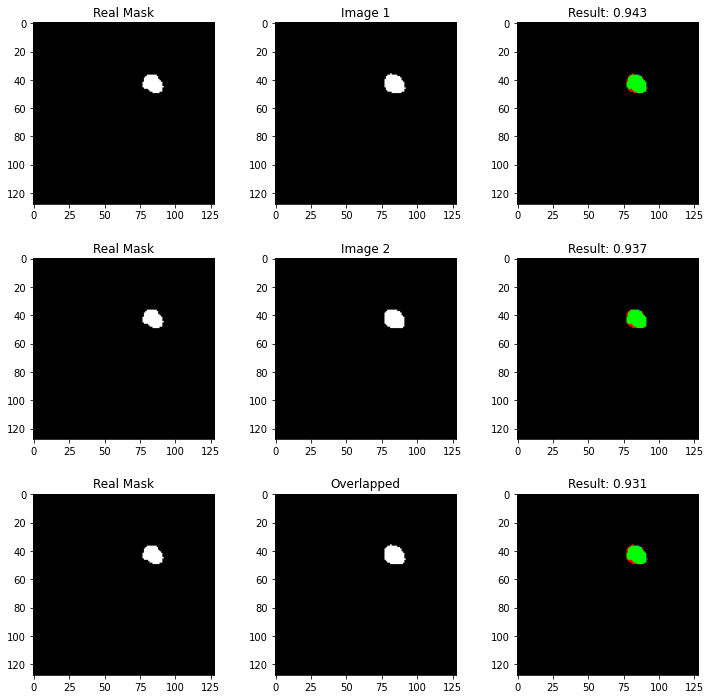

NOT


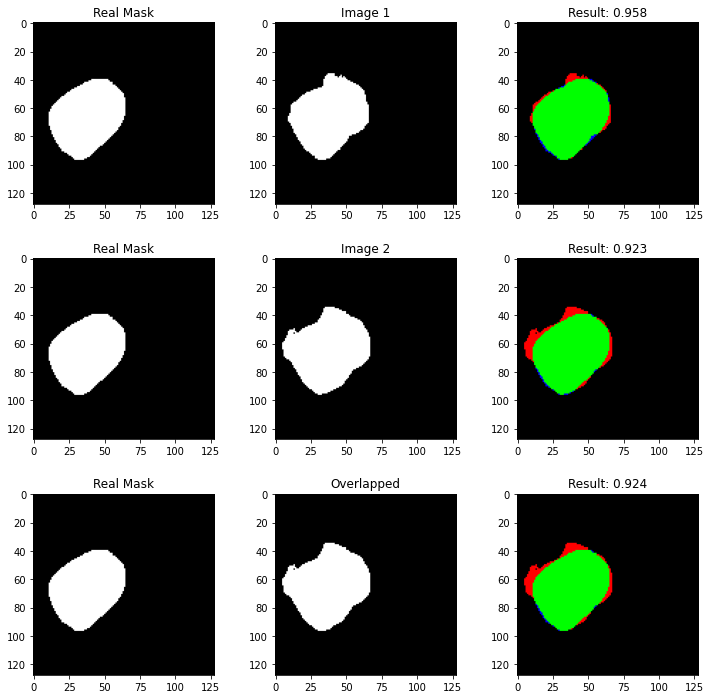

NOT


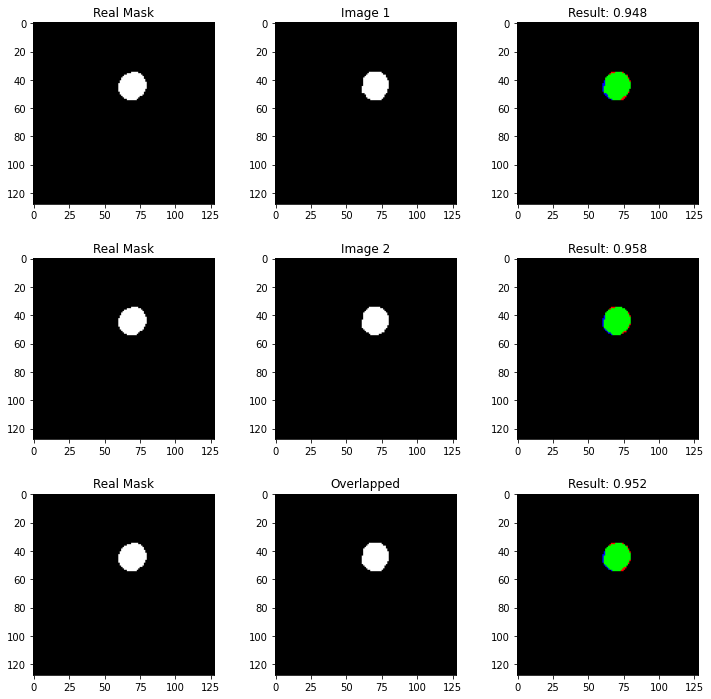

NOT


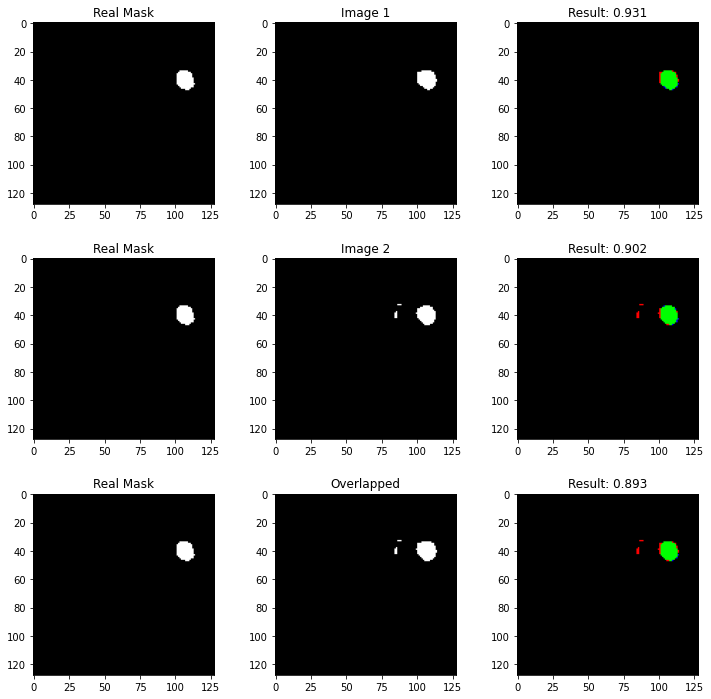

NOT


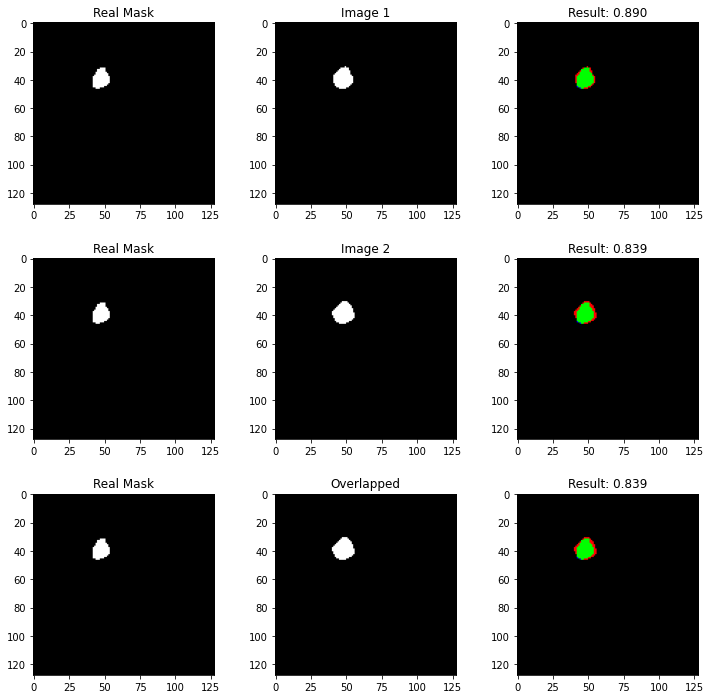

NOT


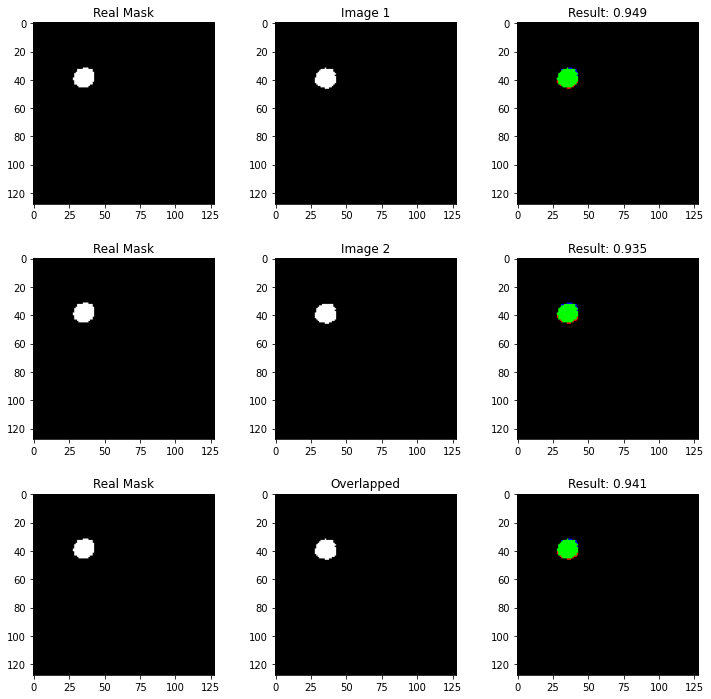

IMPROVED


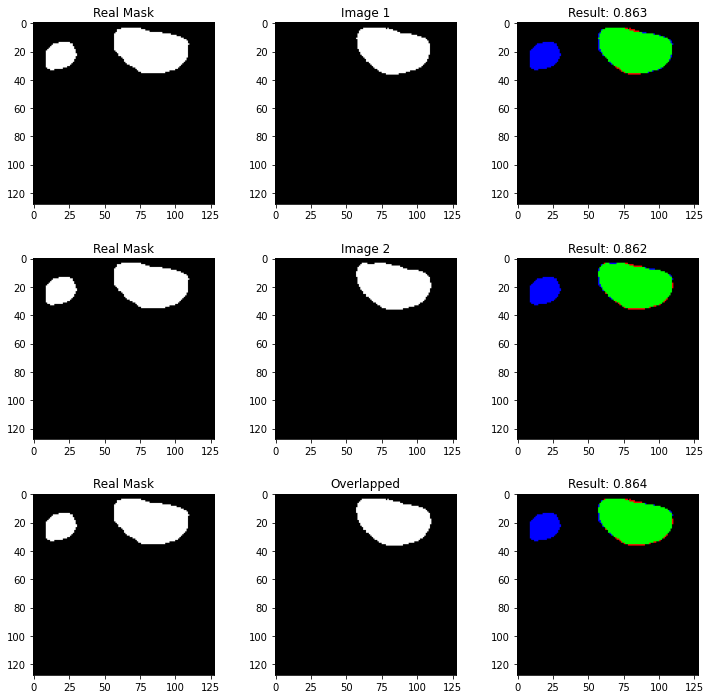

NOT


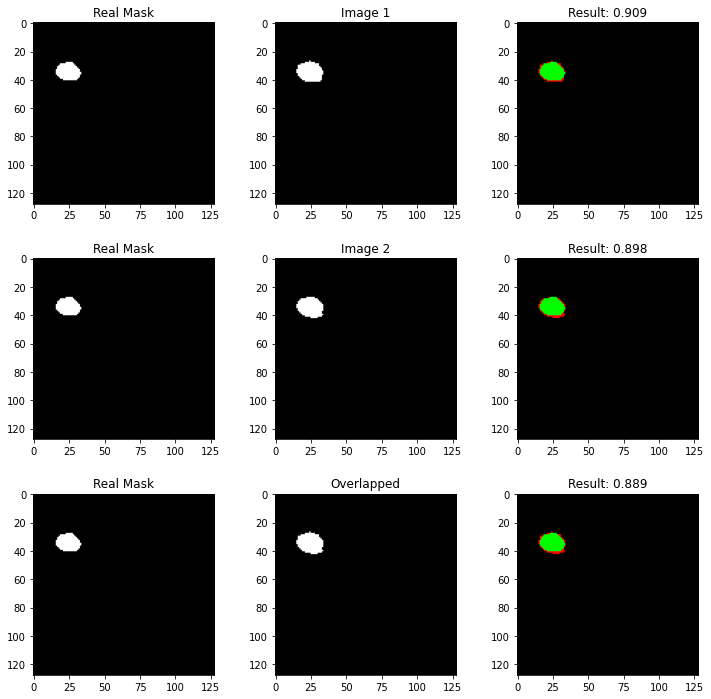

NOT


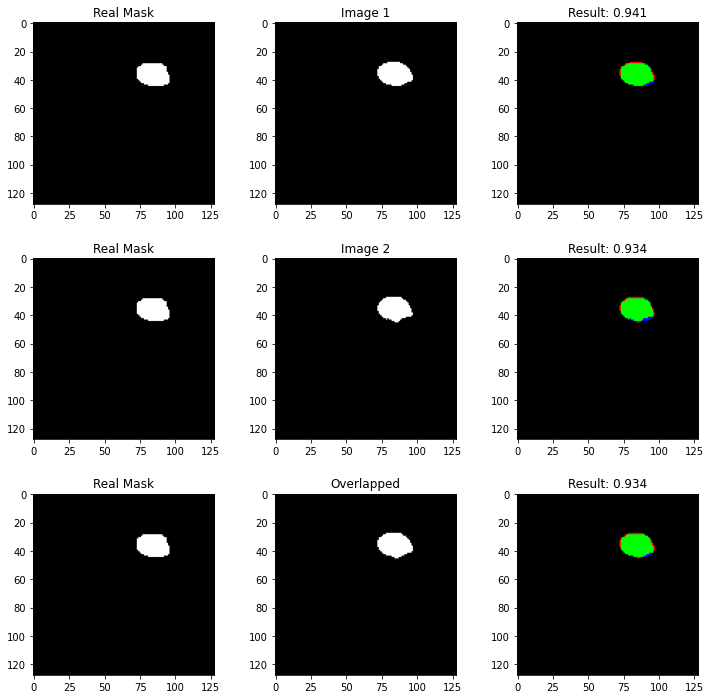

NOT


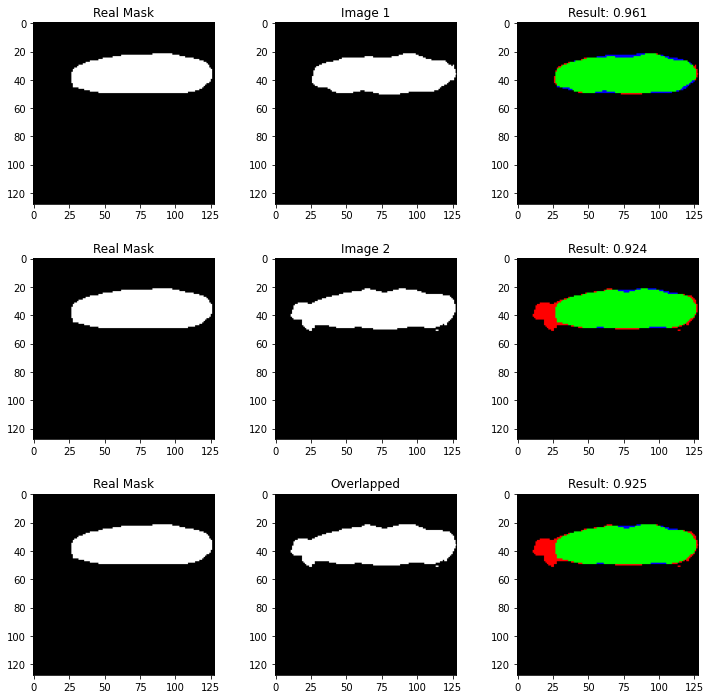

IMPROVED


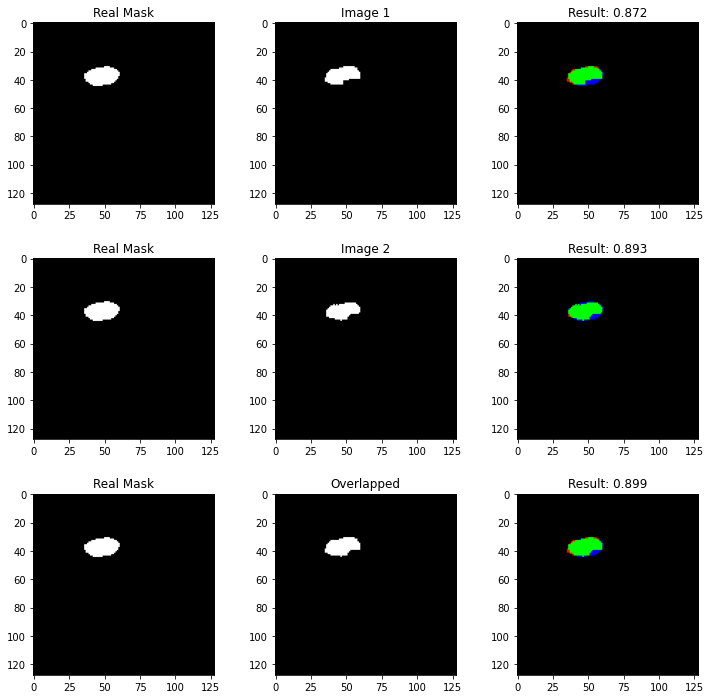

NOT


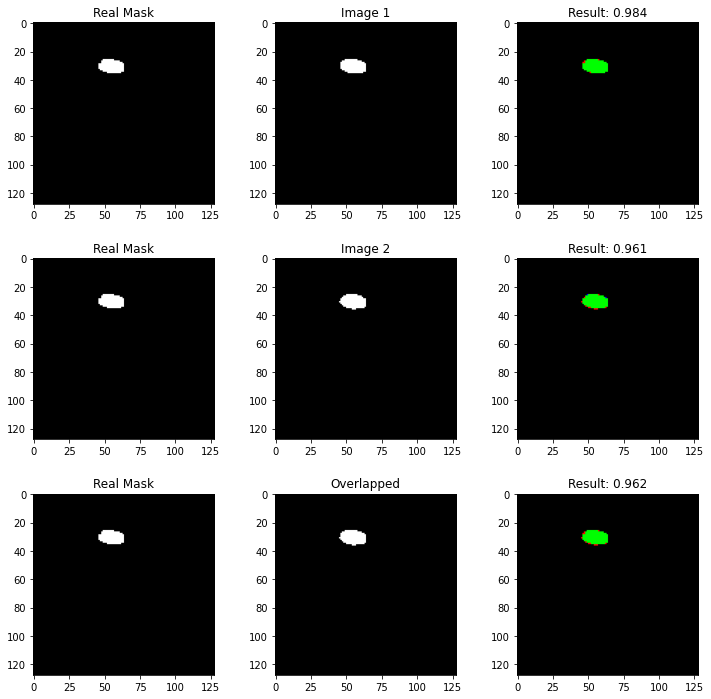

NOT


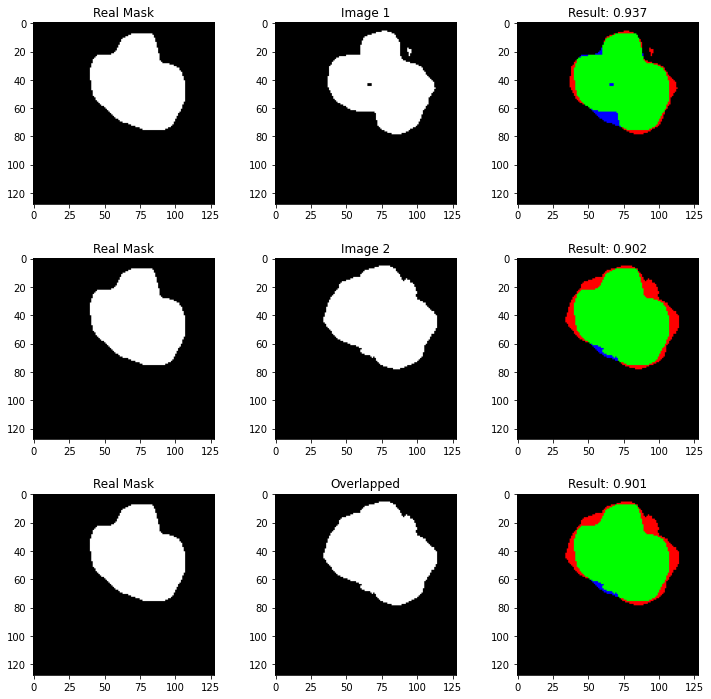

IMPROVED


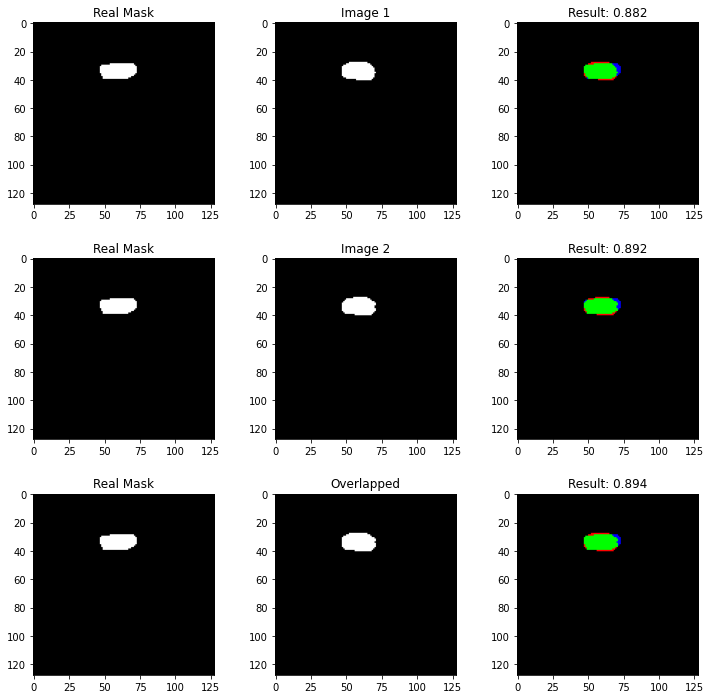

IMPROVED


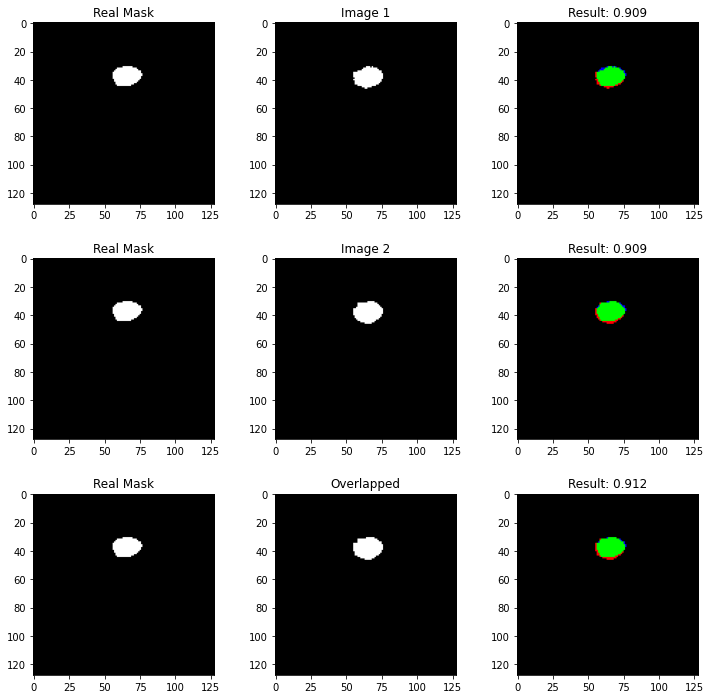

IMPROVED


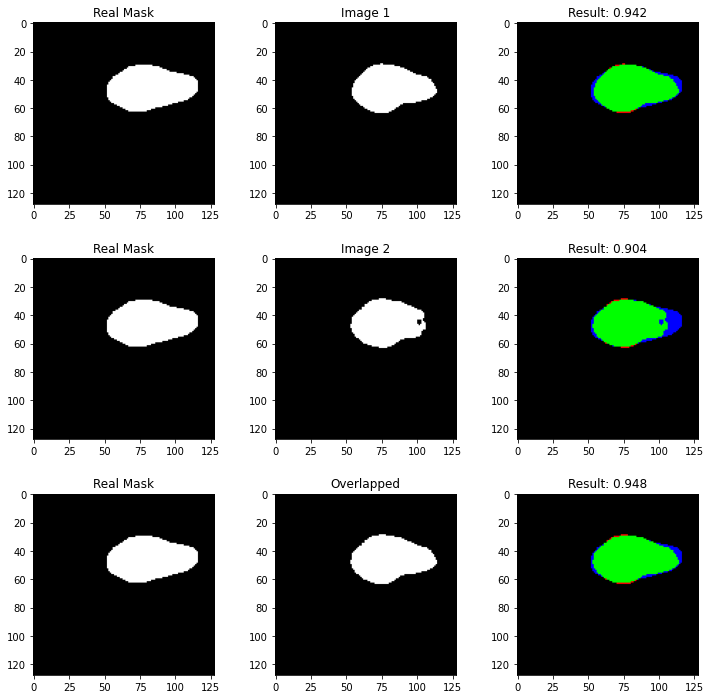

NOT


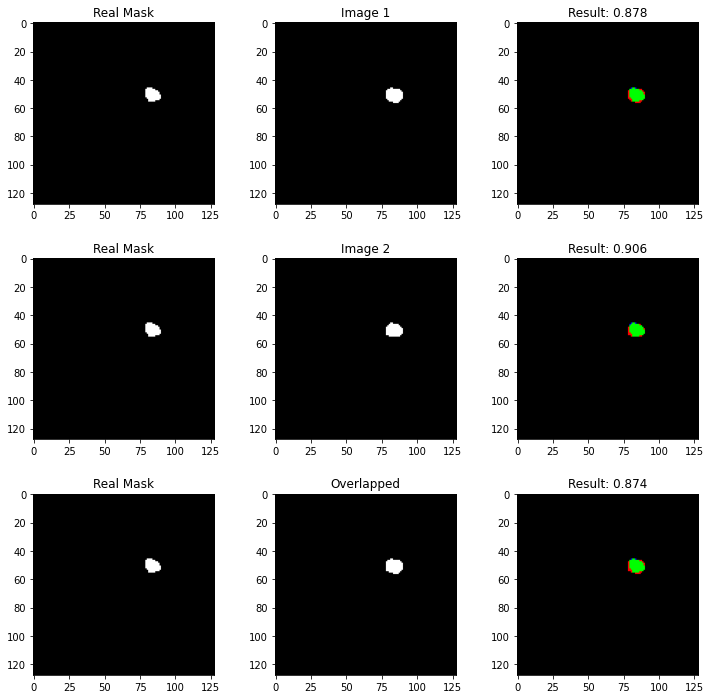

NOT


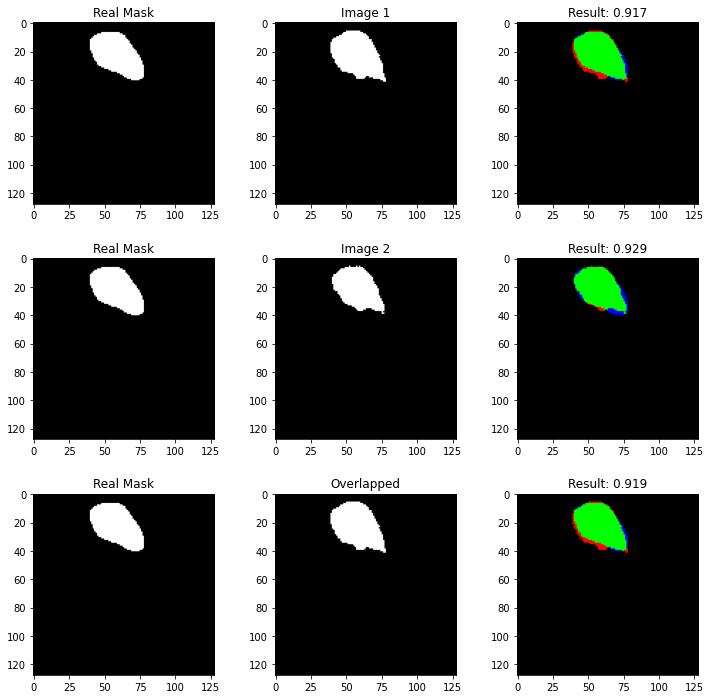

NOT


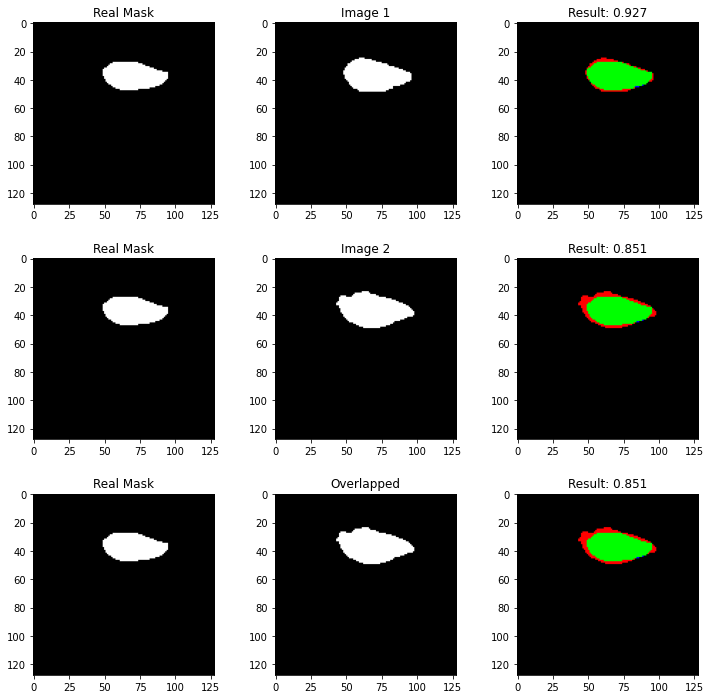

NOT


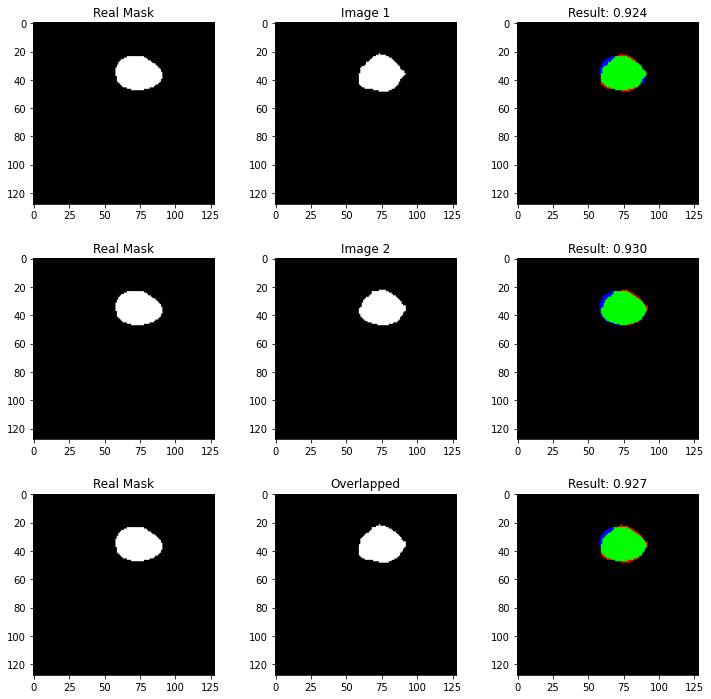

NOT


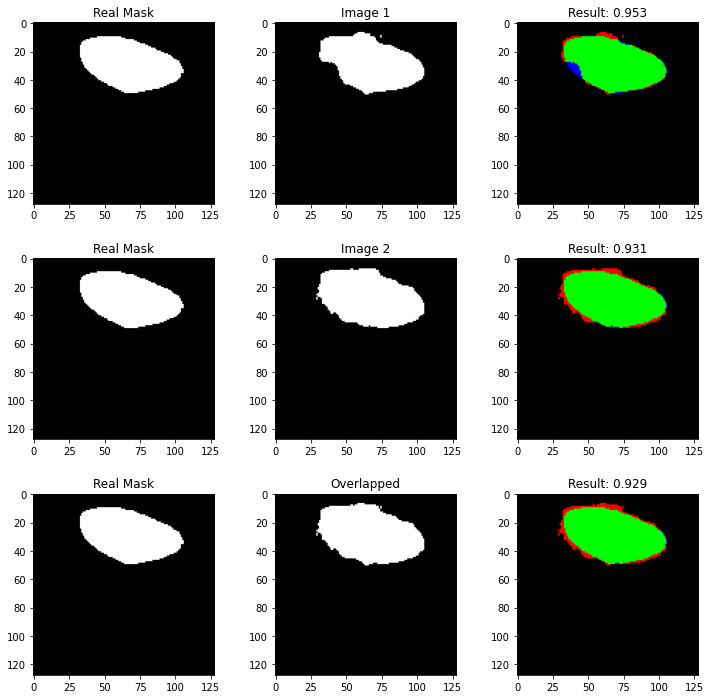

NOT


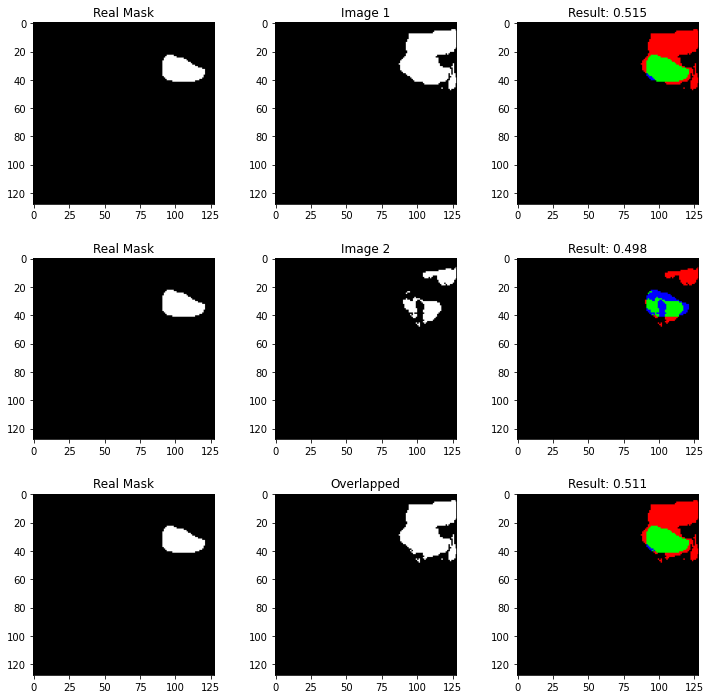

NOT


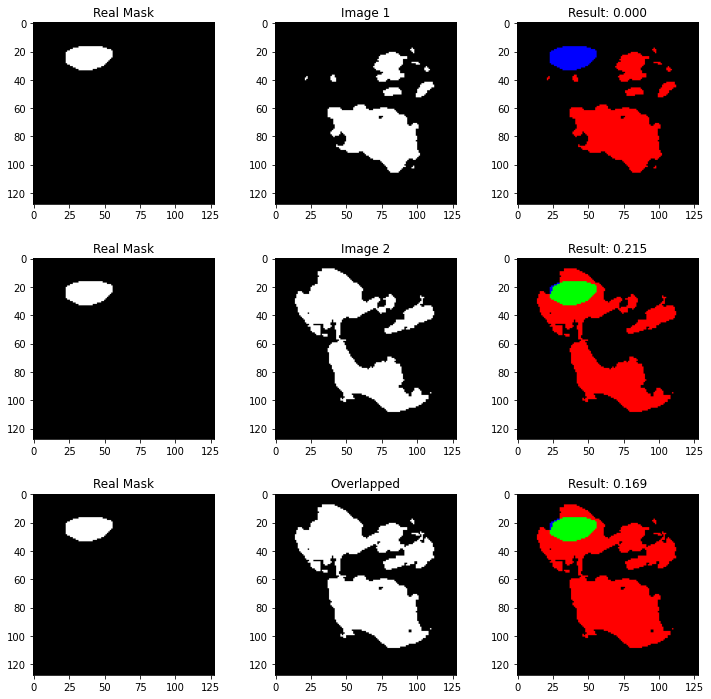

NOT


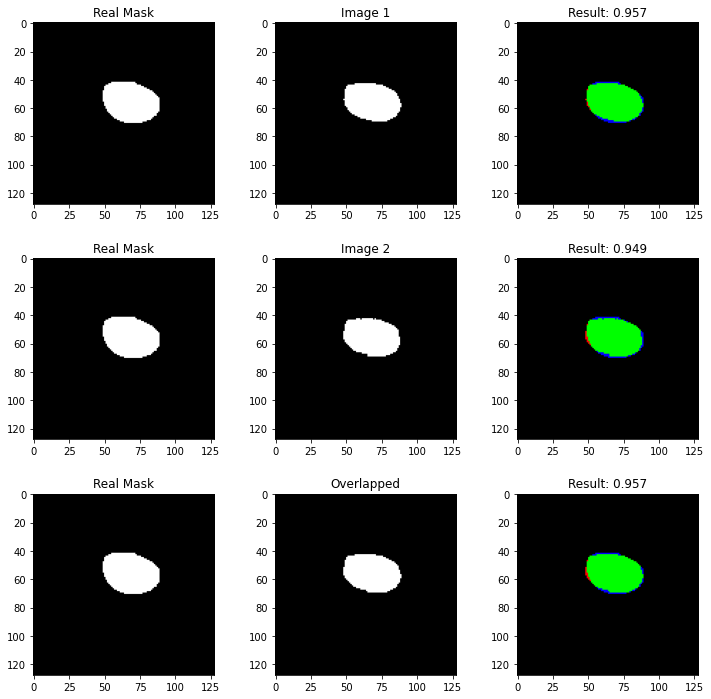

NOT


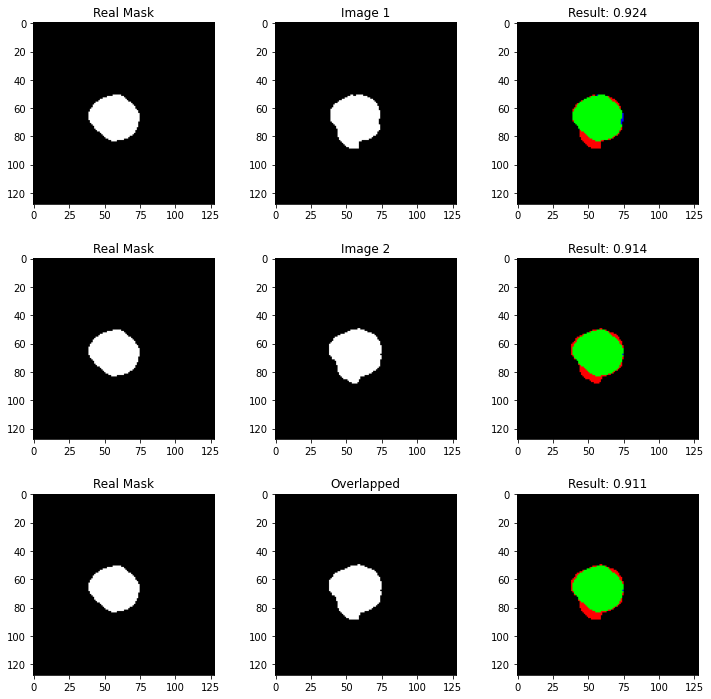

NOT


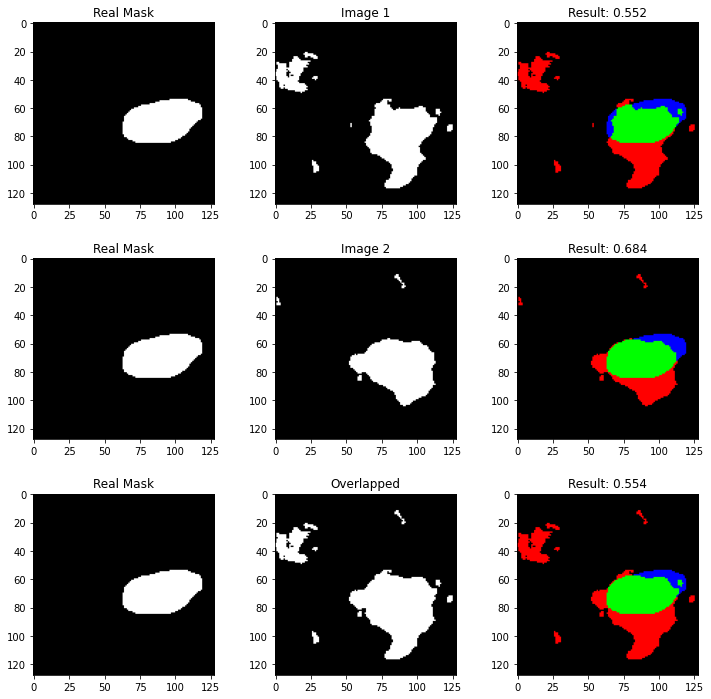

IMPROVED


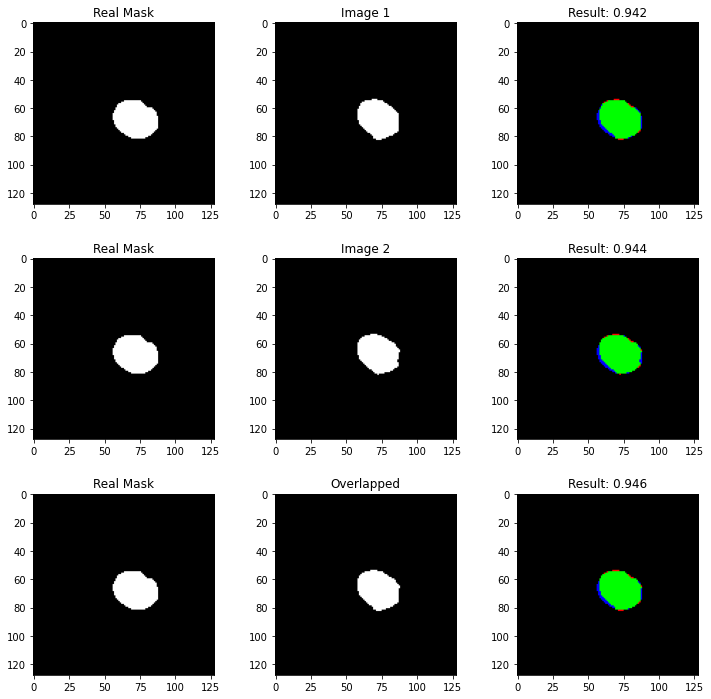

NOT


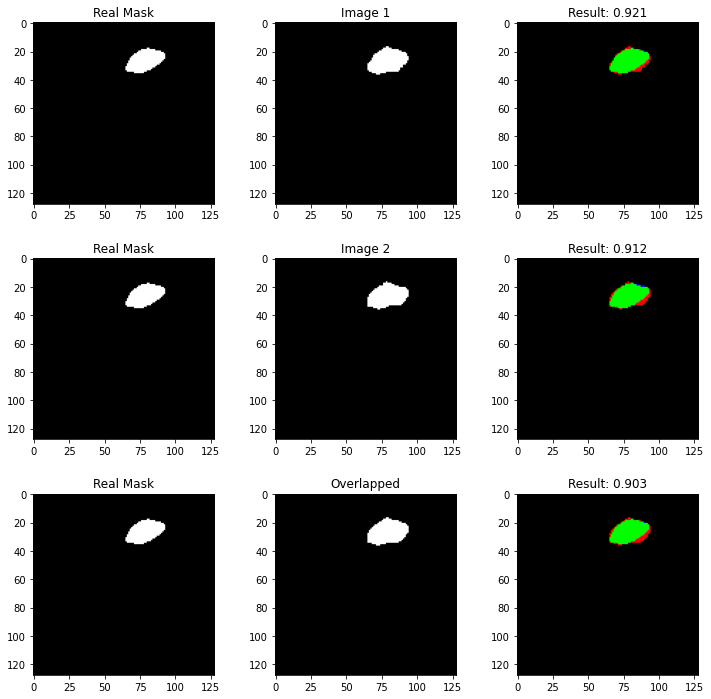

NOT


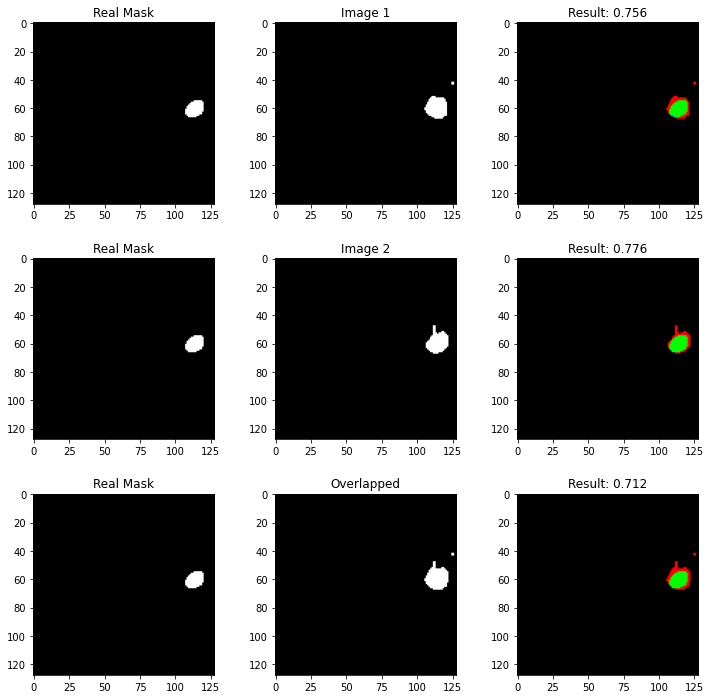

NOT


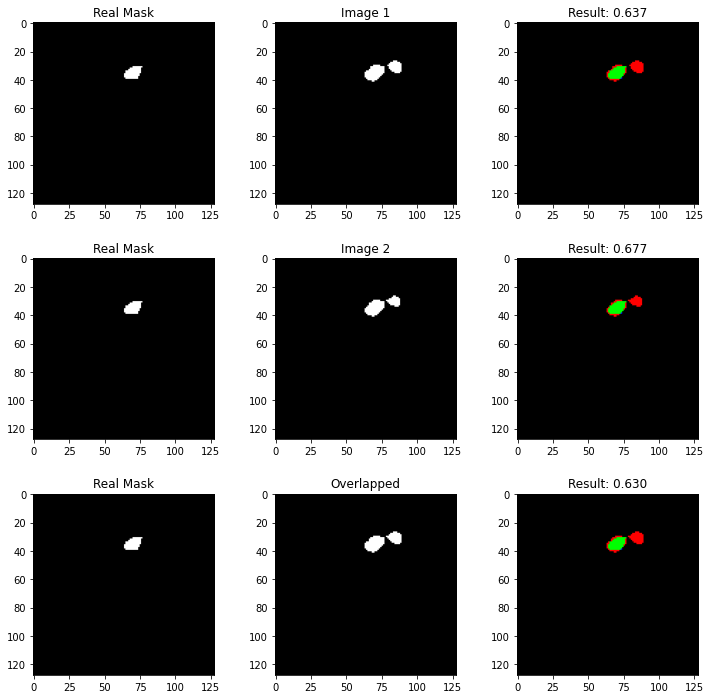

NOT


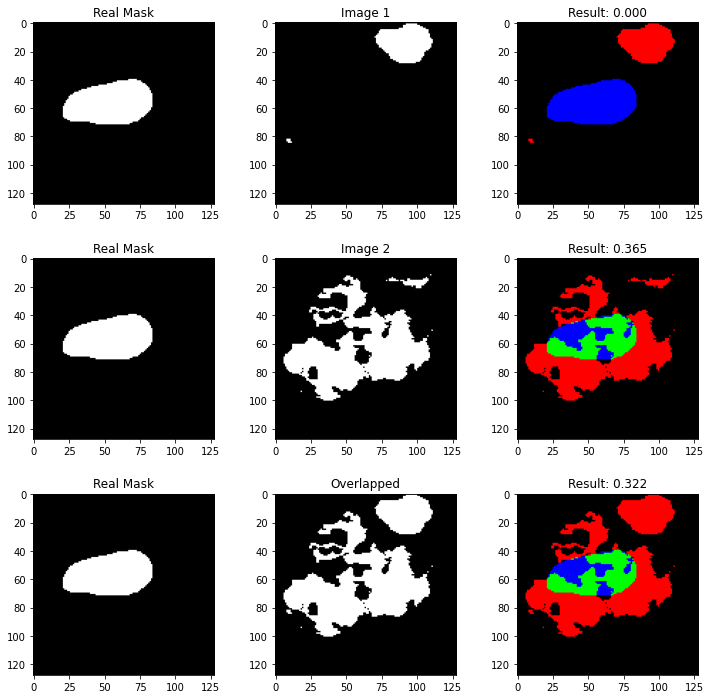

NOT


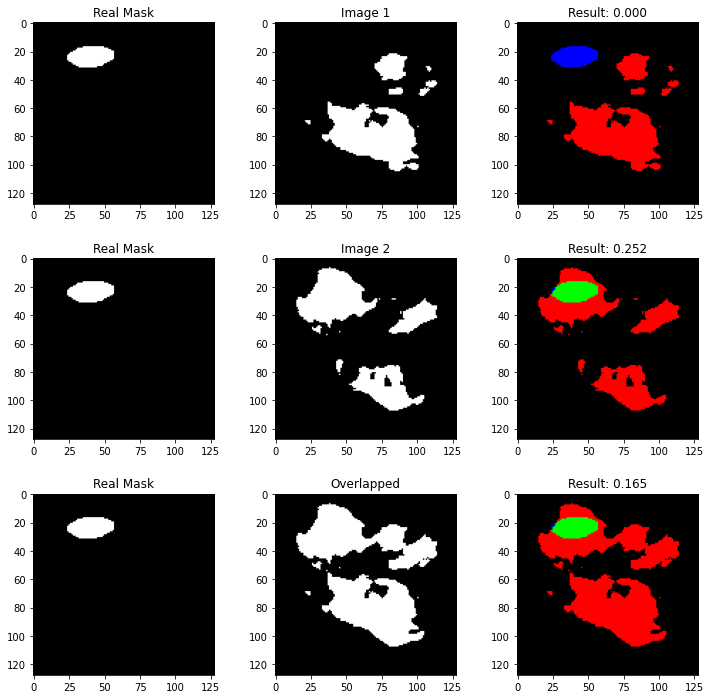

NOT


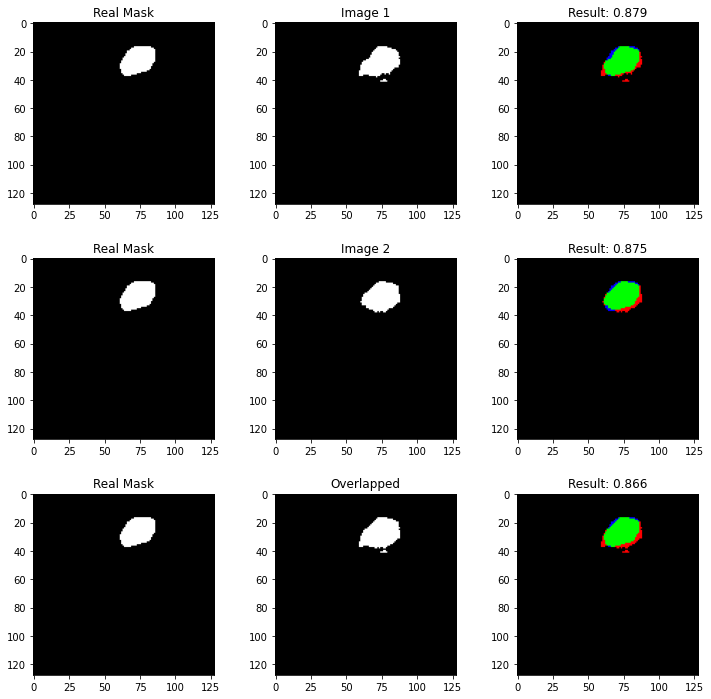

IMPROVED


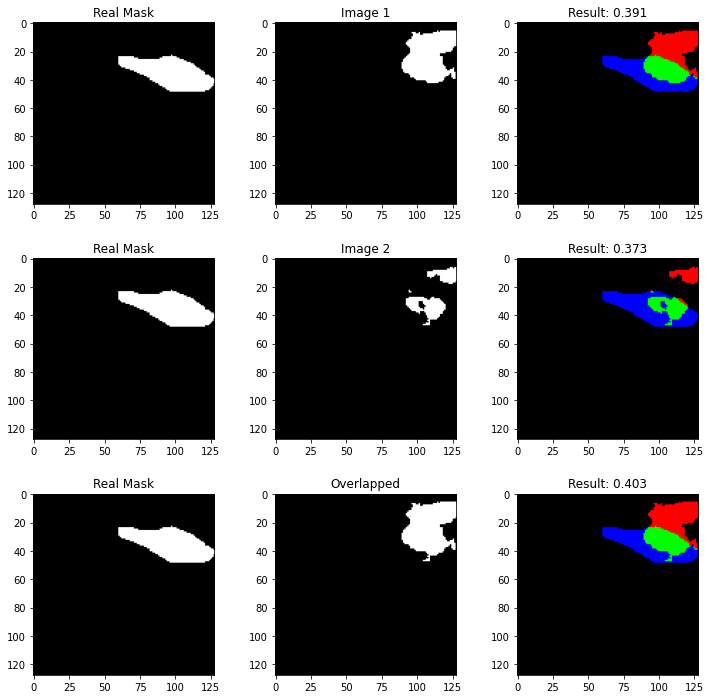

NOT


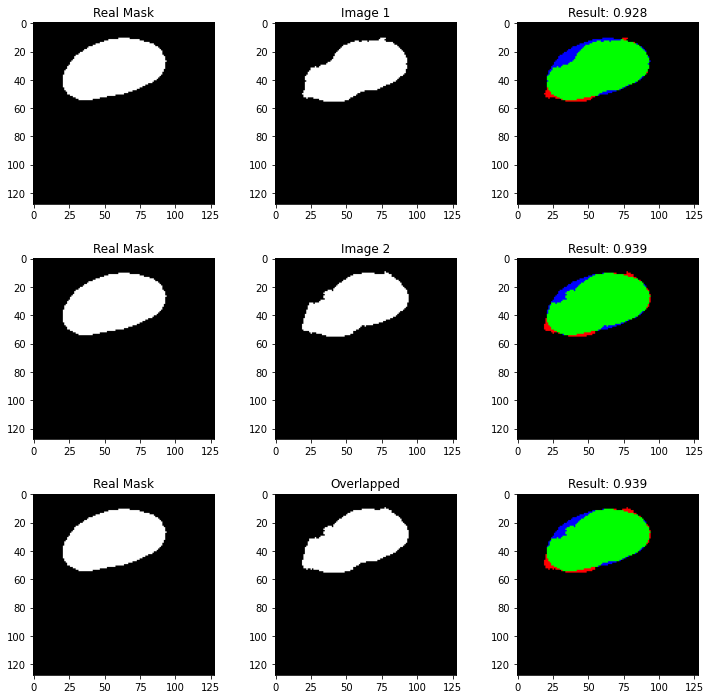

IMPROVED


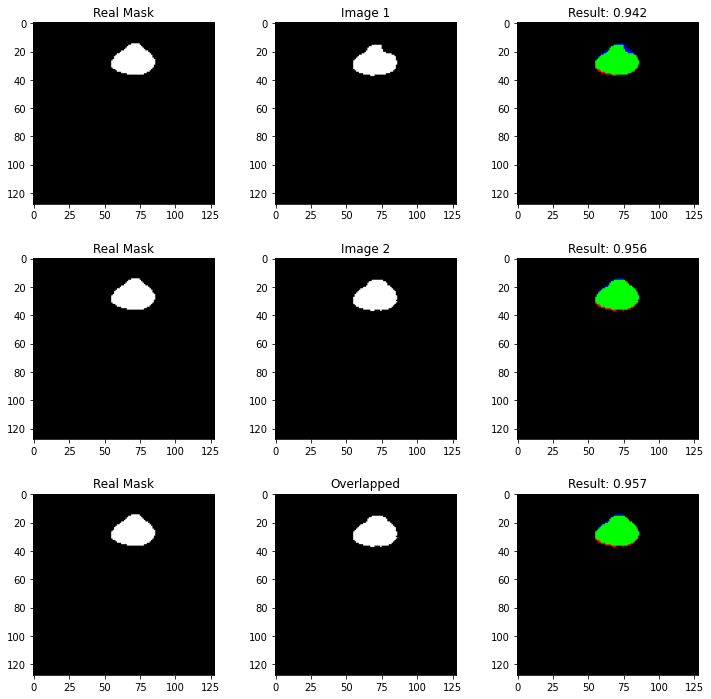

NOT


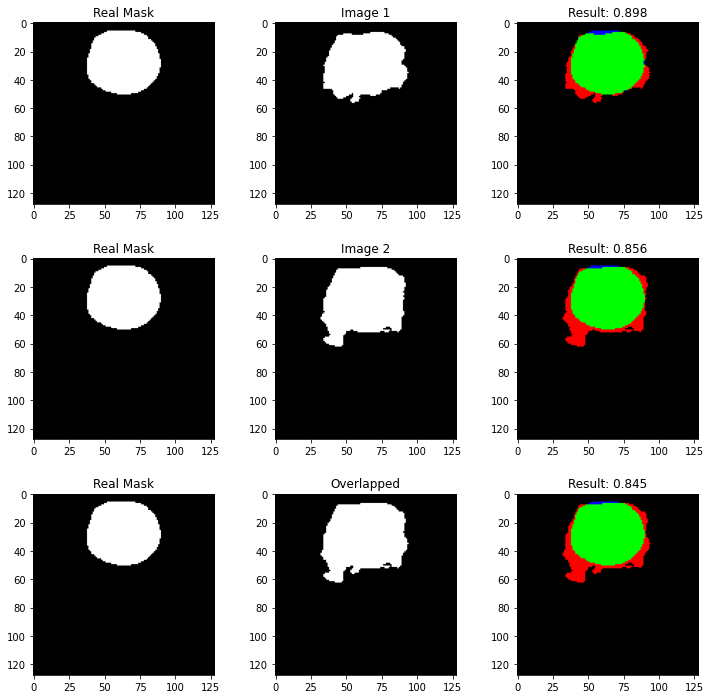

NOT


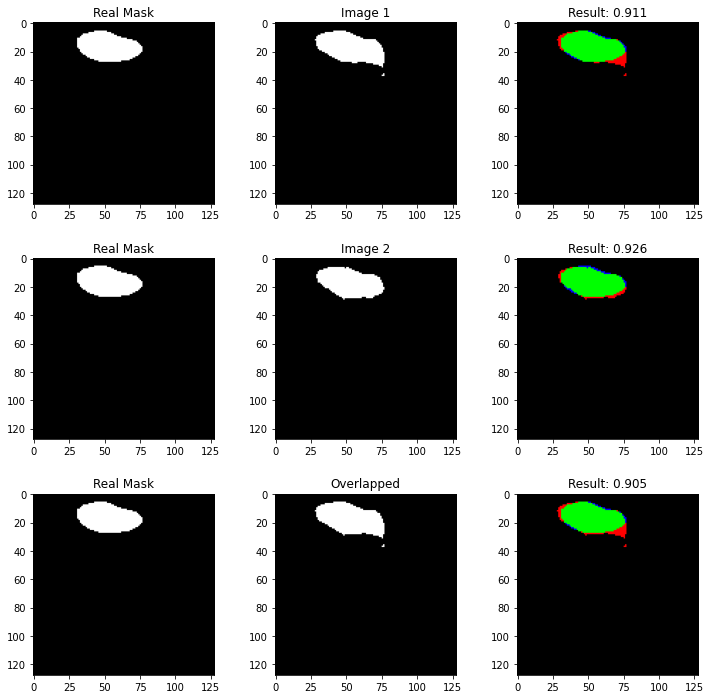

NOT


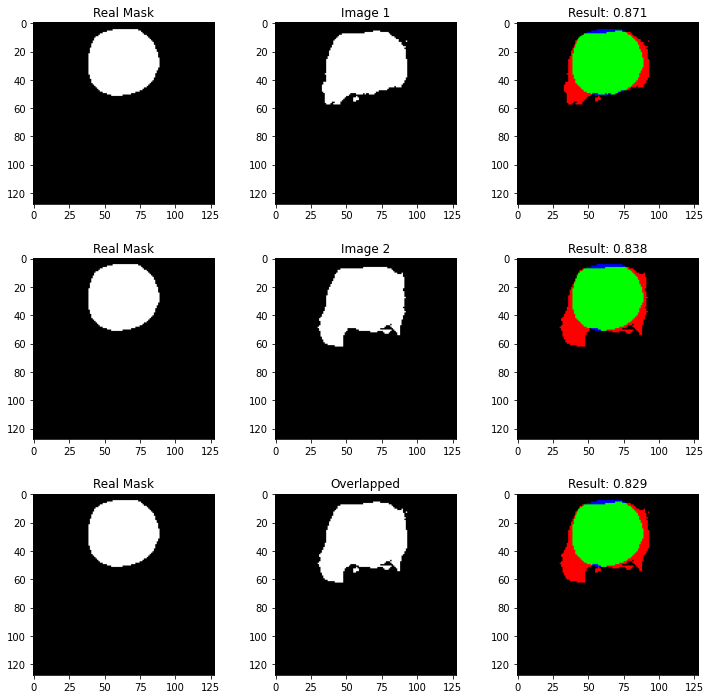

NOT


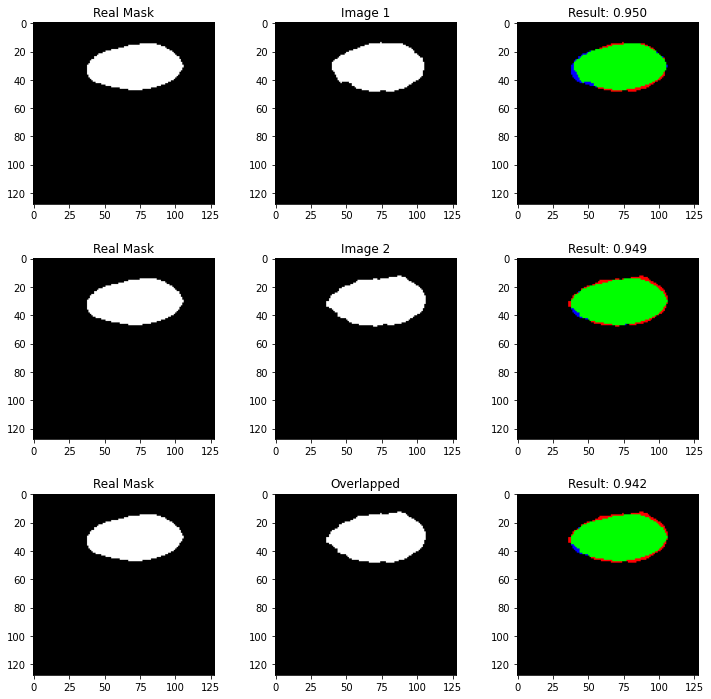

NOT


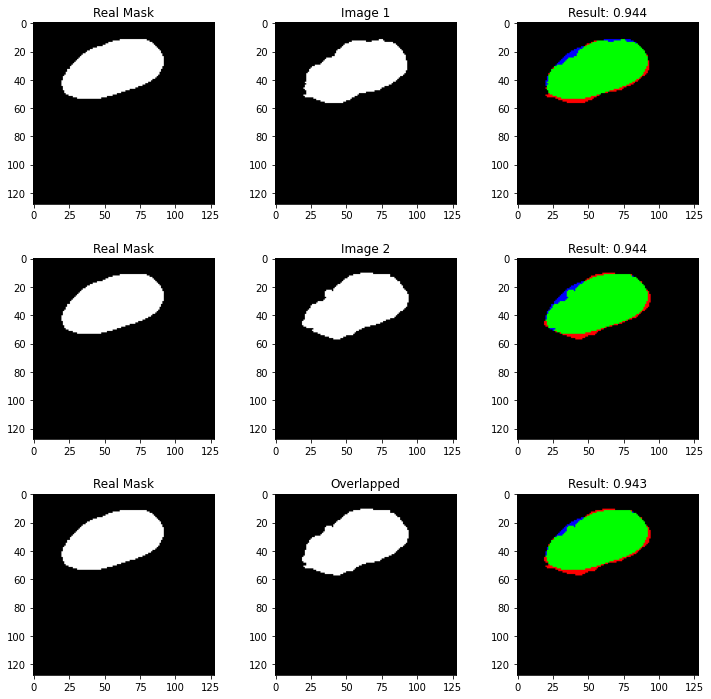

NOT


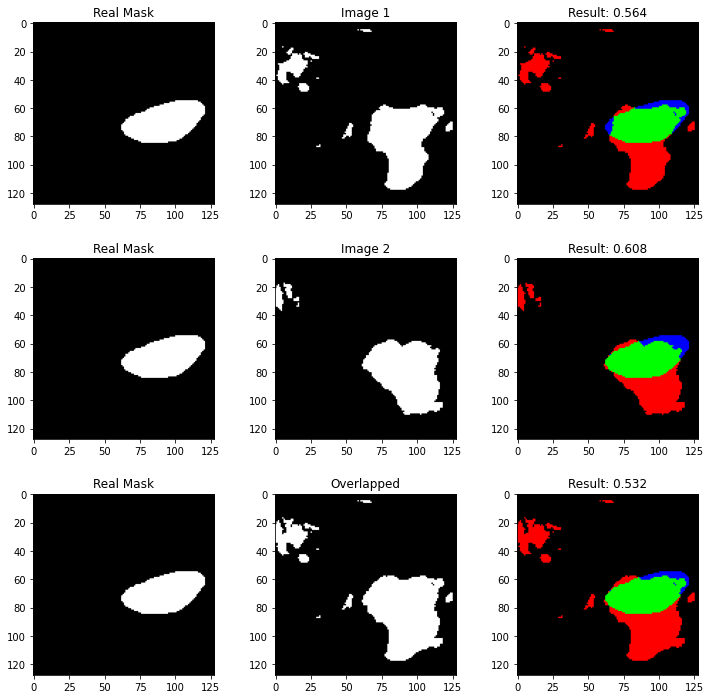

NOT


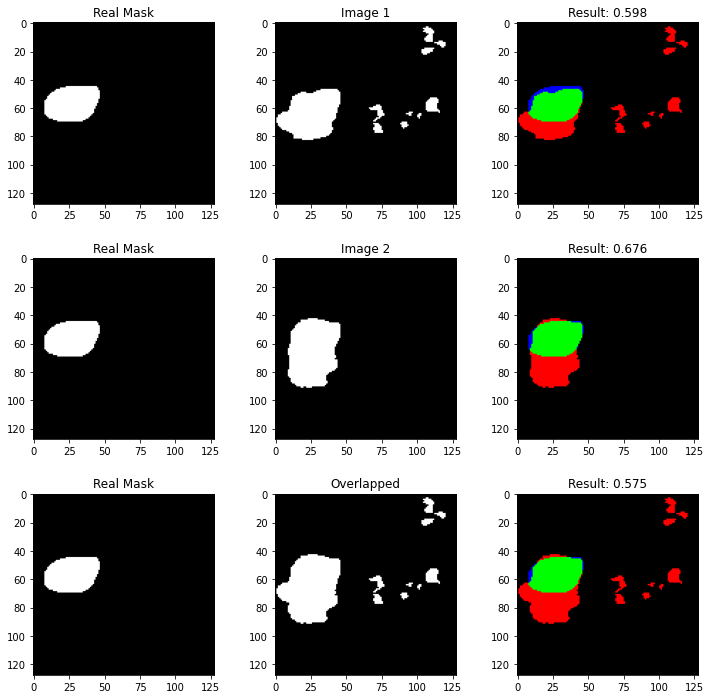

NOT


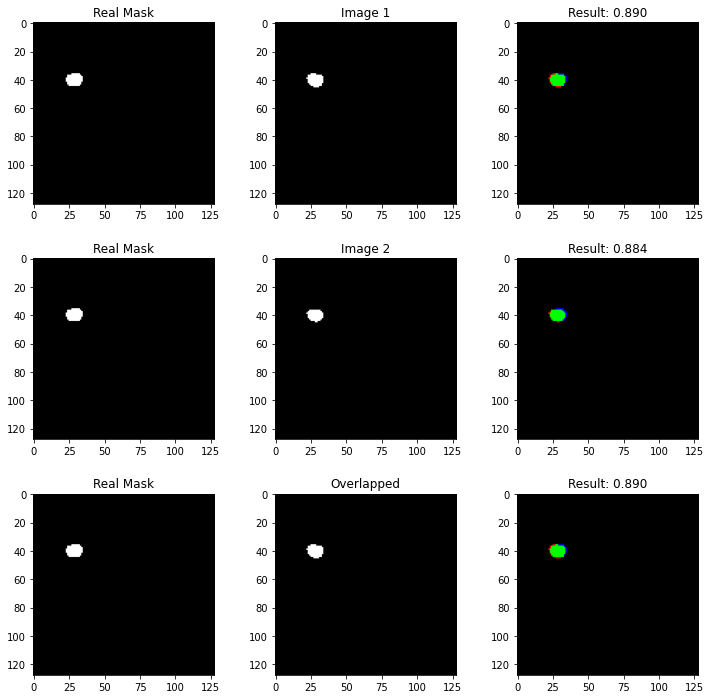

NOT


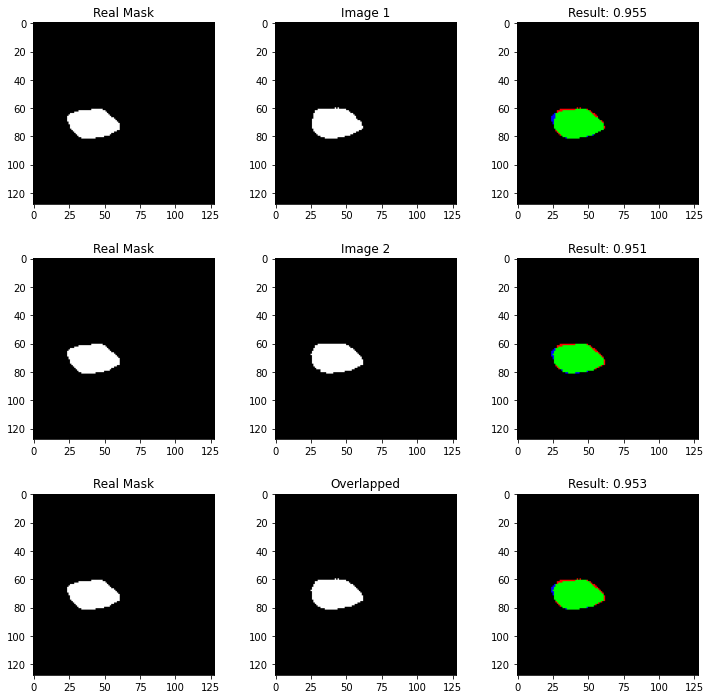

NOT


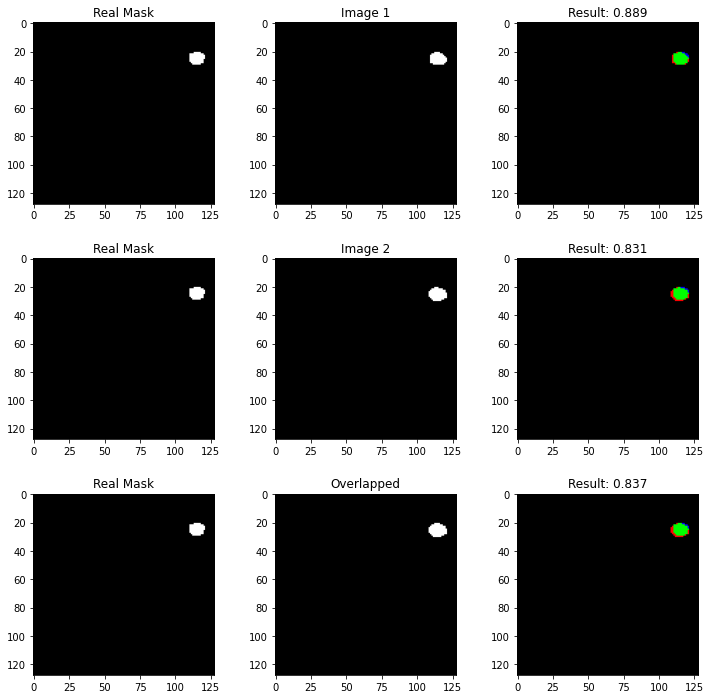

NOT


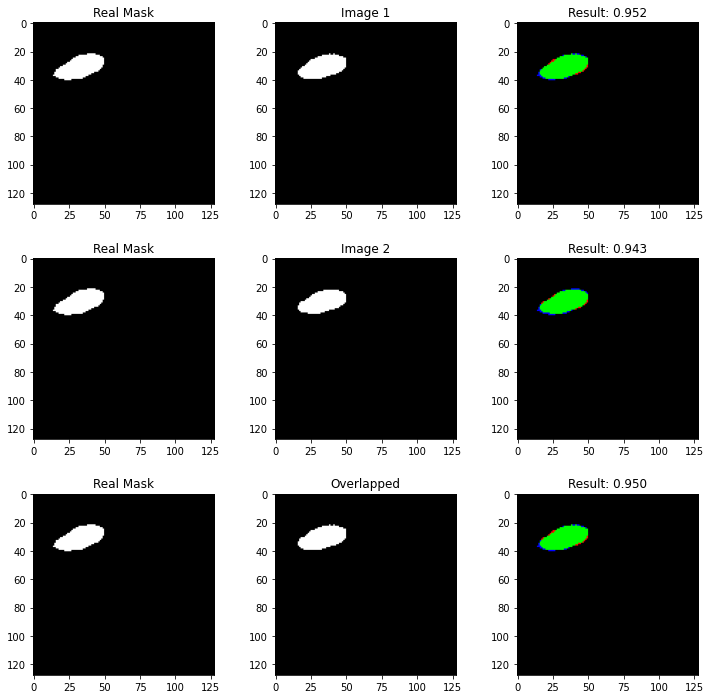

NOT


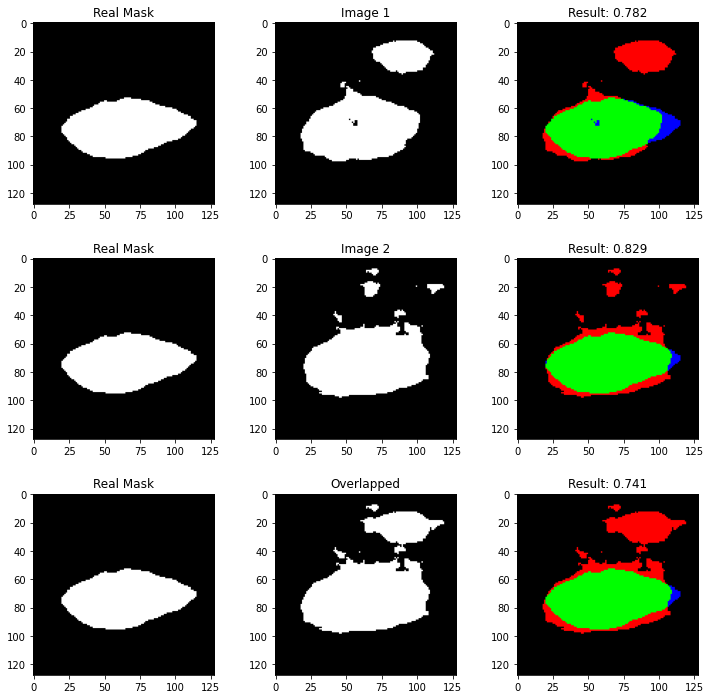

NOT


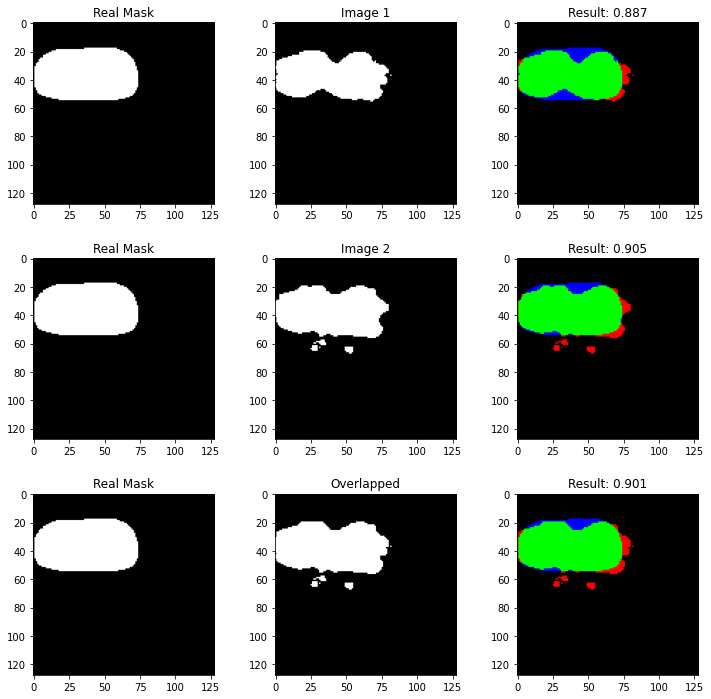

NOT


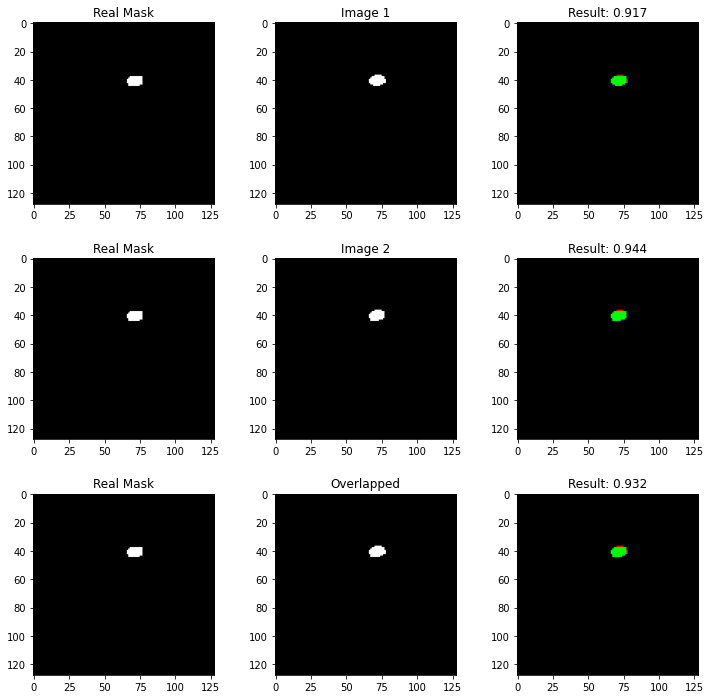

NOT


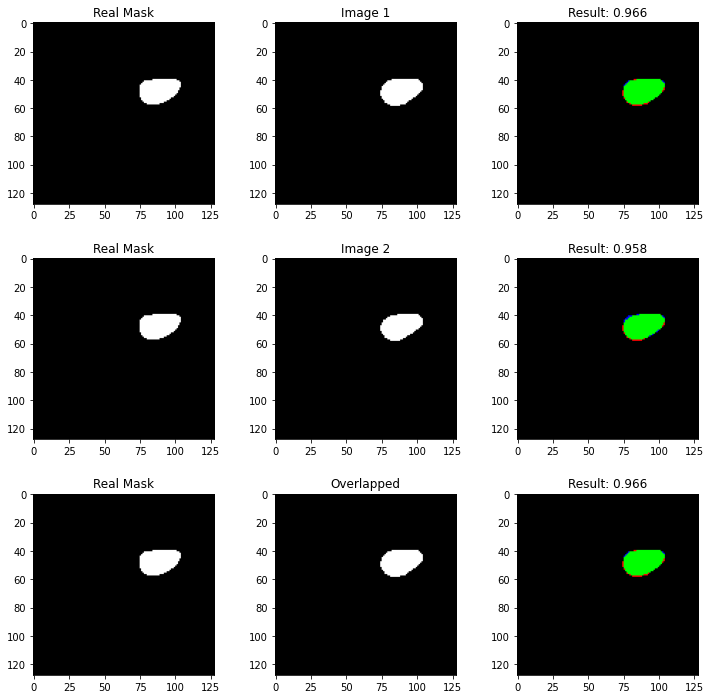

IMPROVED


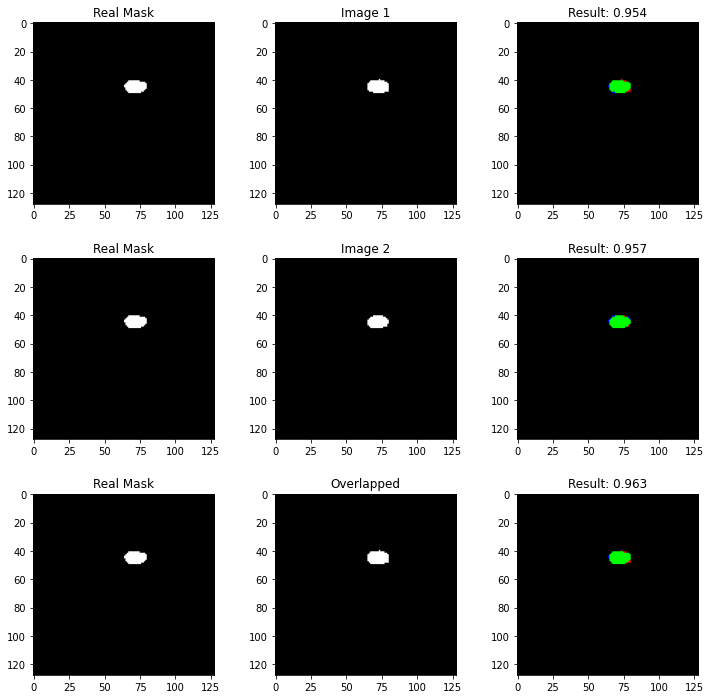

NOT


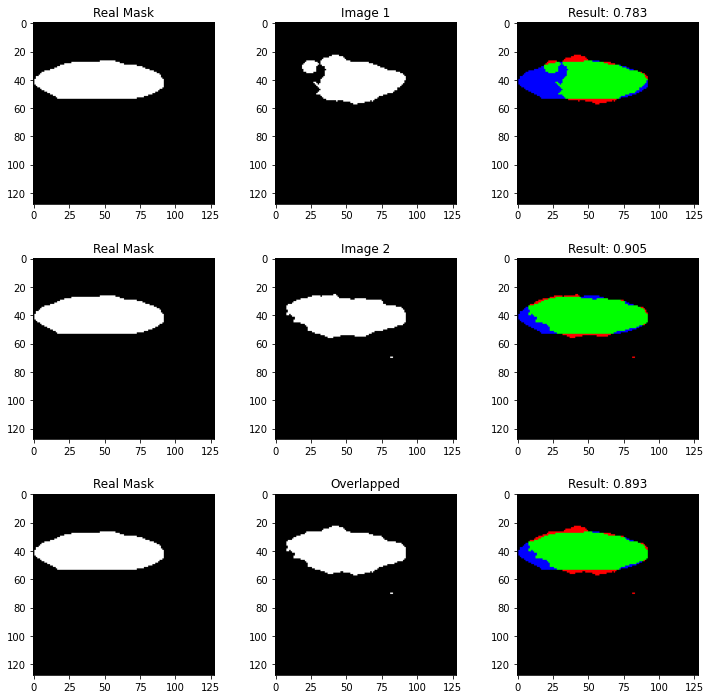

NOT


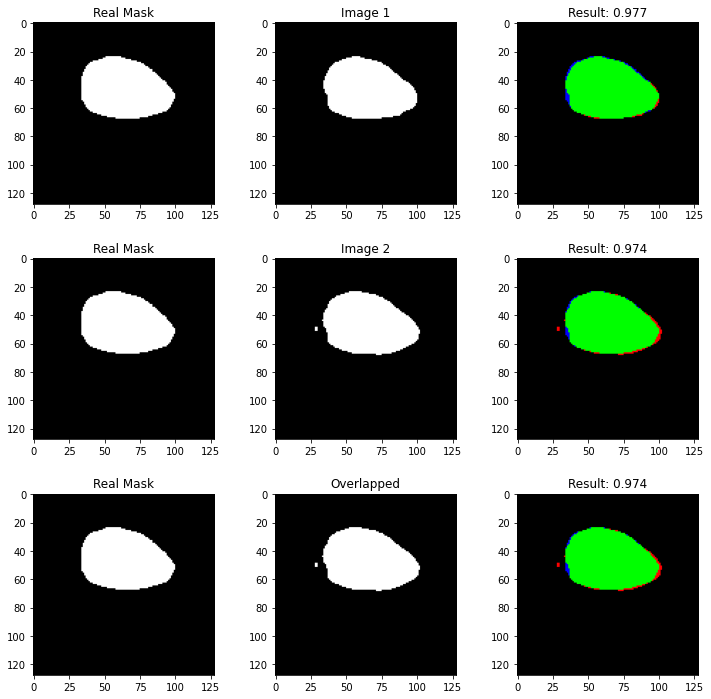

NOT


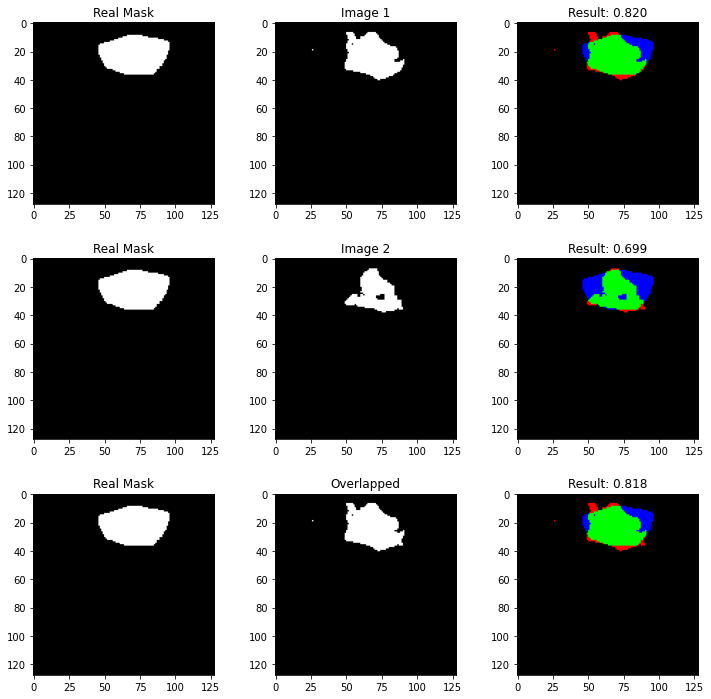

NOT


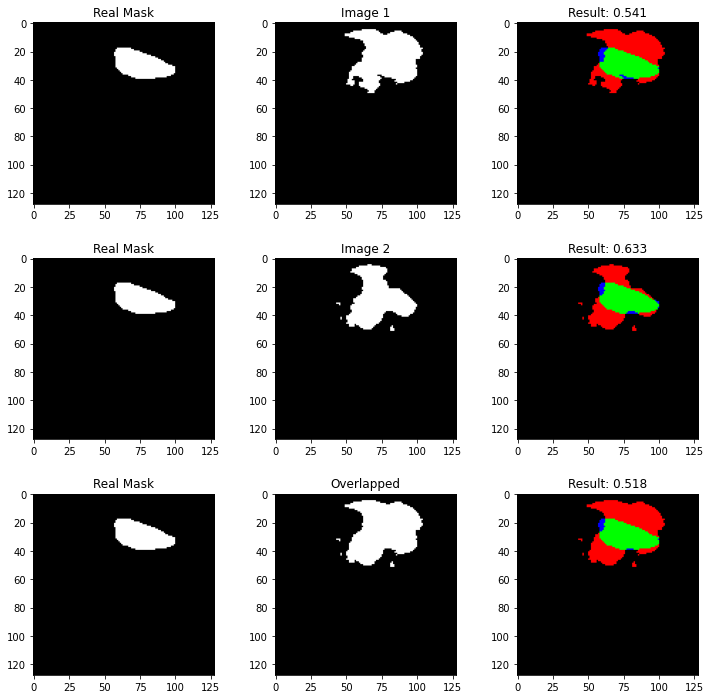

NOT


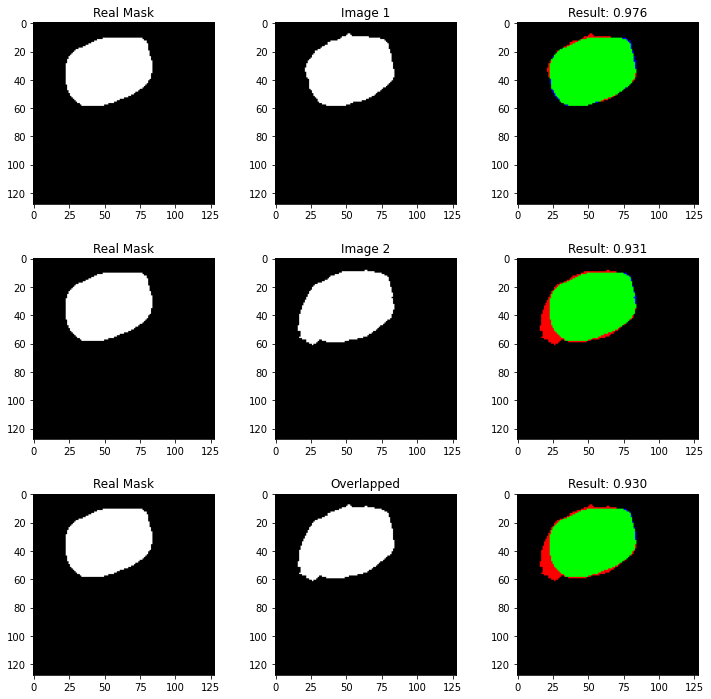

NOT


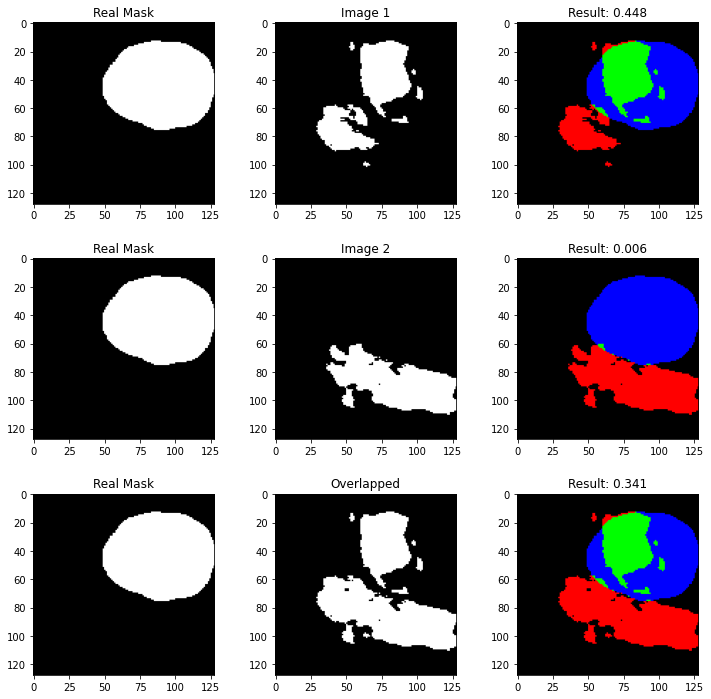

NOT


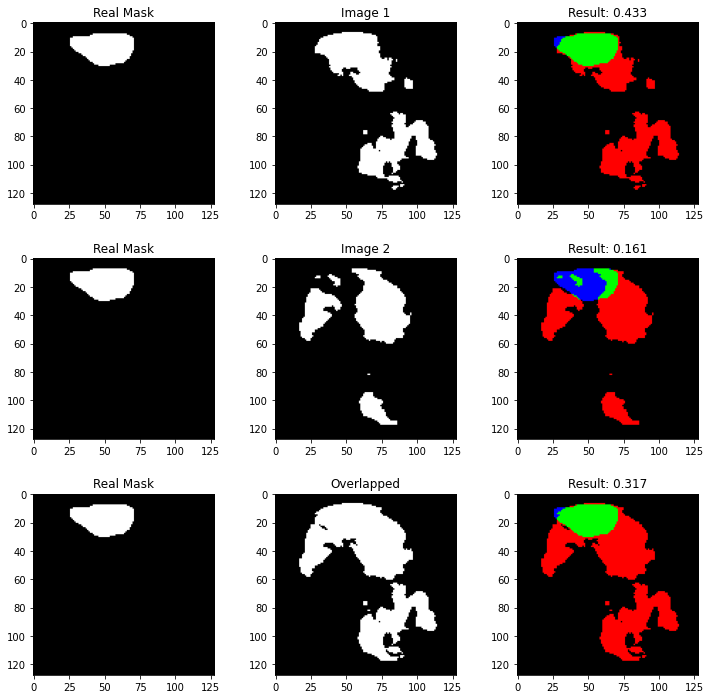

NOT


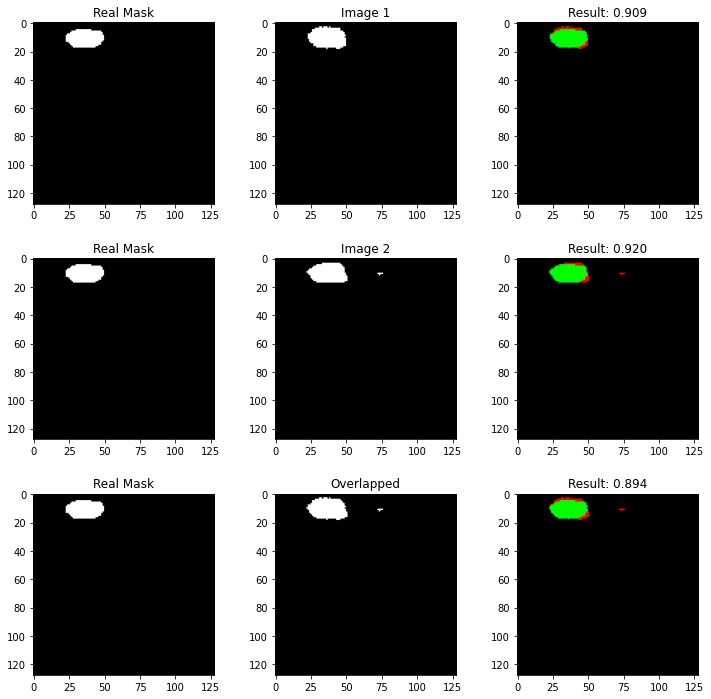

NOT


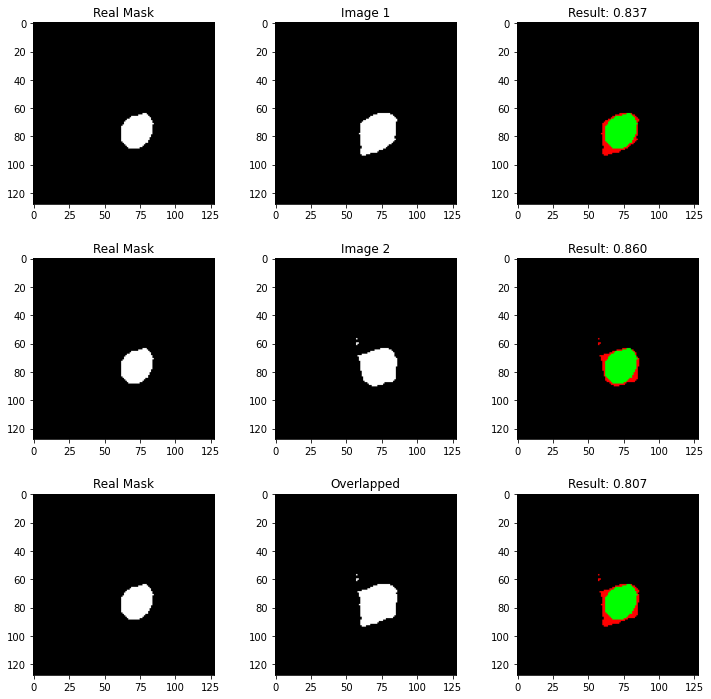

NOT


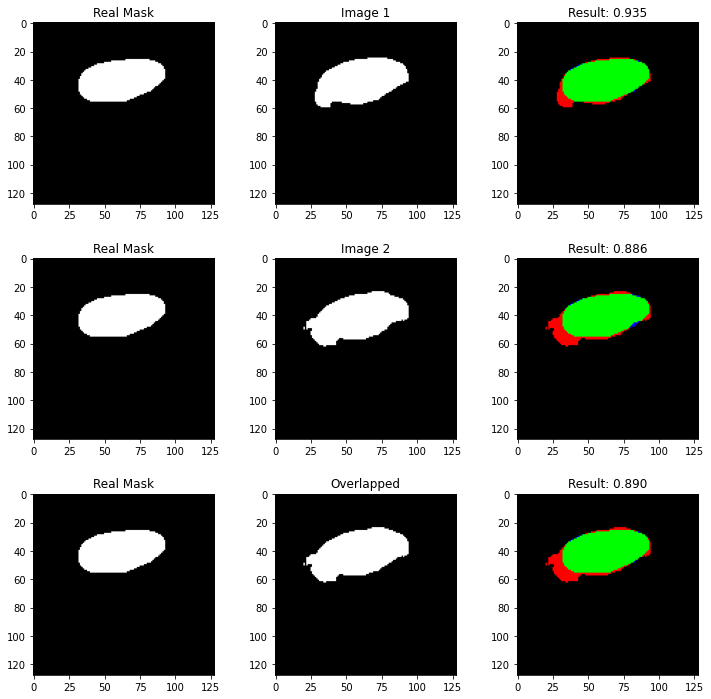

NOT


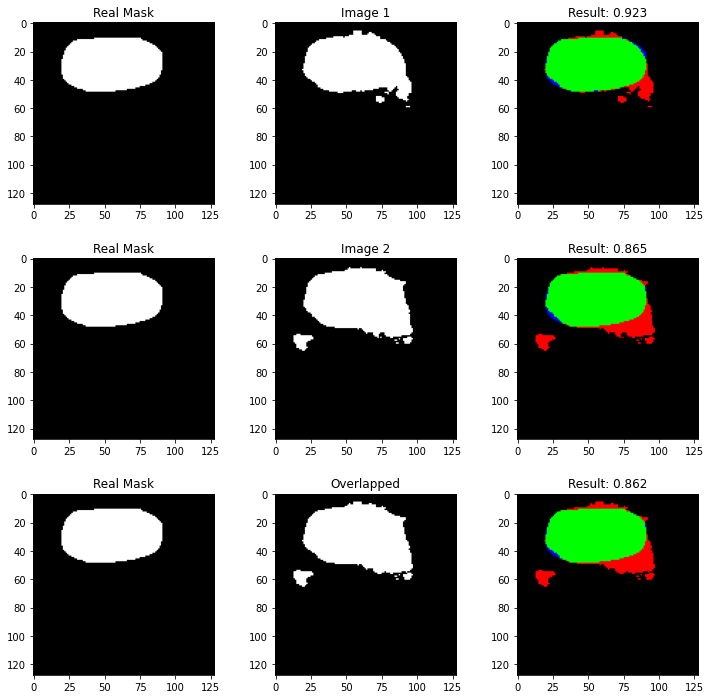

IMPROVED


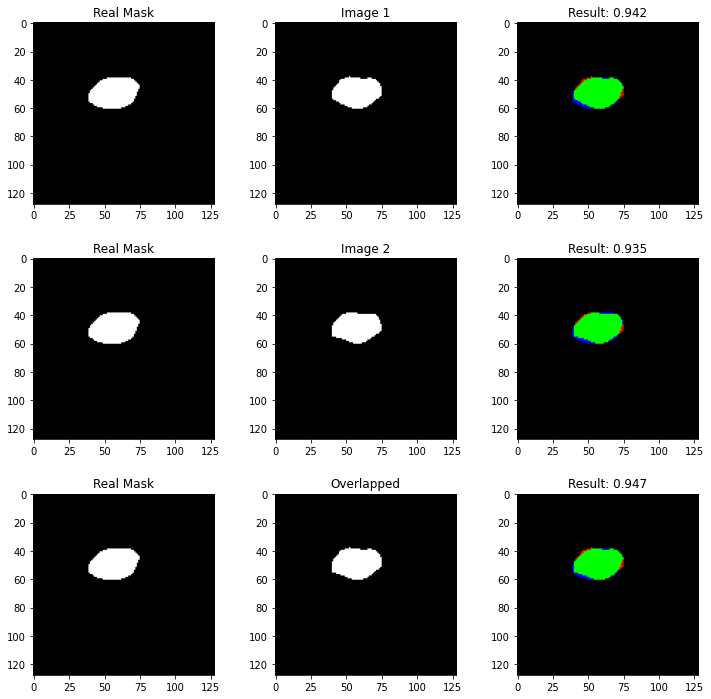

NOT


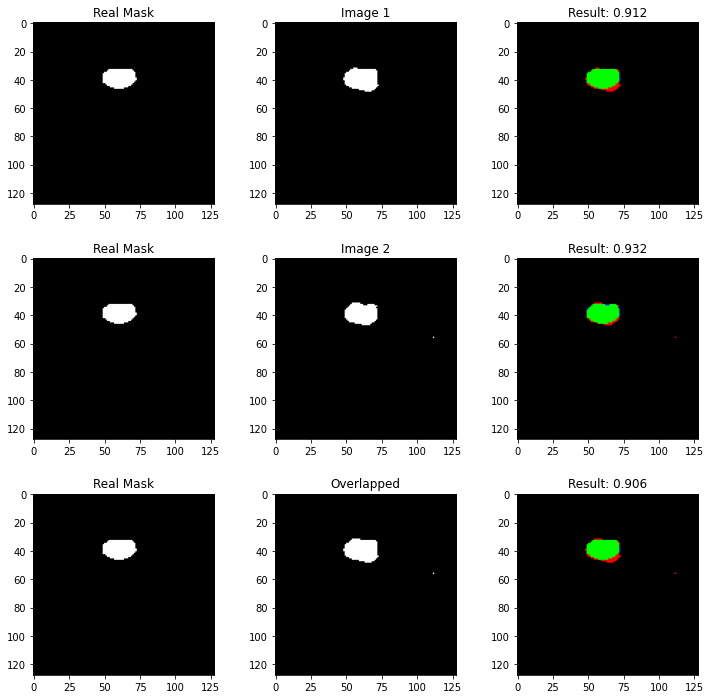

NOT


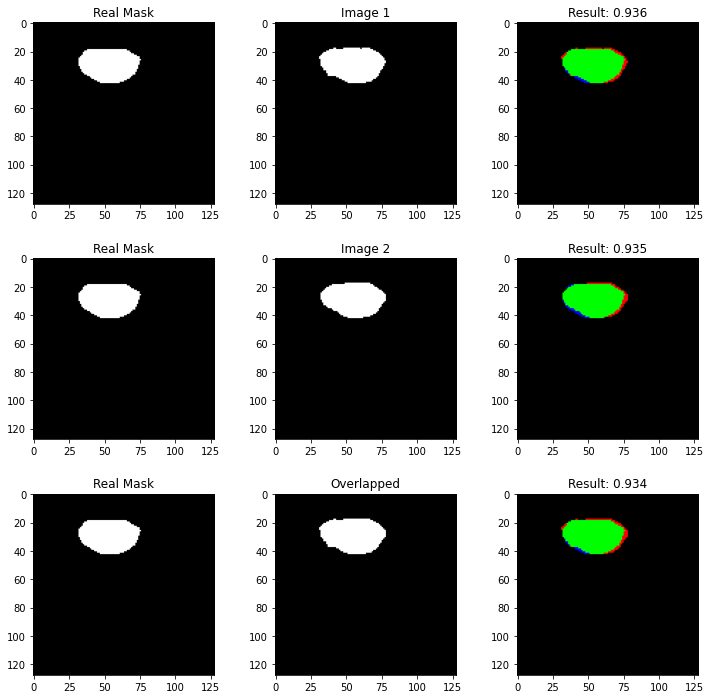

NOT


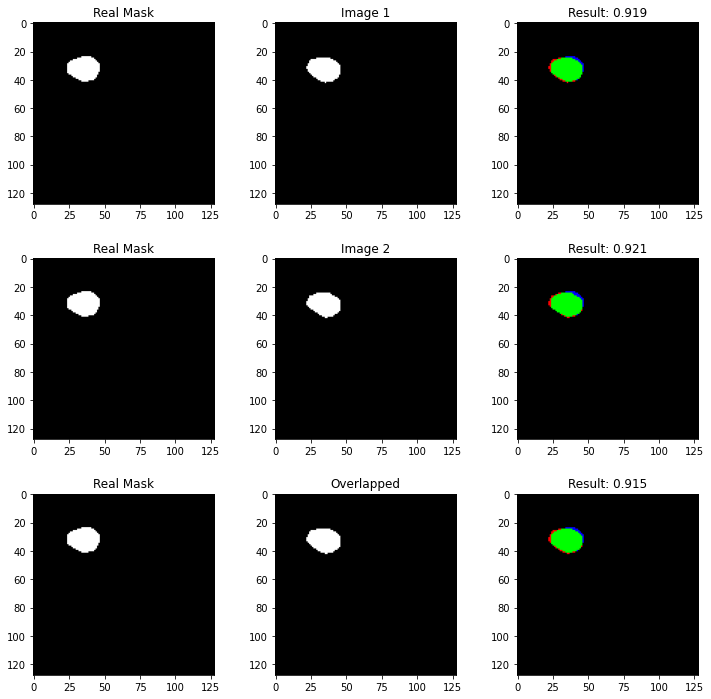

NOT


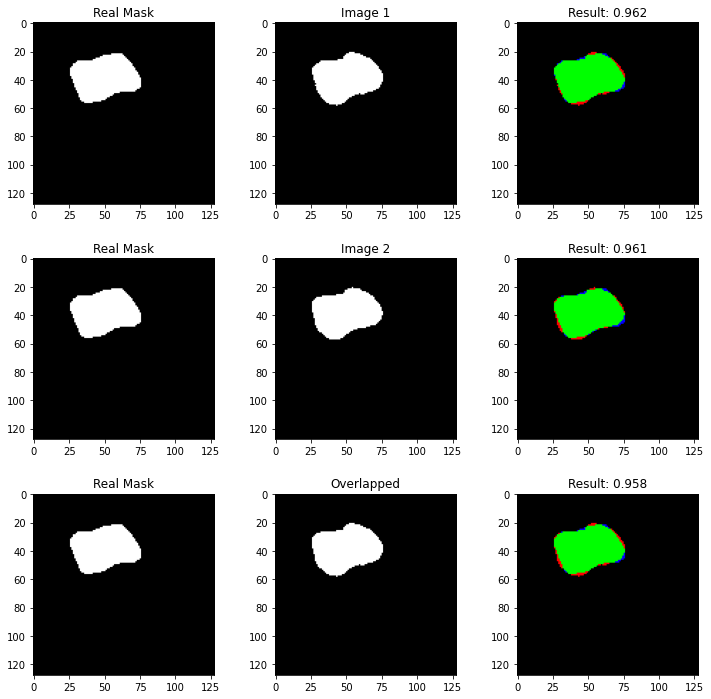

NOT


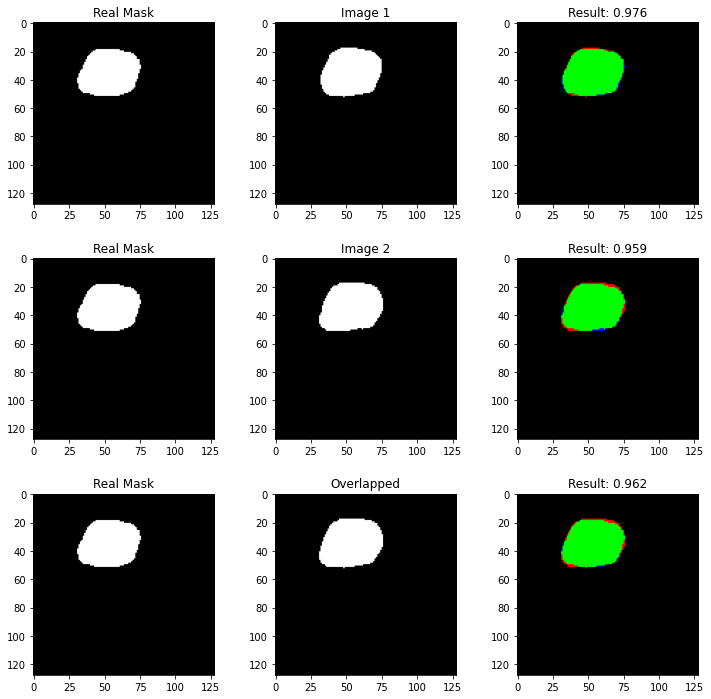

NOT


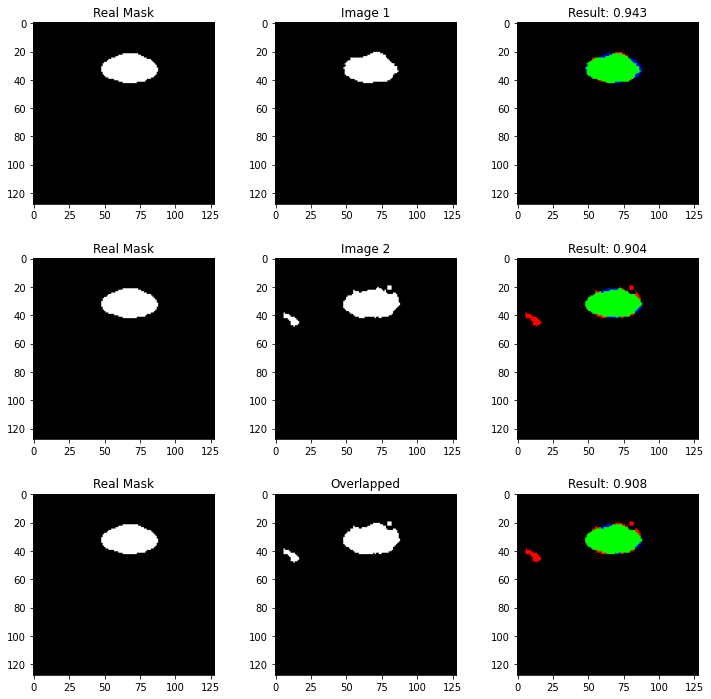

NOT


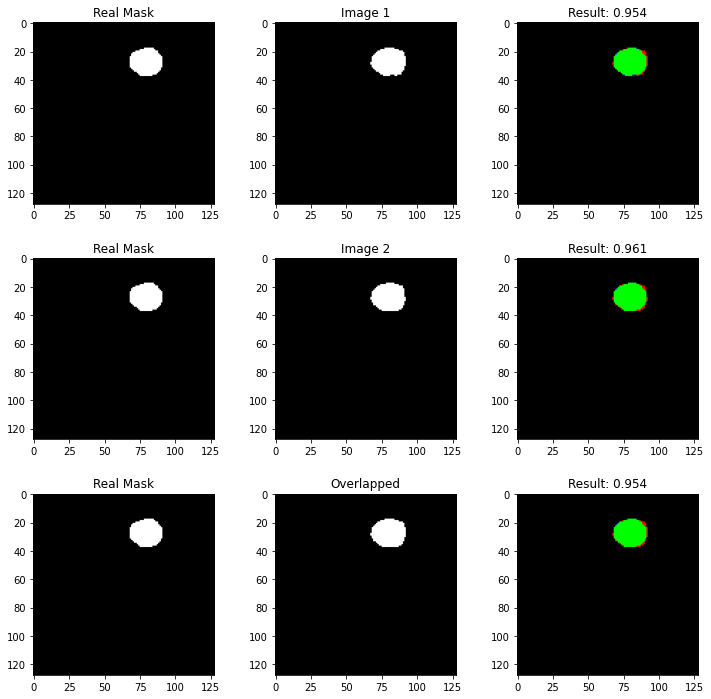

NOT


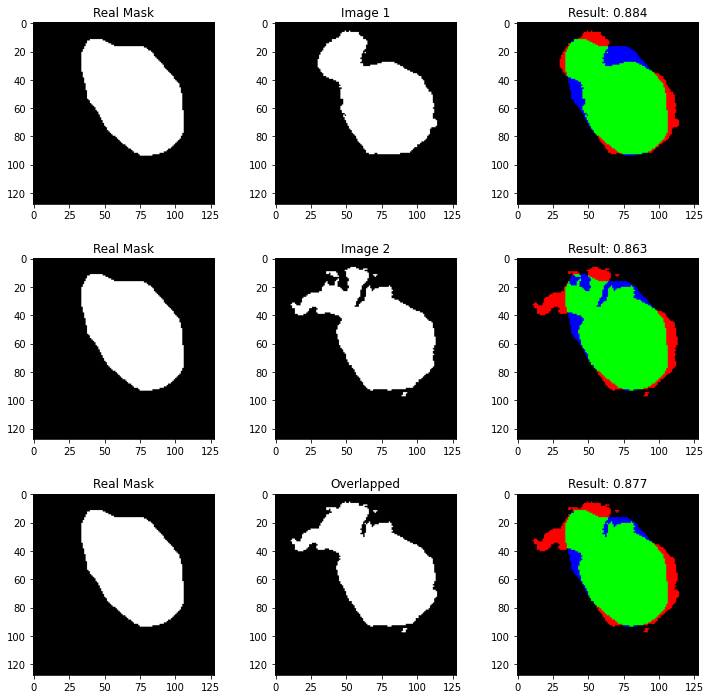

NOT


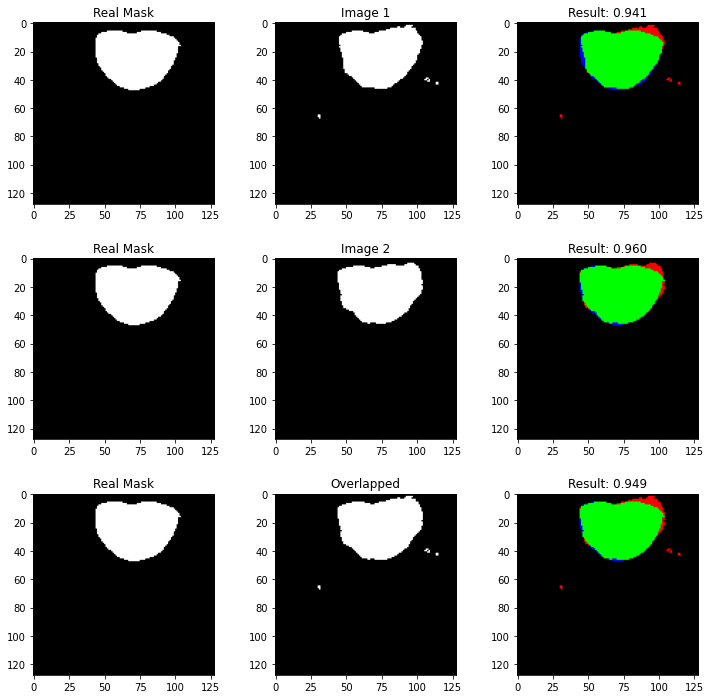

NOT


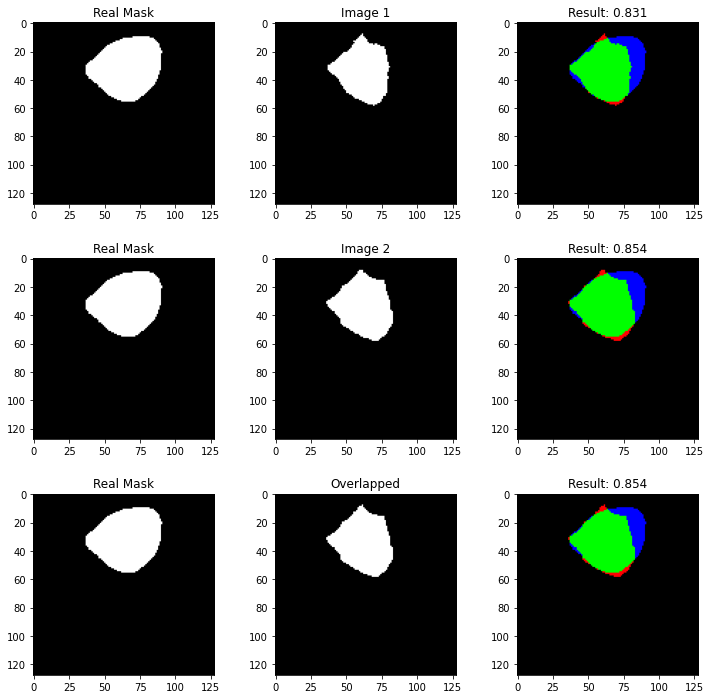

IMPROVED


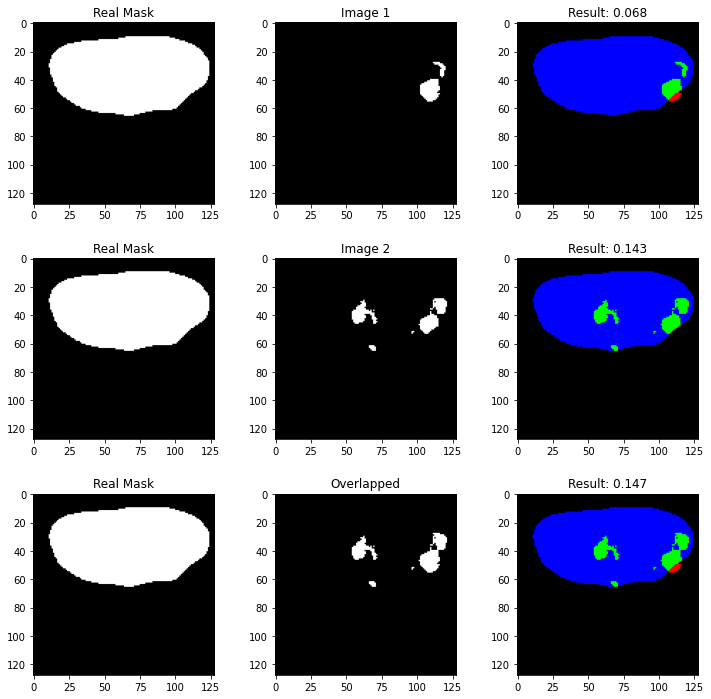

NOT


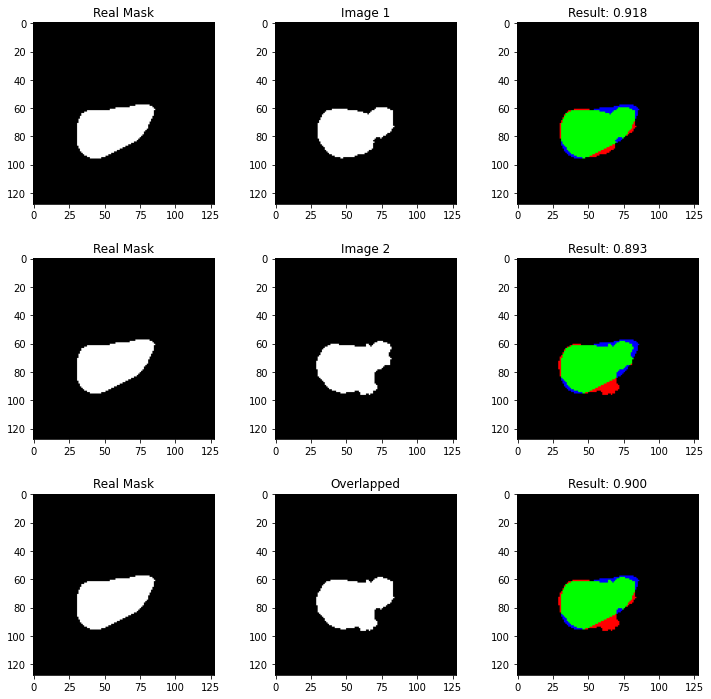

NOT


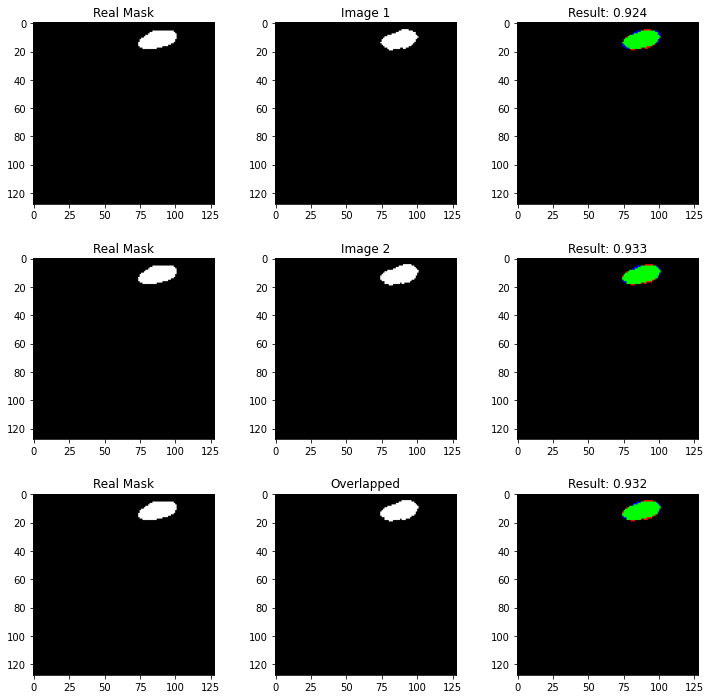

NOT


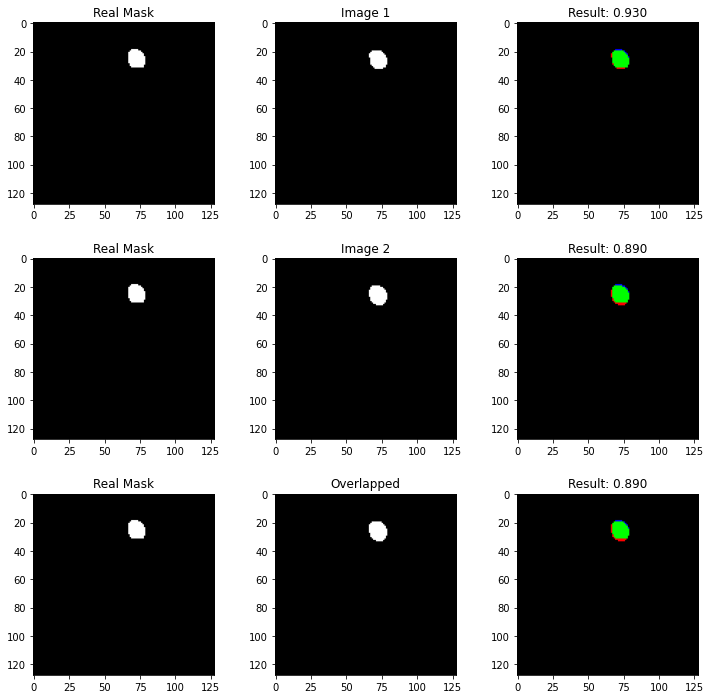

IMPROVED


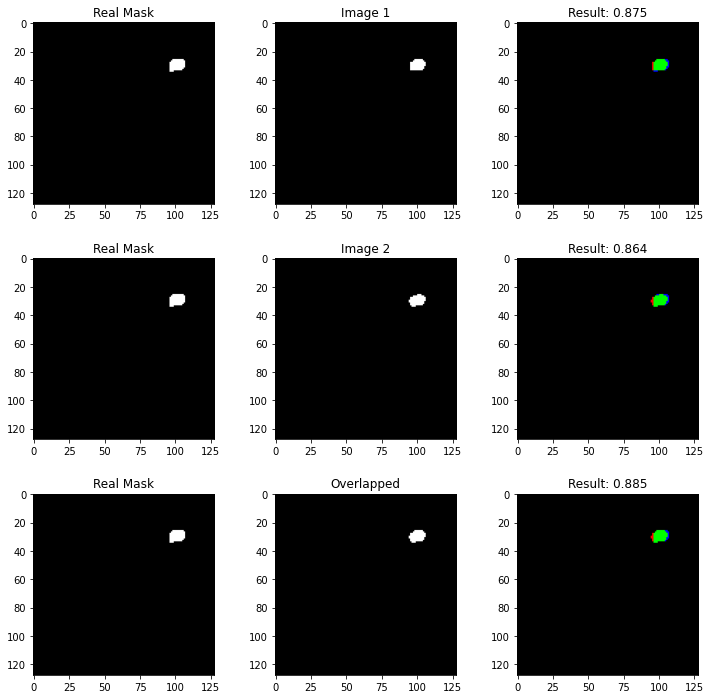

NOT


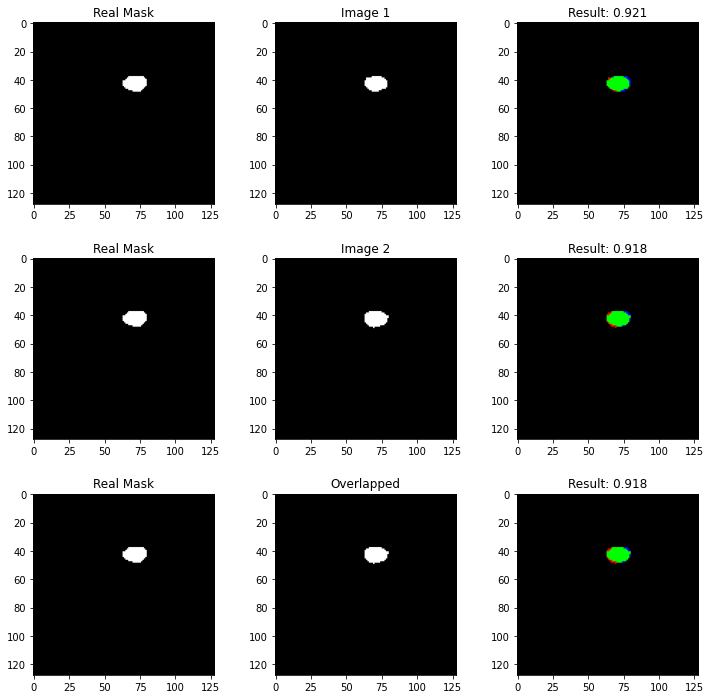

NOT


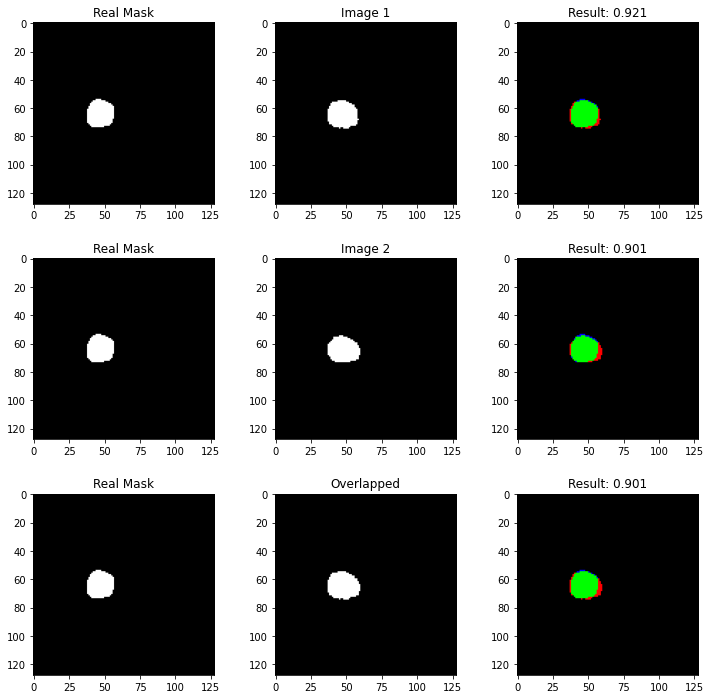

NOT


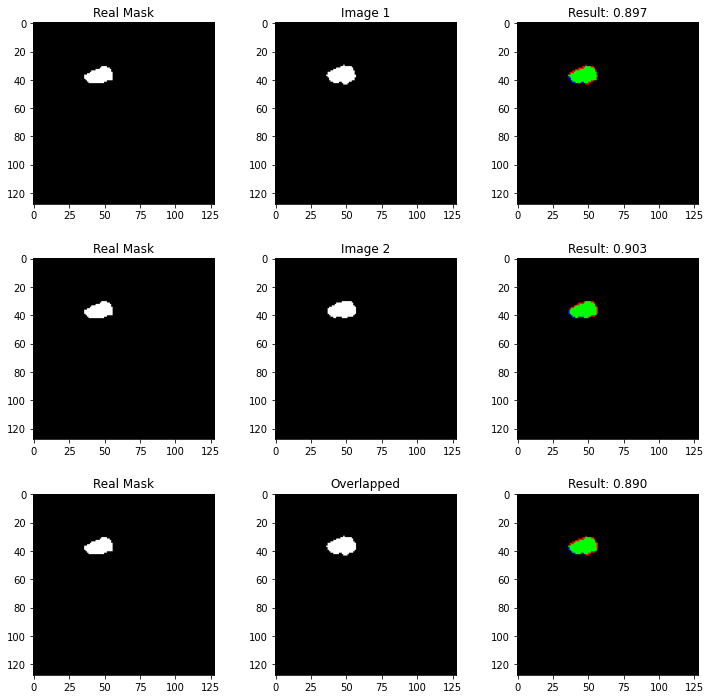

IMPROVED


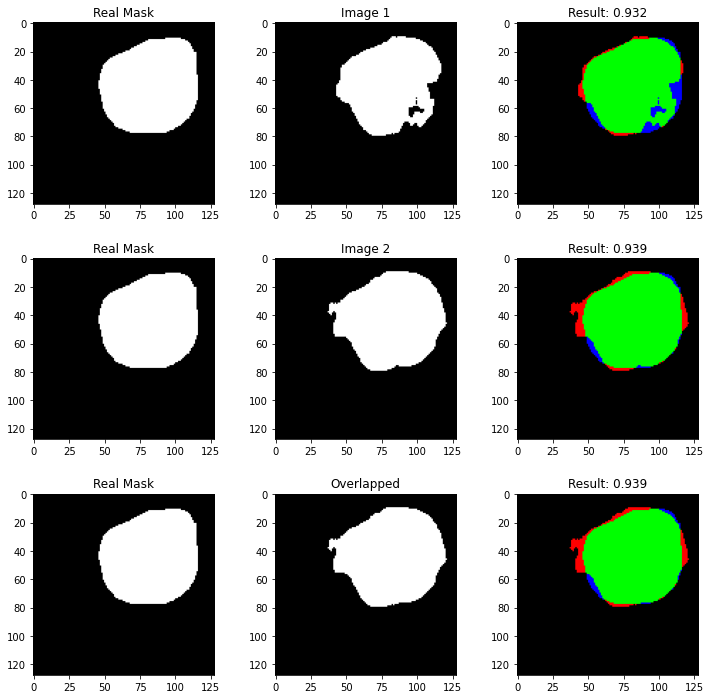

NOT


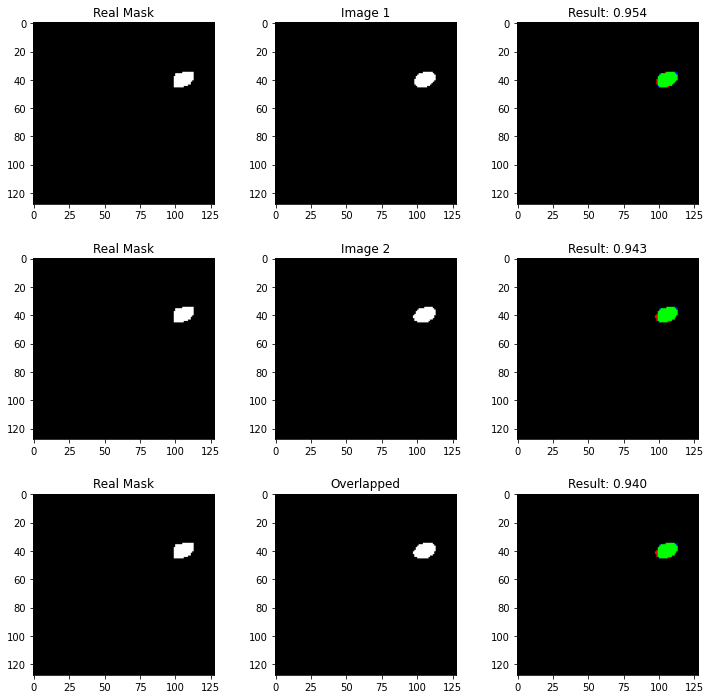

NOT


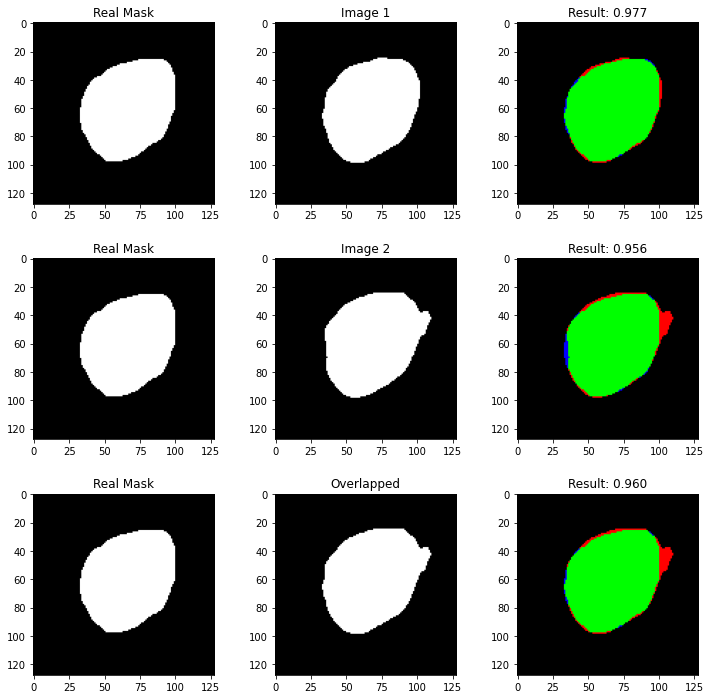

NOT


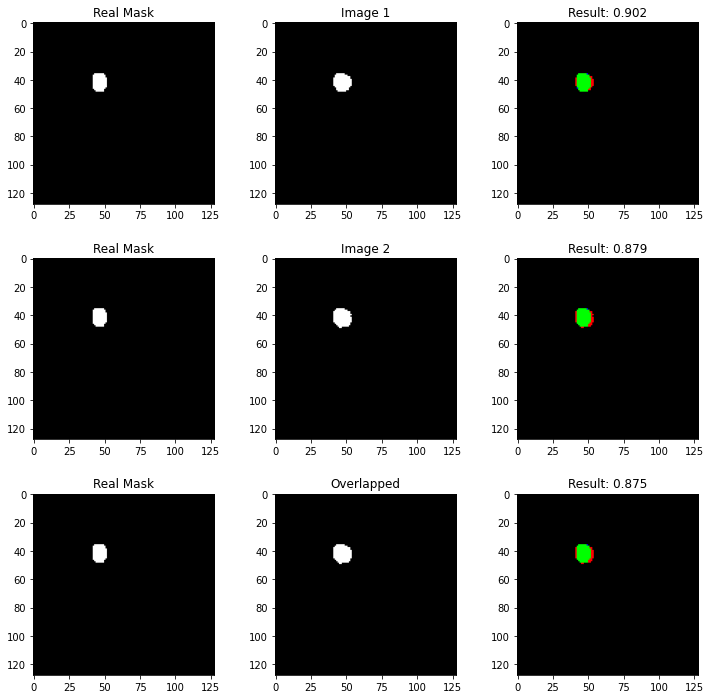

NOT


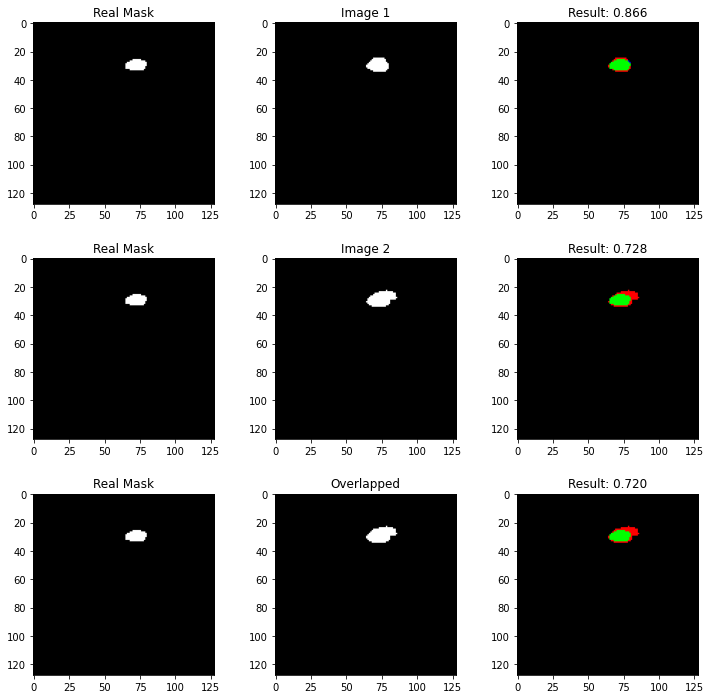

NOT


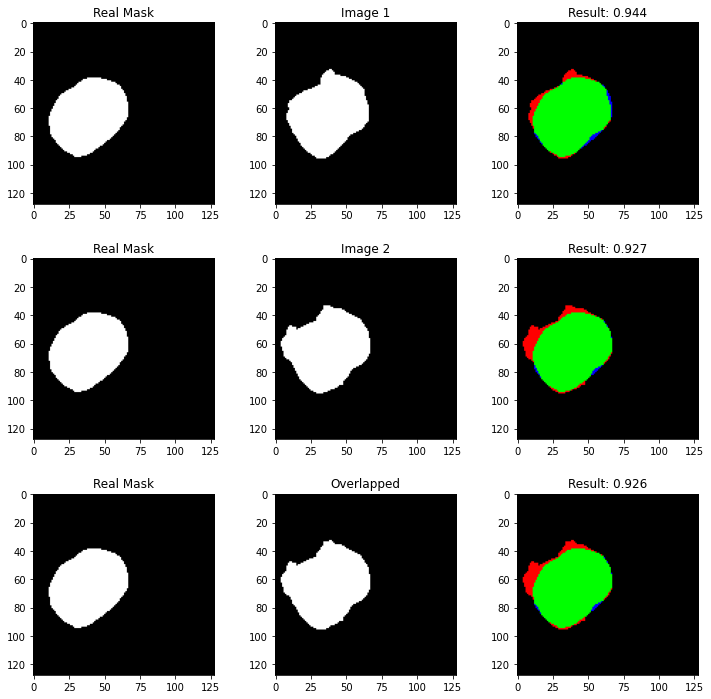

NOT


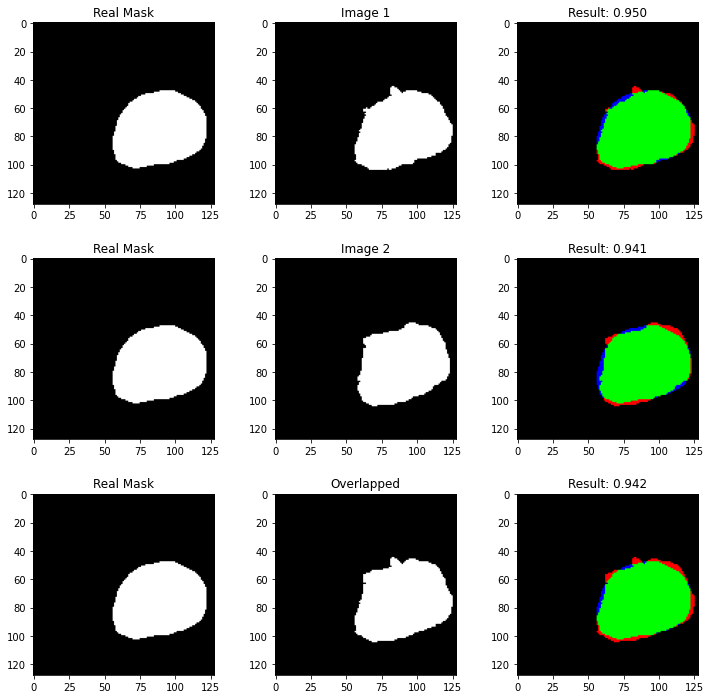

IMPROVED


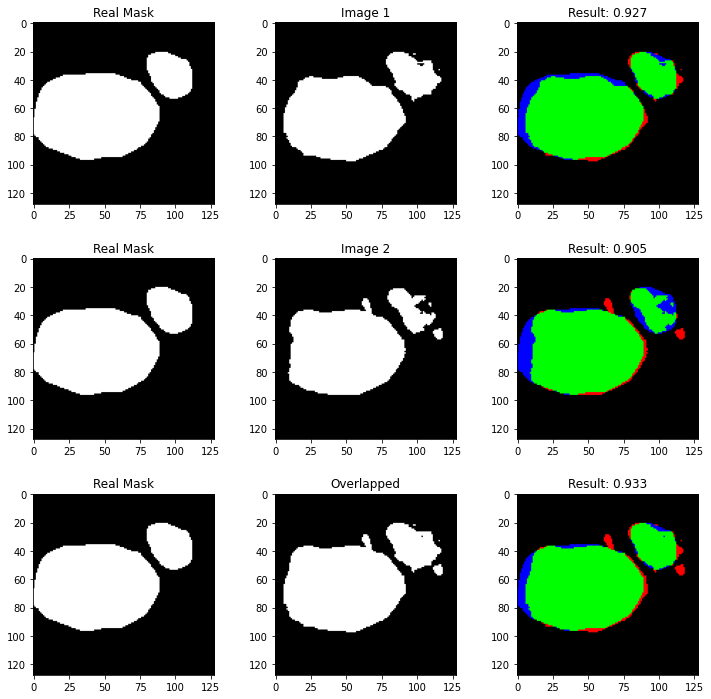

NOT


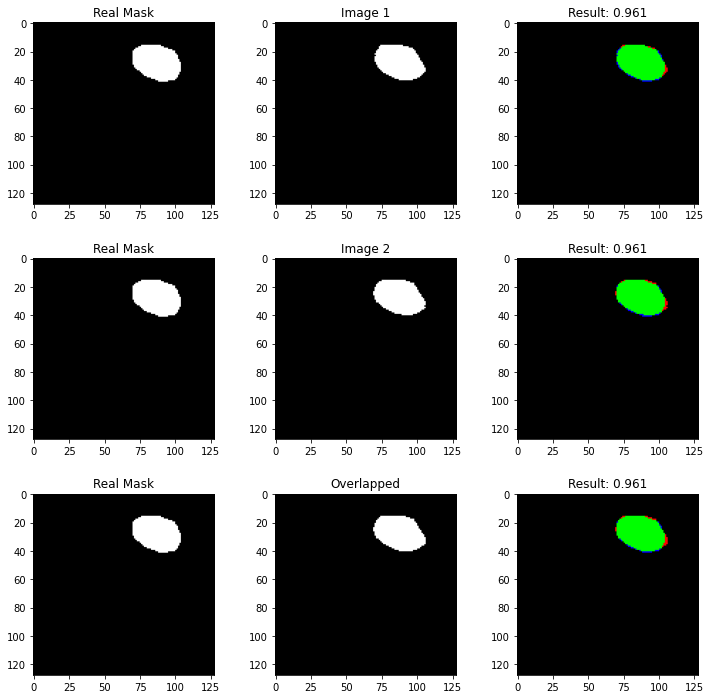

NOT


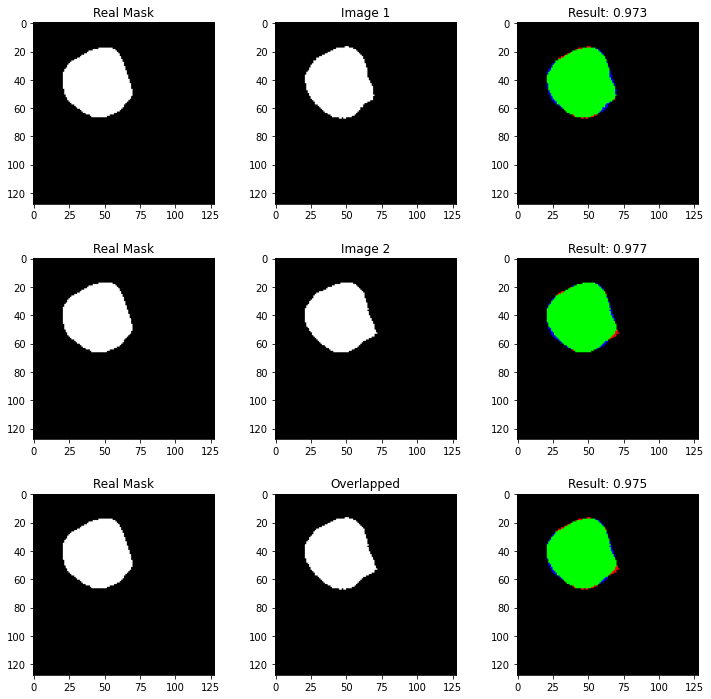

NOT


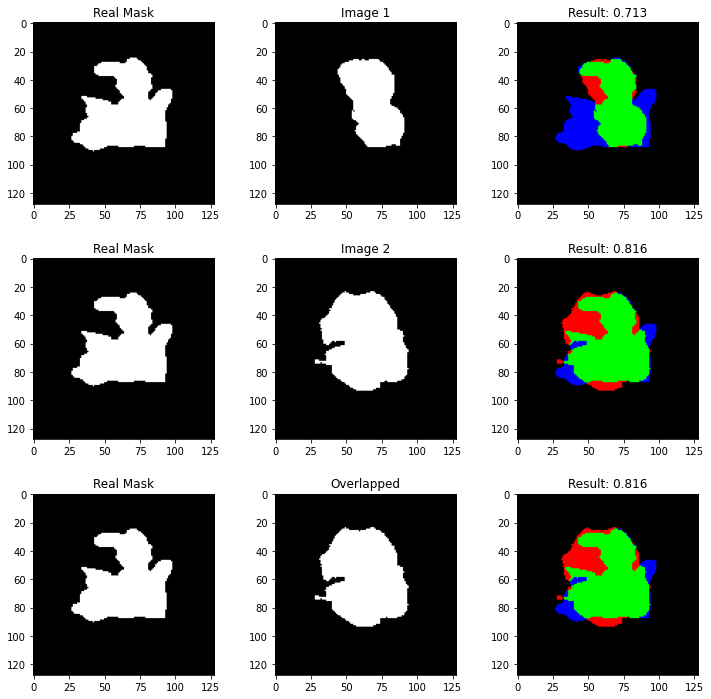

NOT


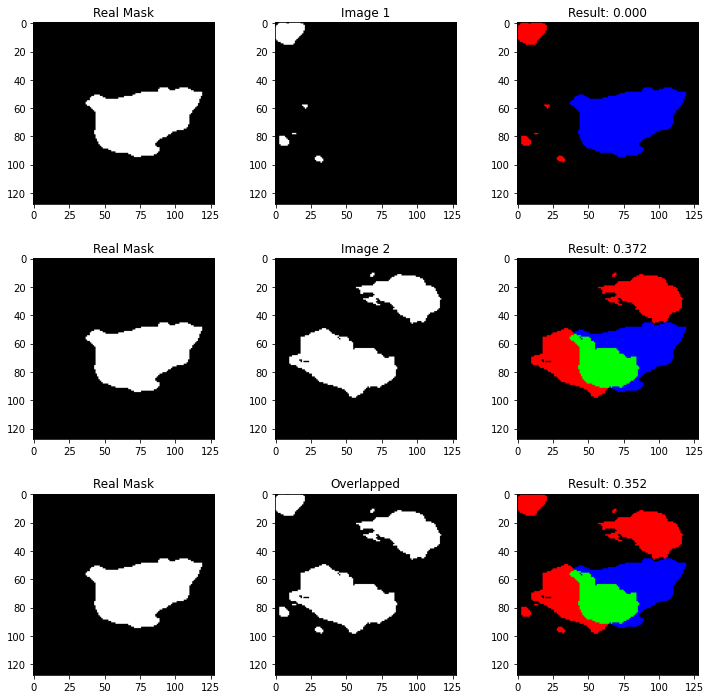

NOT


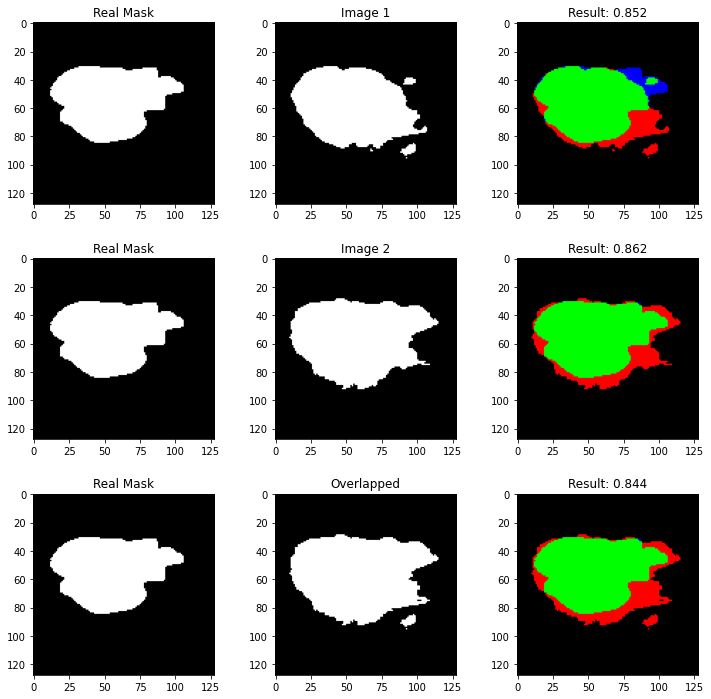

NOT


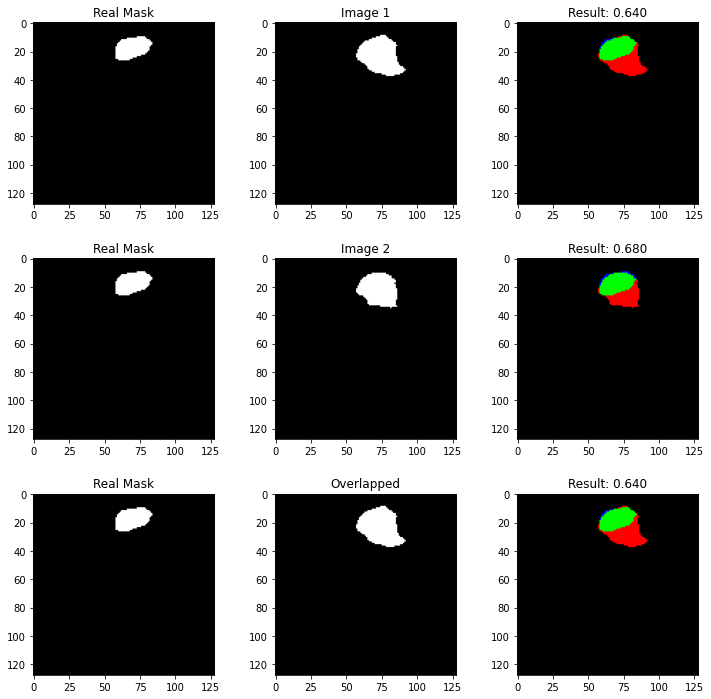

IMPROVED


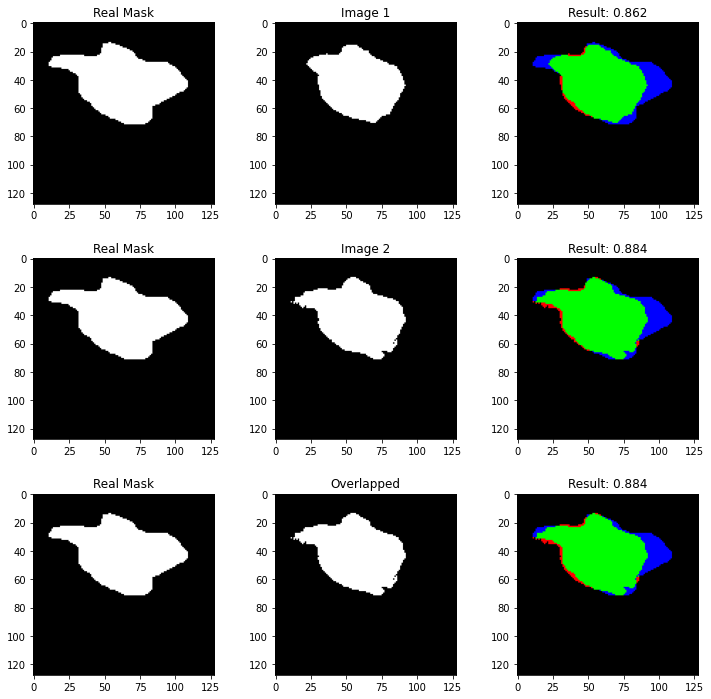

NOT


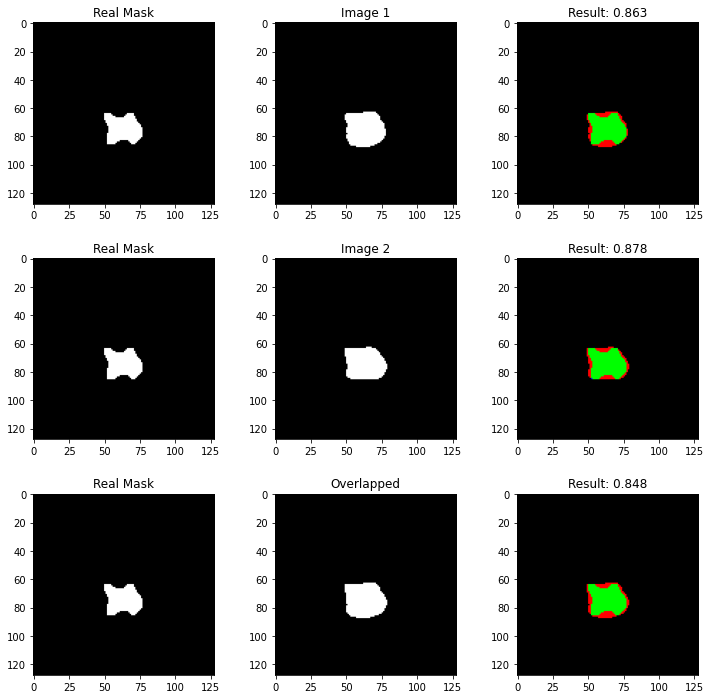

IMPROVED


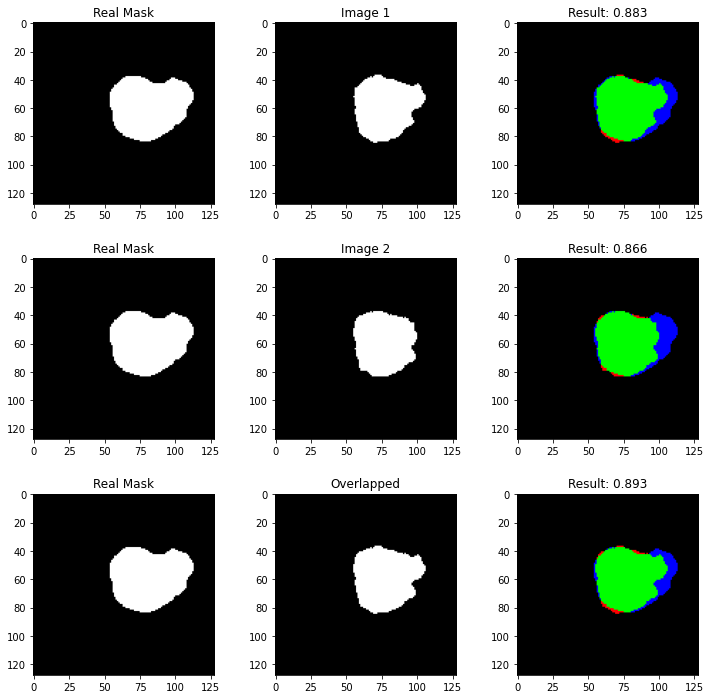

IMPROVED


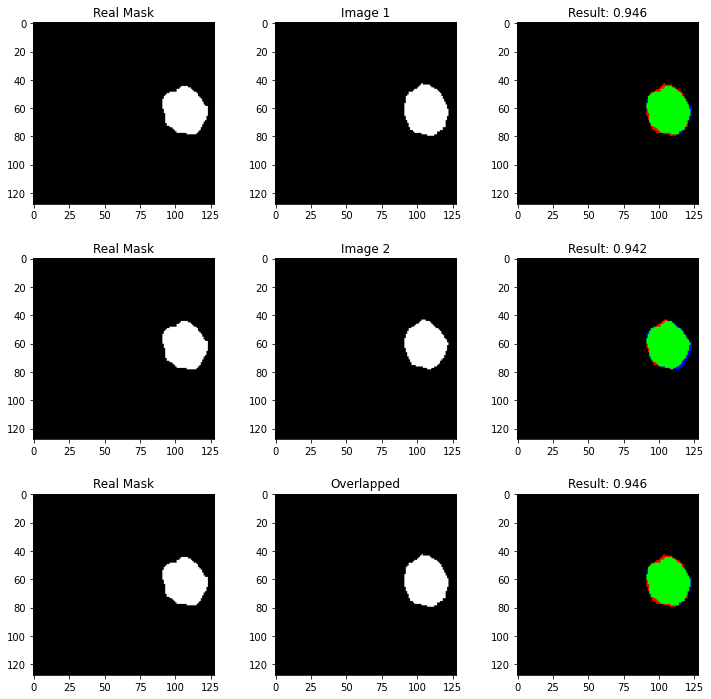

IMPROVED


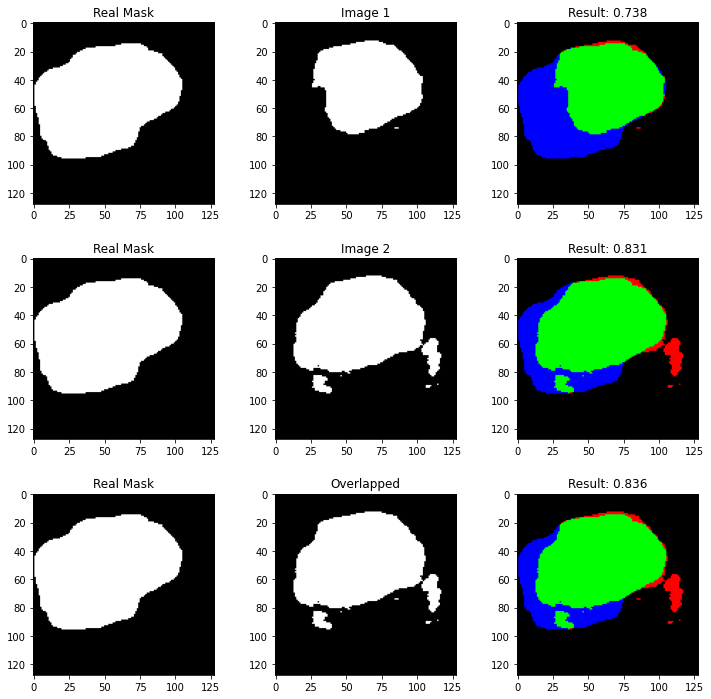

NOT


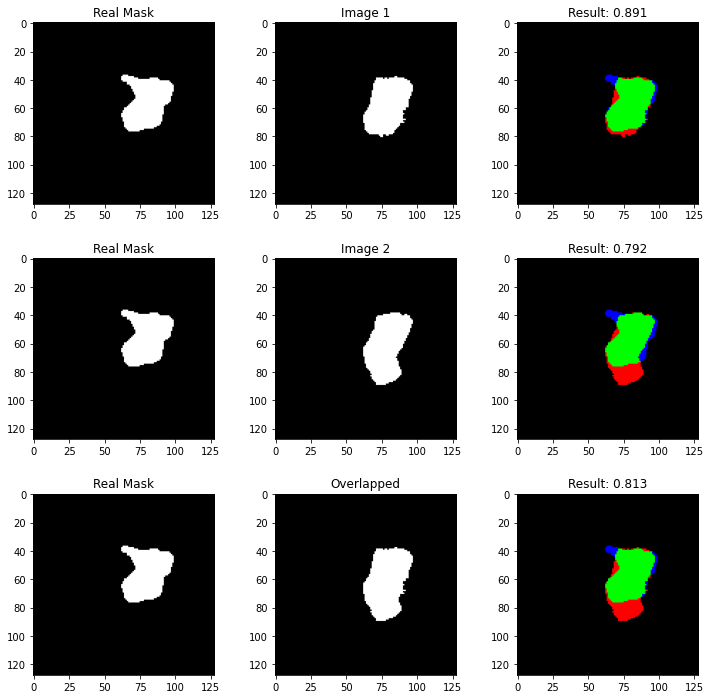

IMPROVED


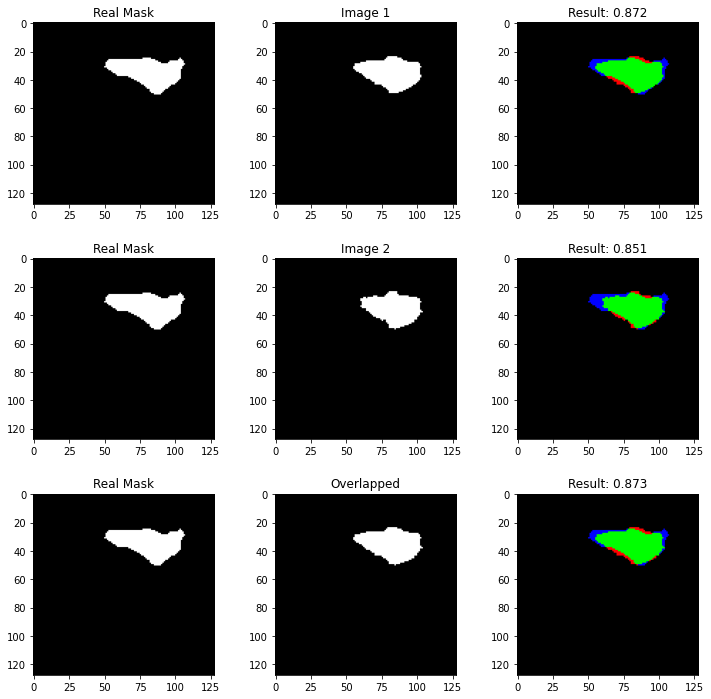

NOT


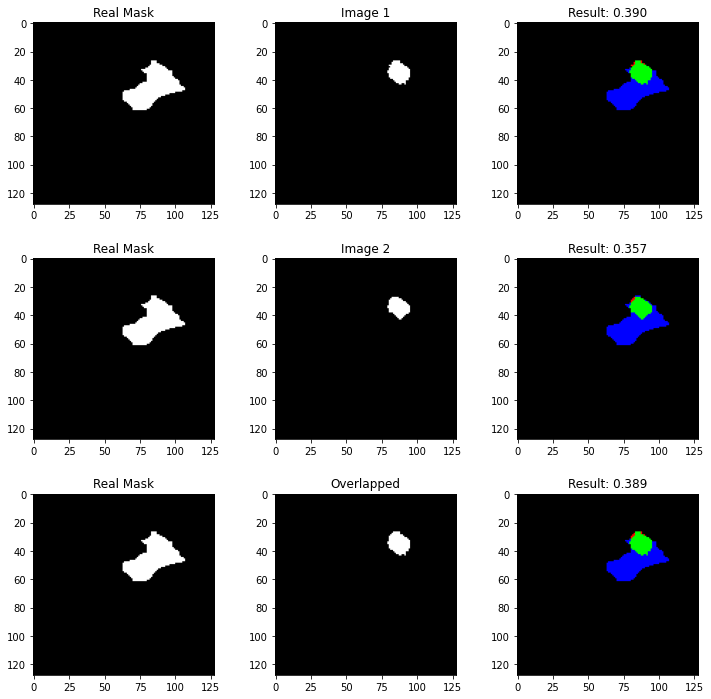

NOT


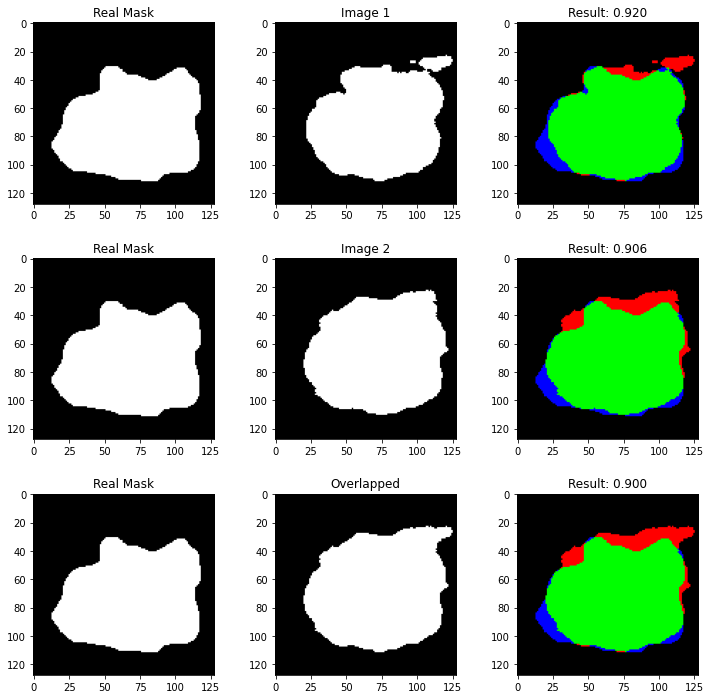

IMPROVED


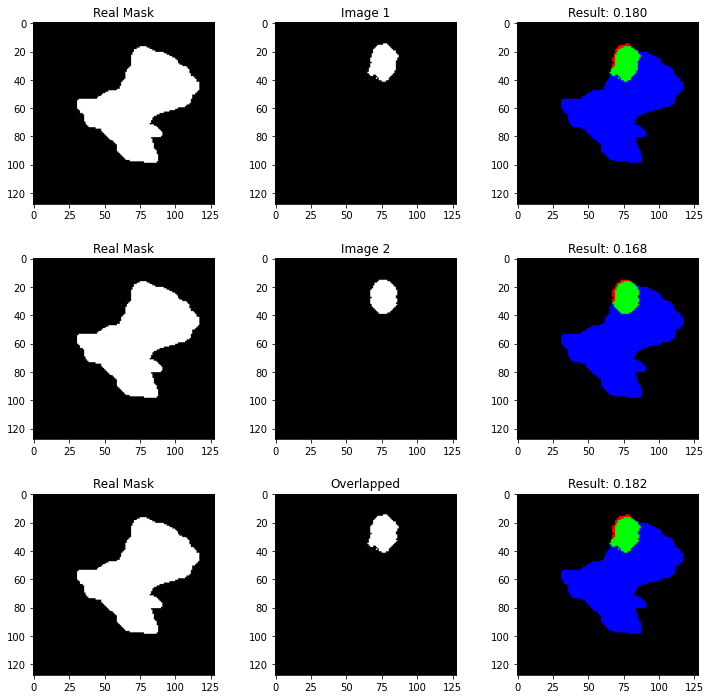

IMPROVED


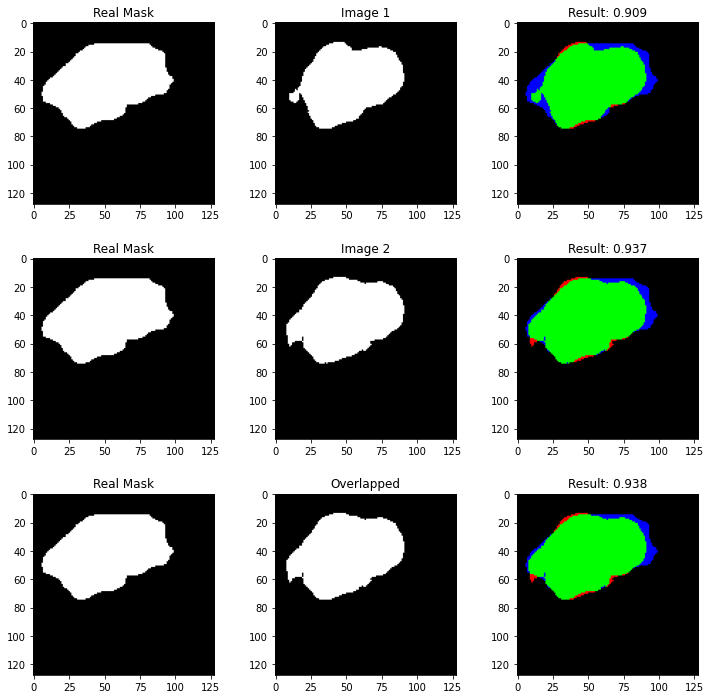

NOT


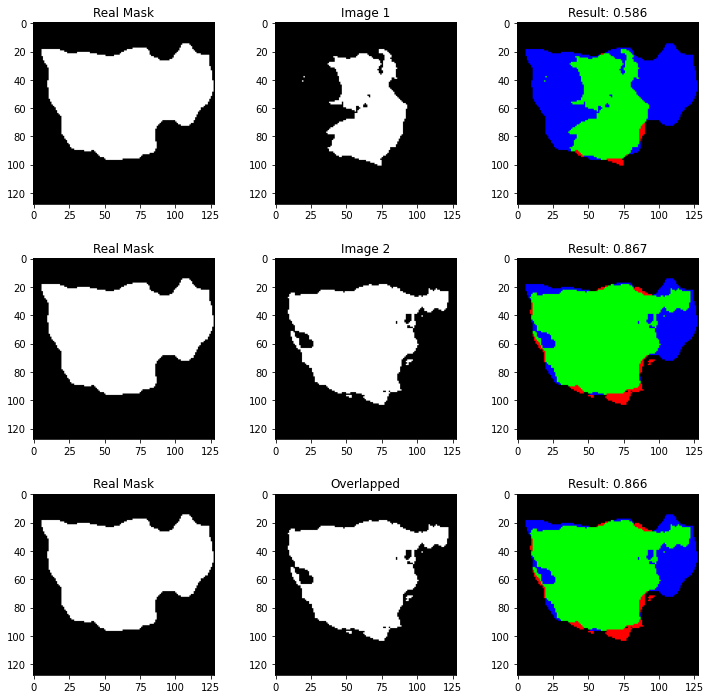

IMPROVED


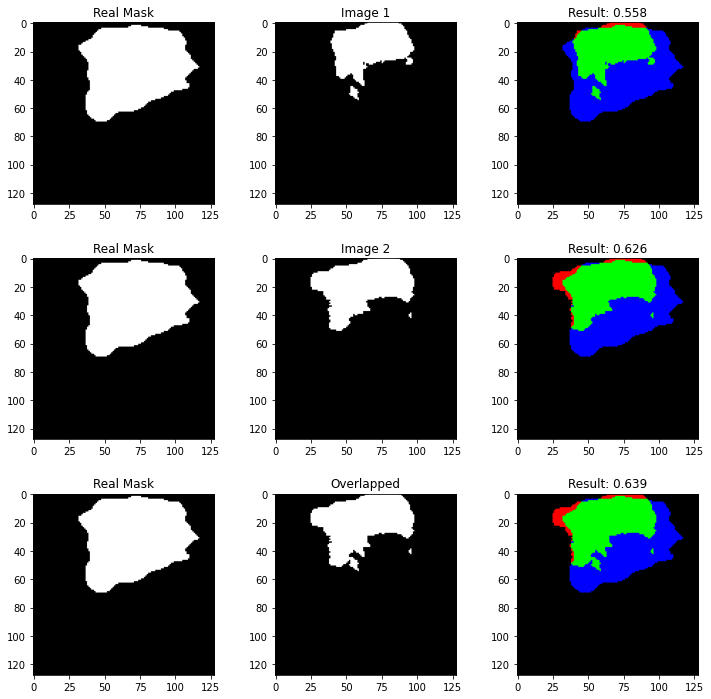

IMPROVED


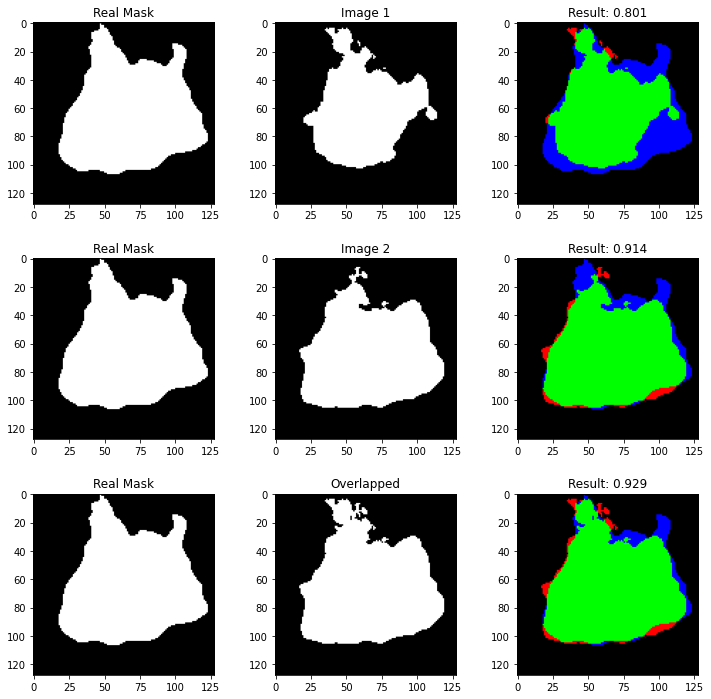

NOT


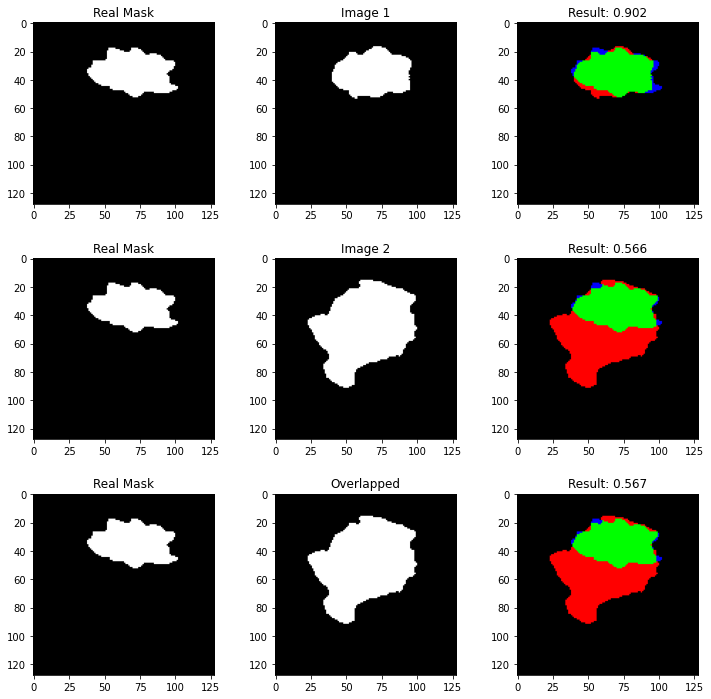

NOT


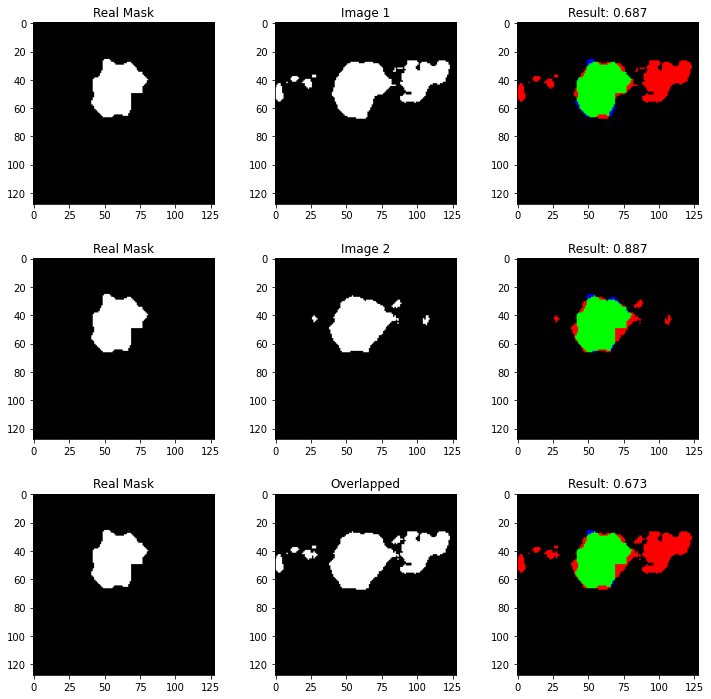

NOT


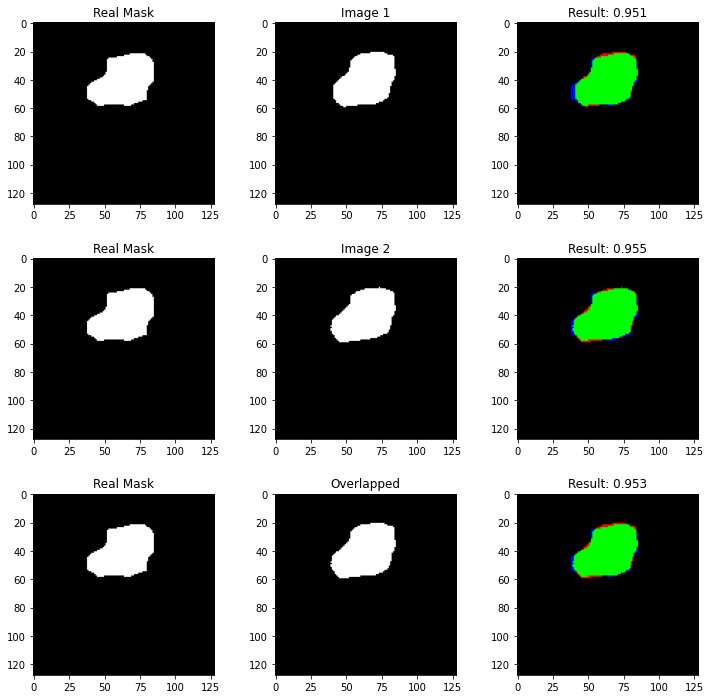

NOT


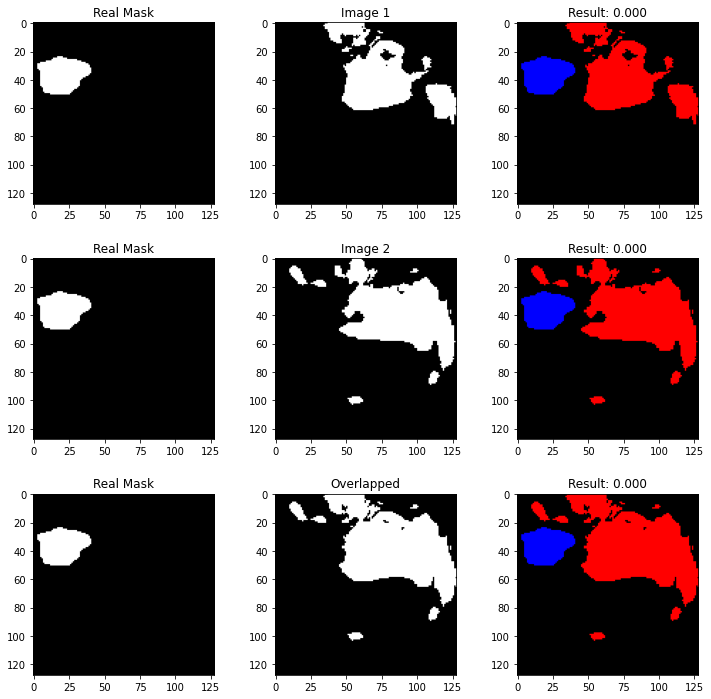

NOT


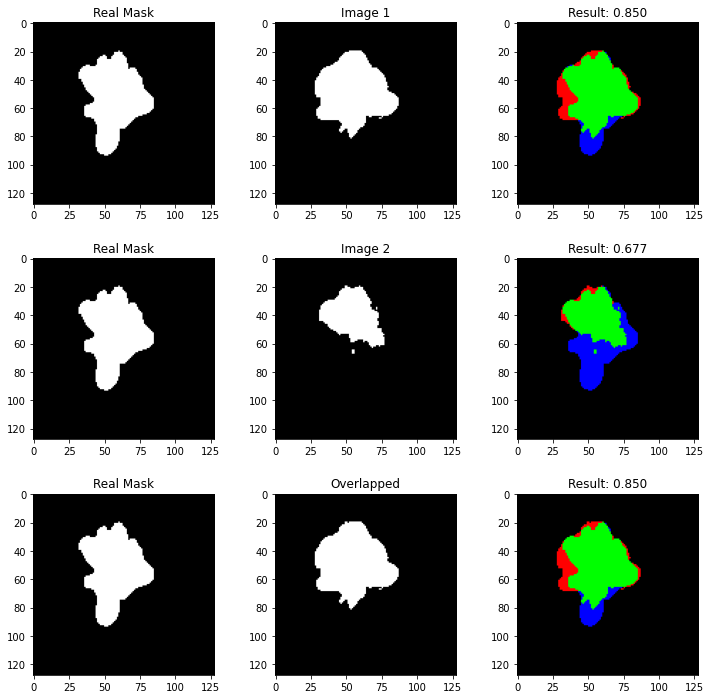

NOT


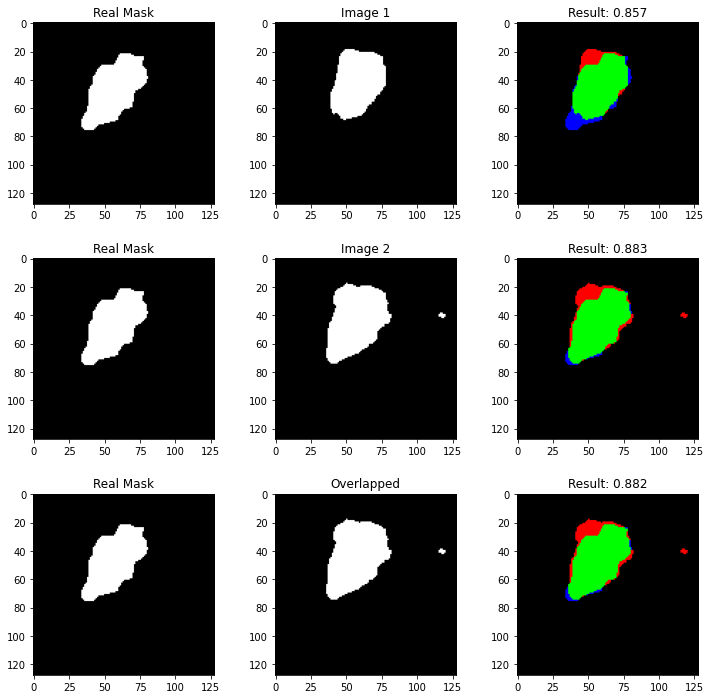

NOT


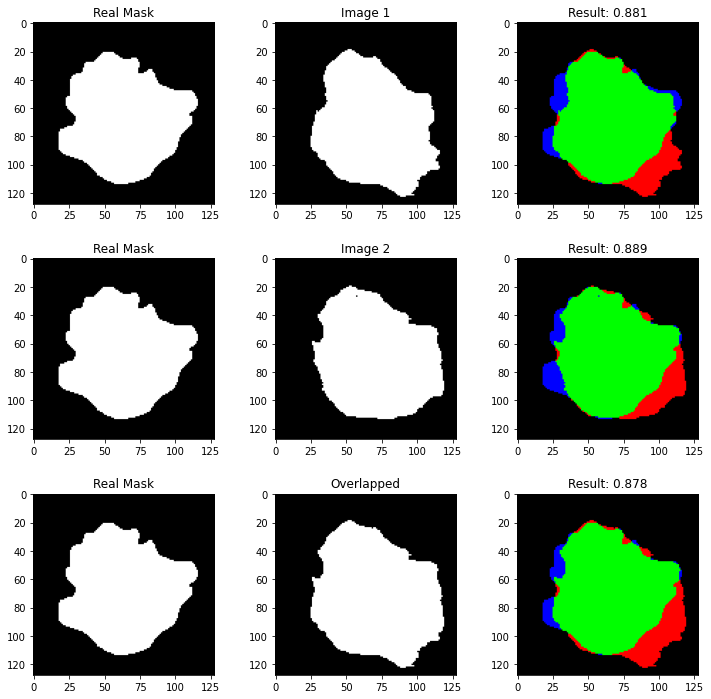

NOT


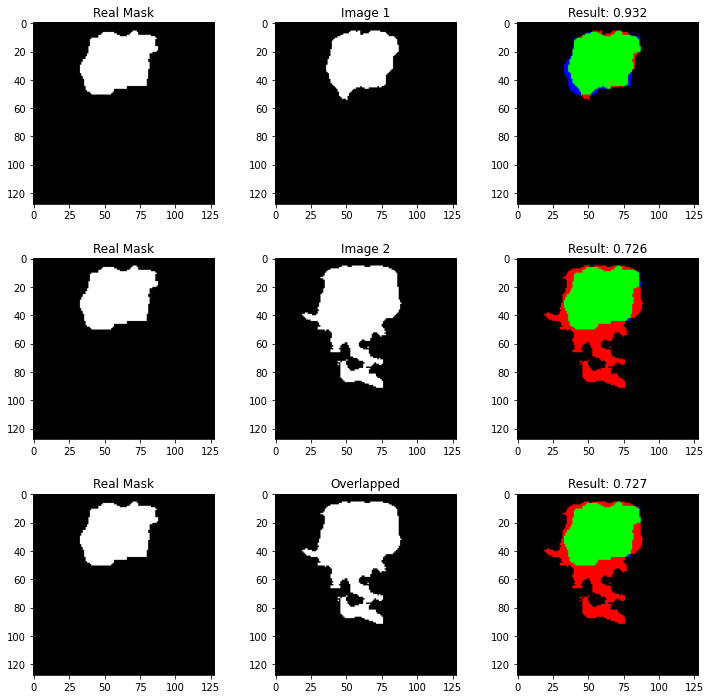

NOT


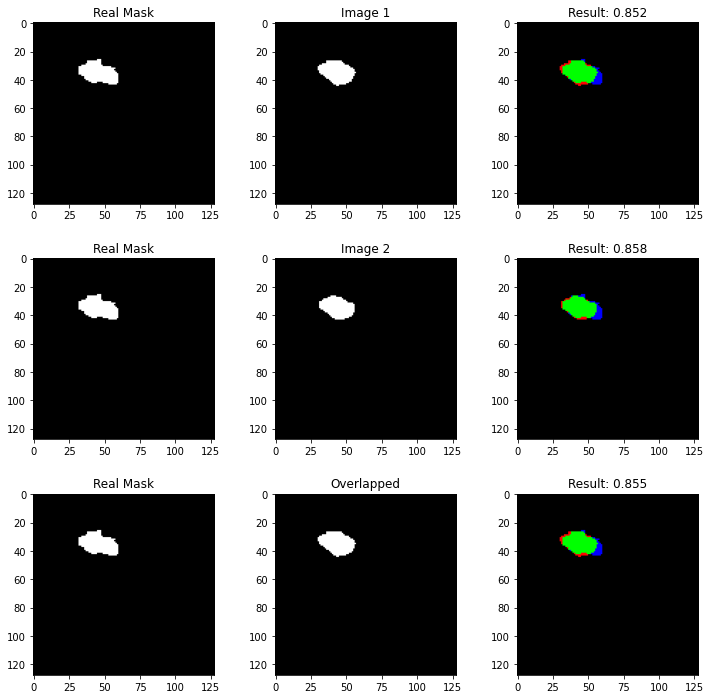

NOT


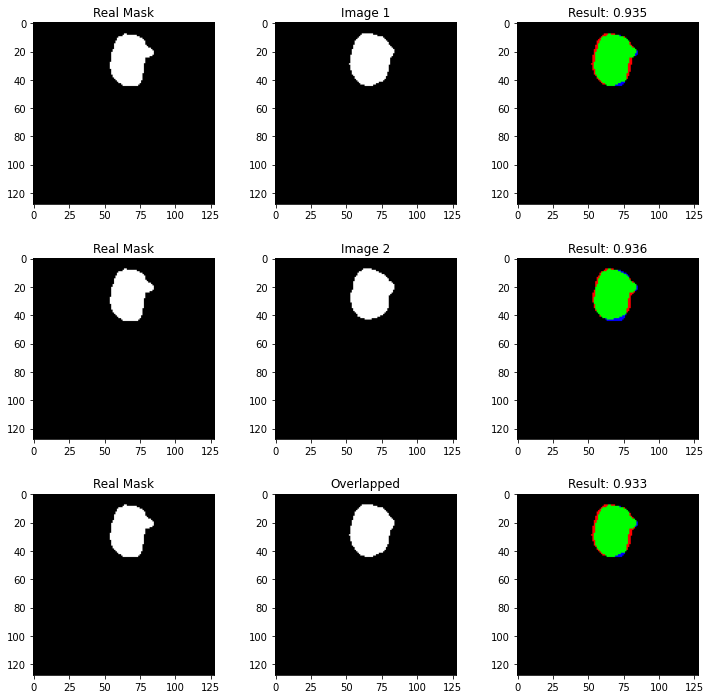

NOT


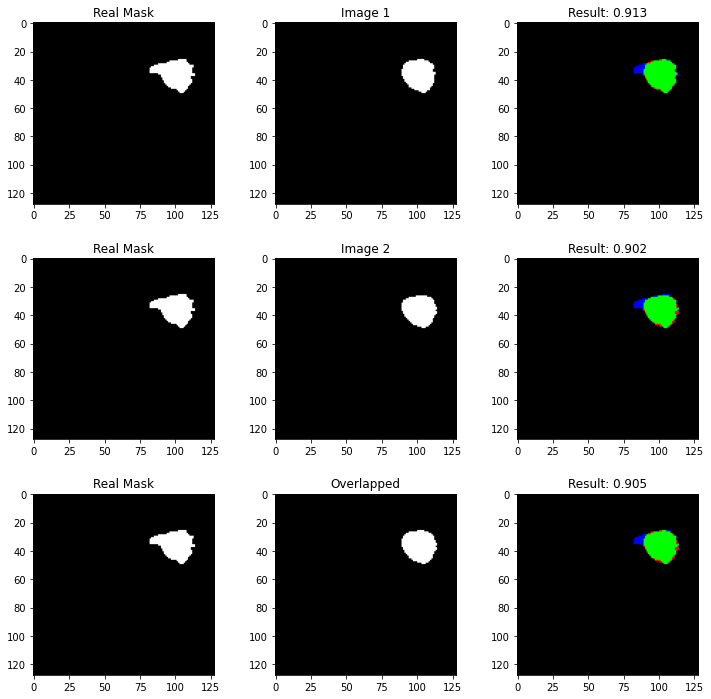

NOT


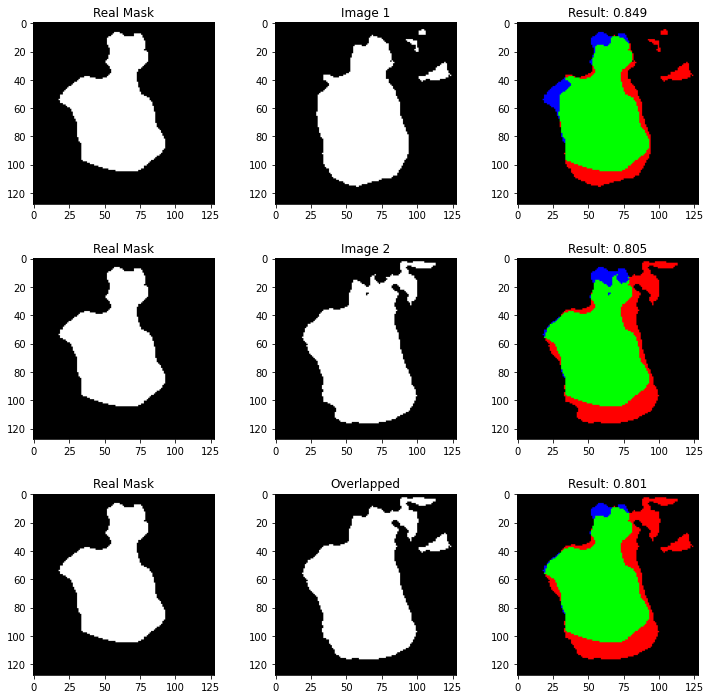

IMPROVED


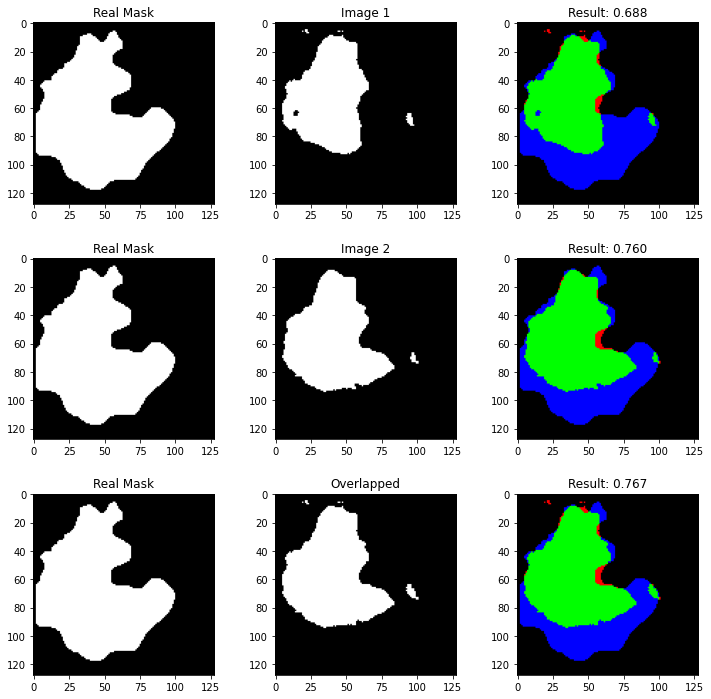

NOT


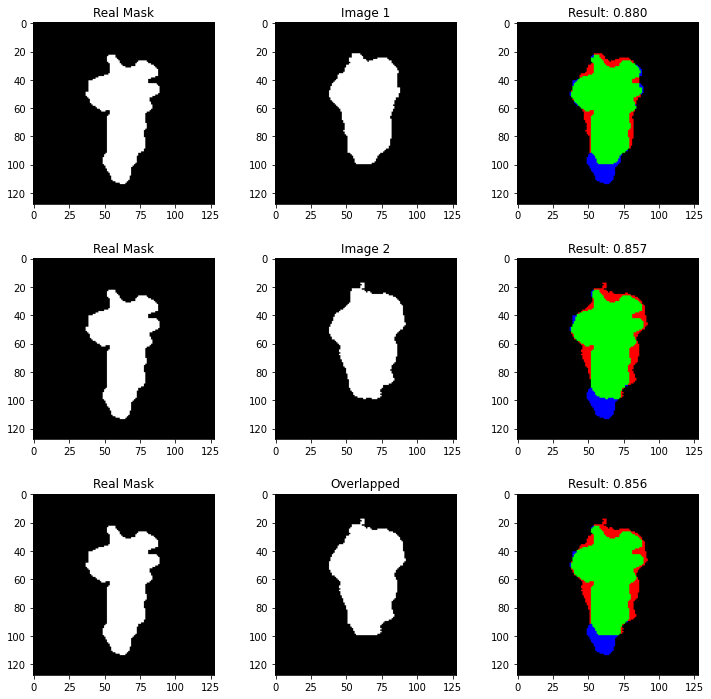

IMPROVED


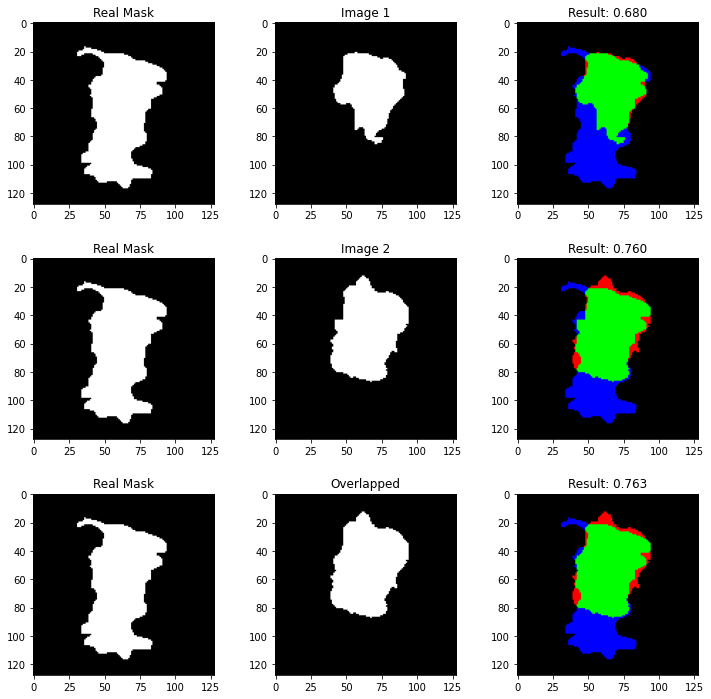

IMPROVED


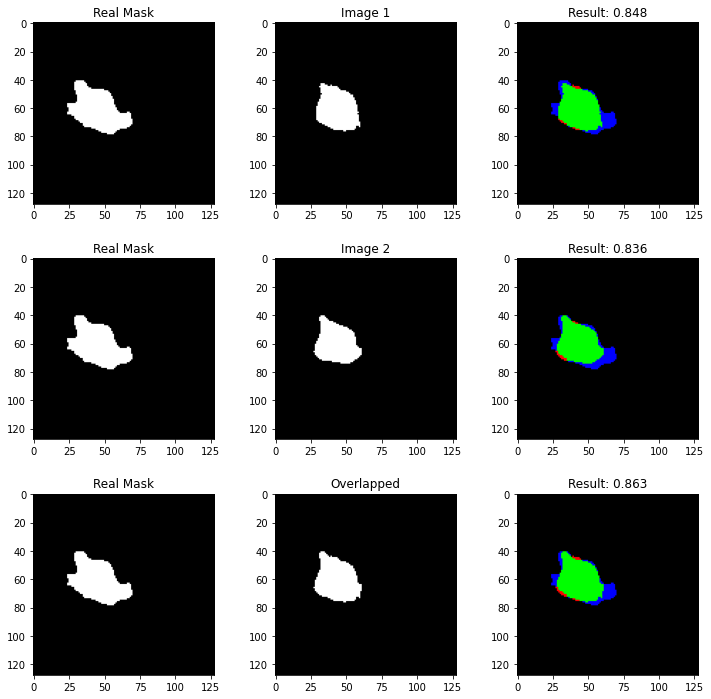

IMPROVED


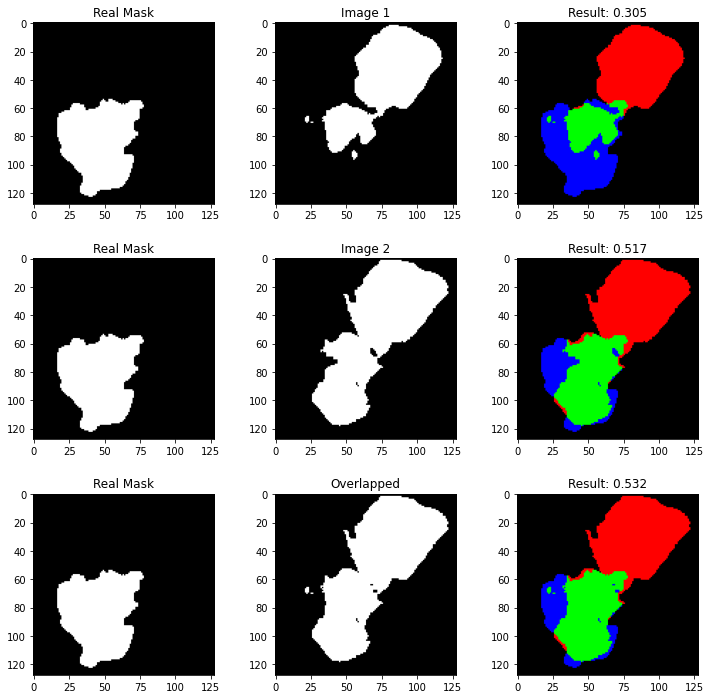

NOT


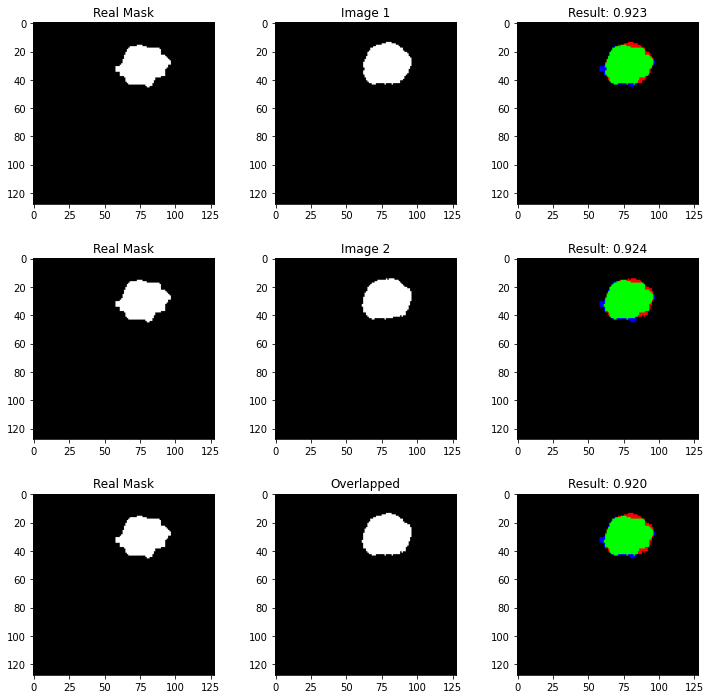

NOT


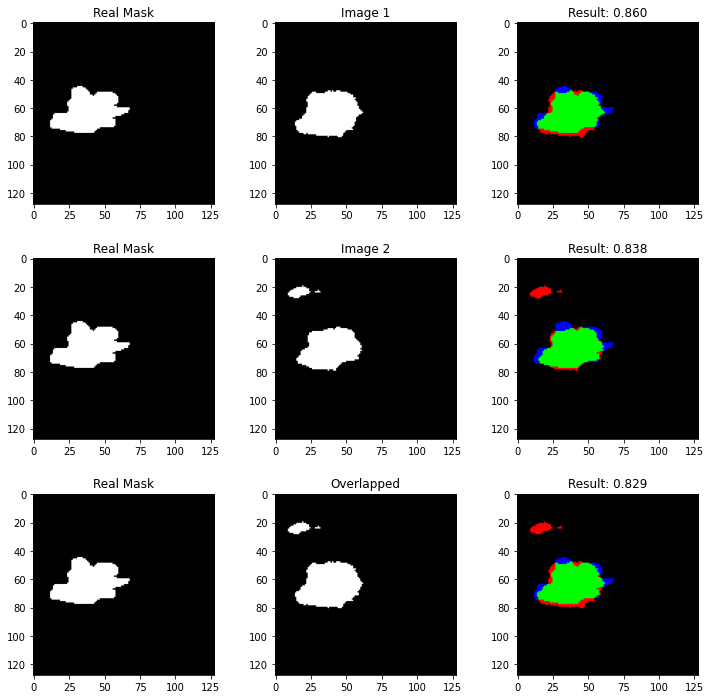

NOT


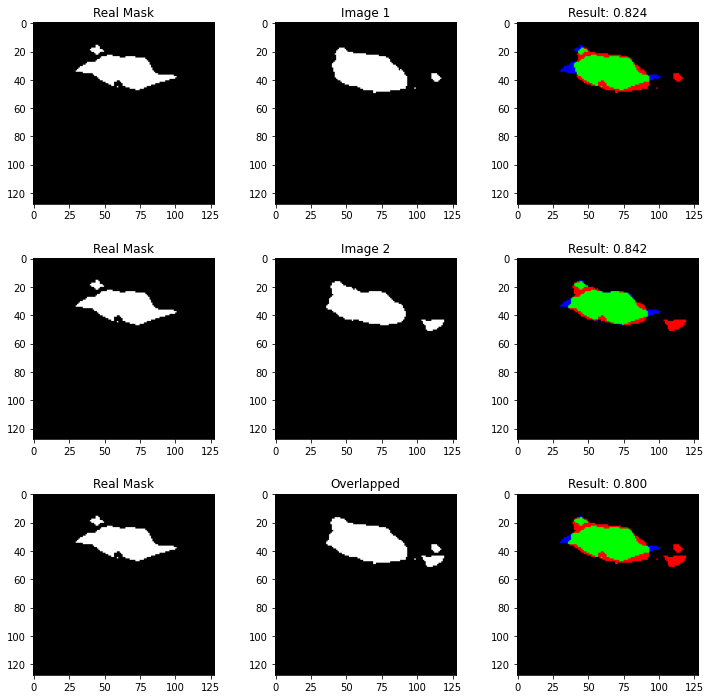

IMPROVED


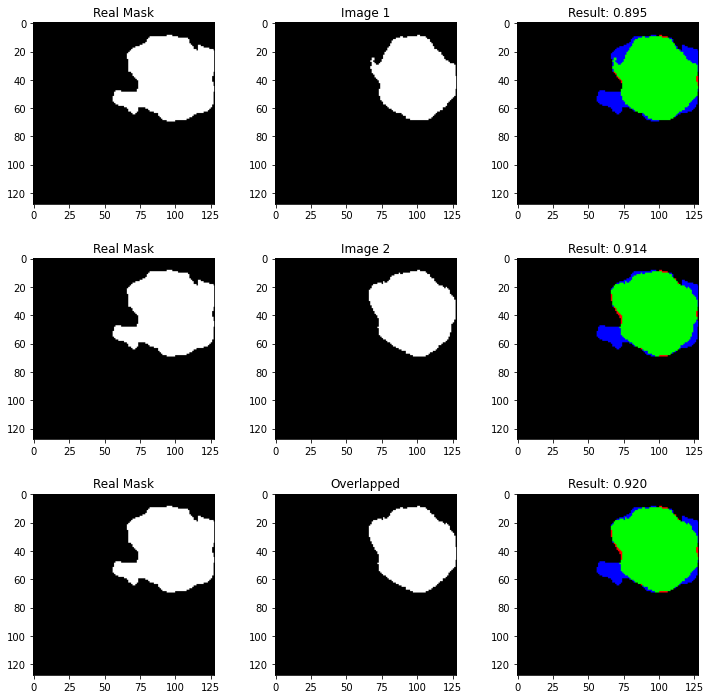

NOT


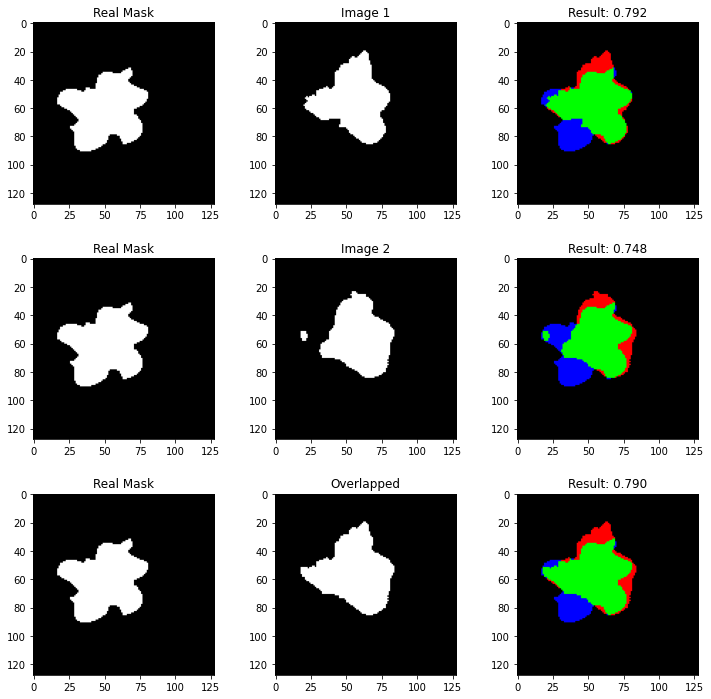

NOT


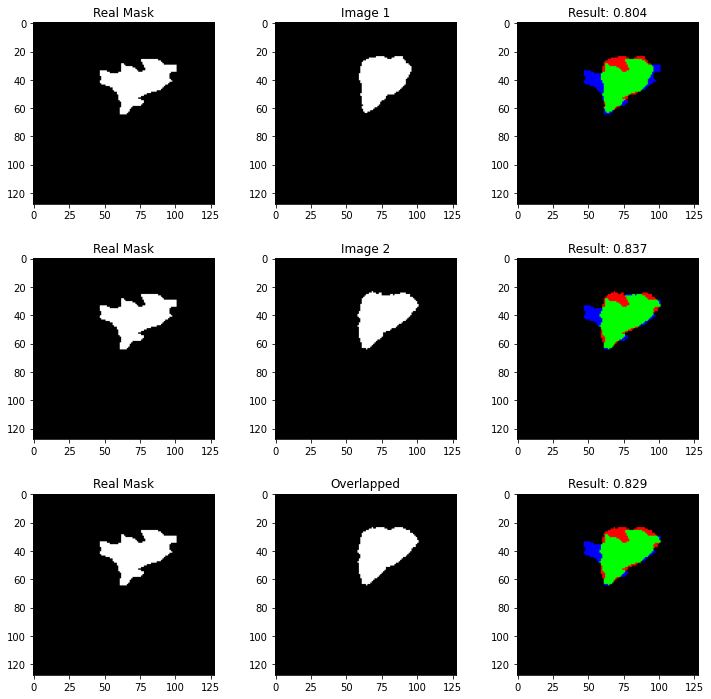

IMPROVED


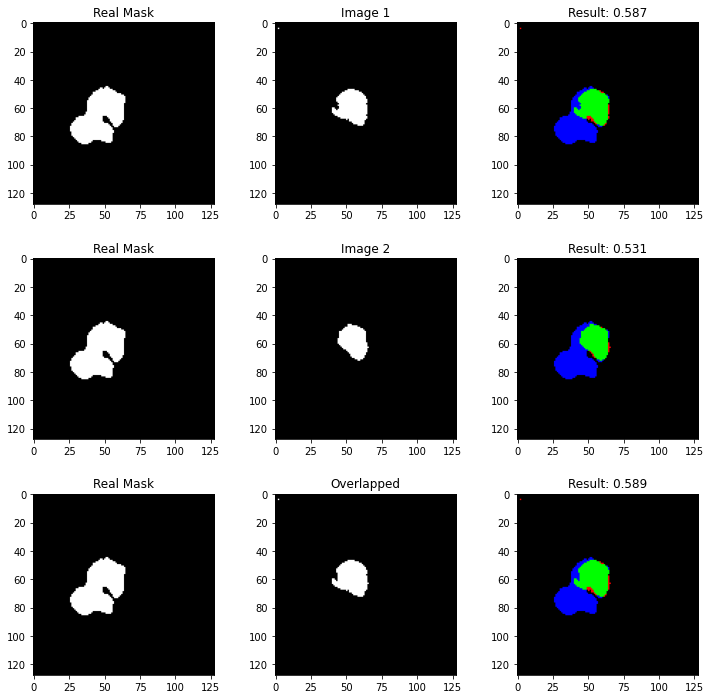

NOT


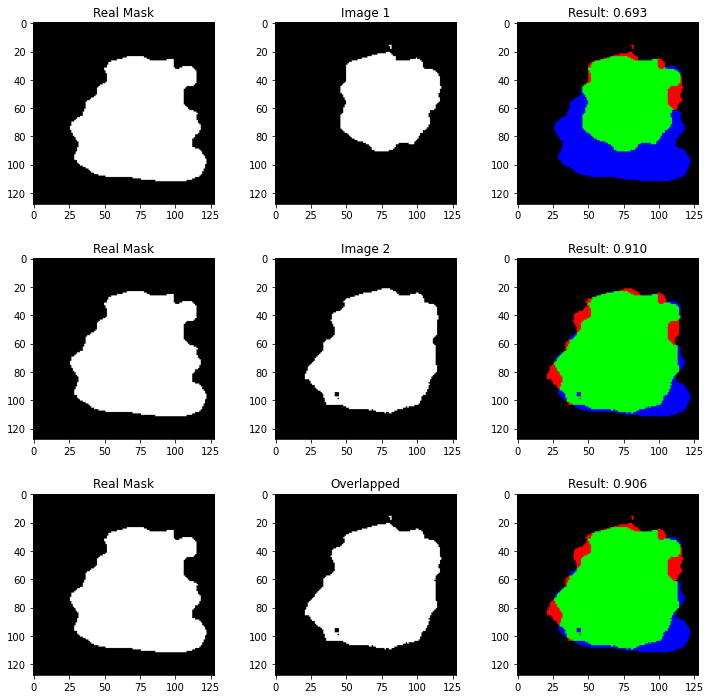

IMPROVED


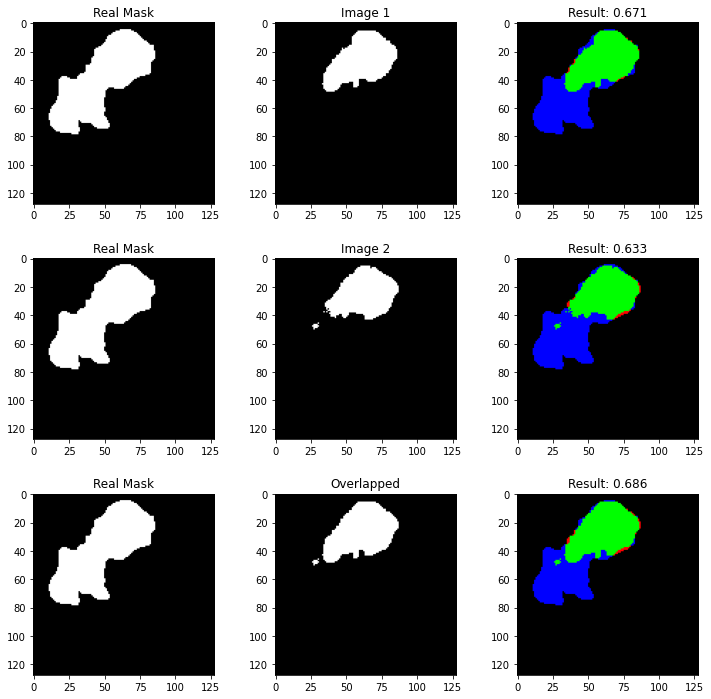

NOT


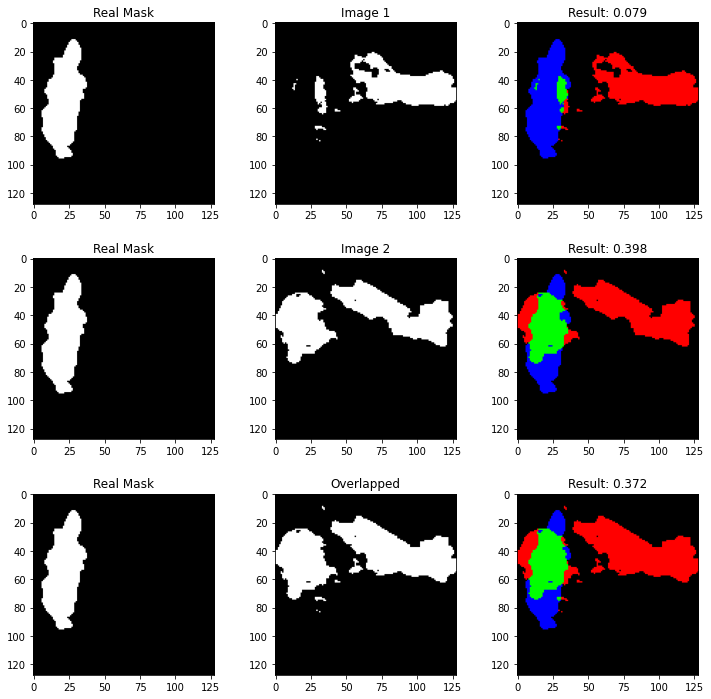

NOT


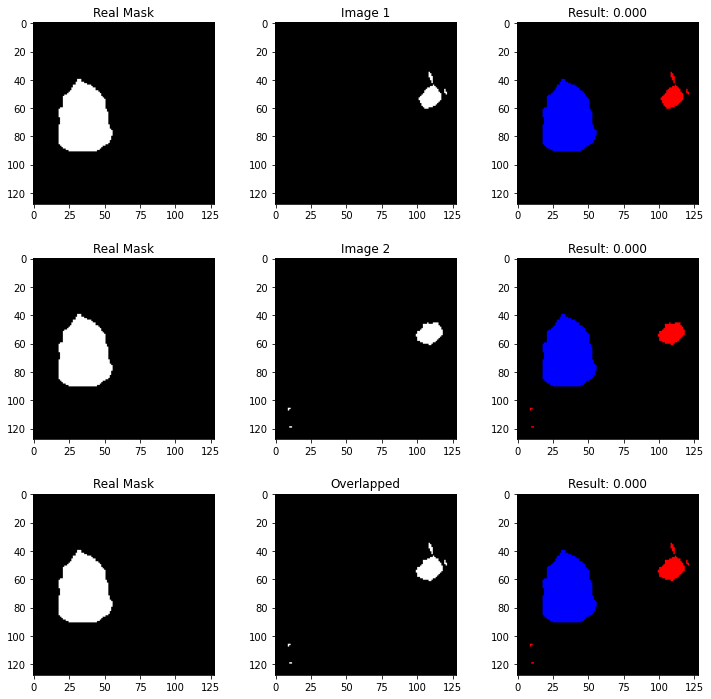

NOT


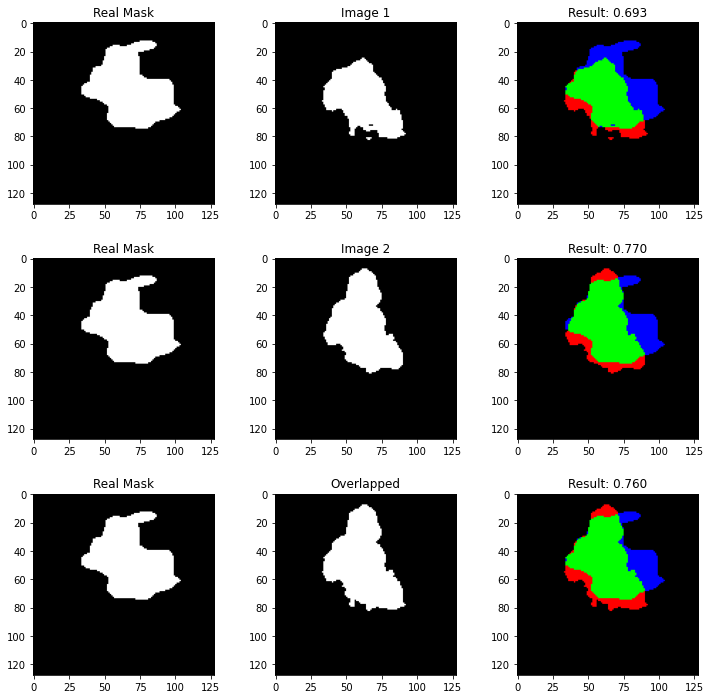

IMPROVED


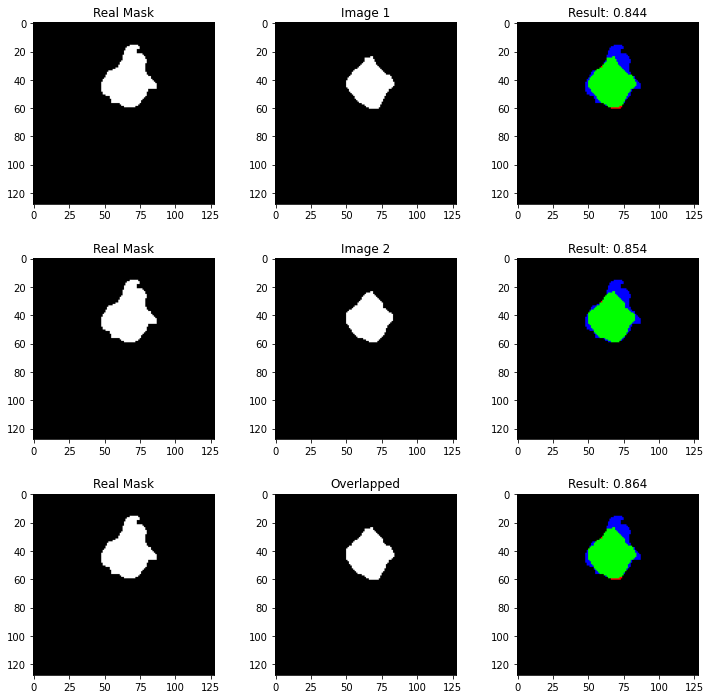

IMPROVED


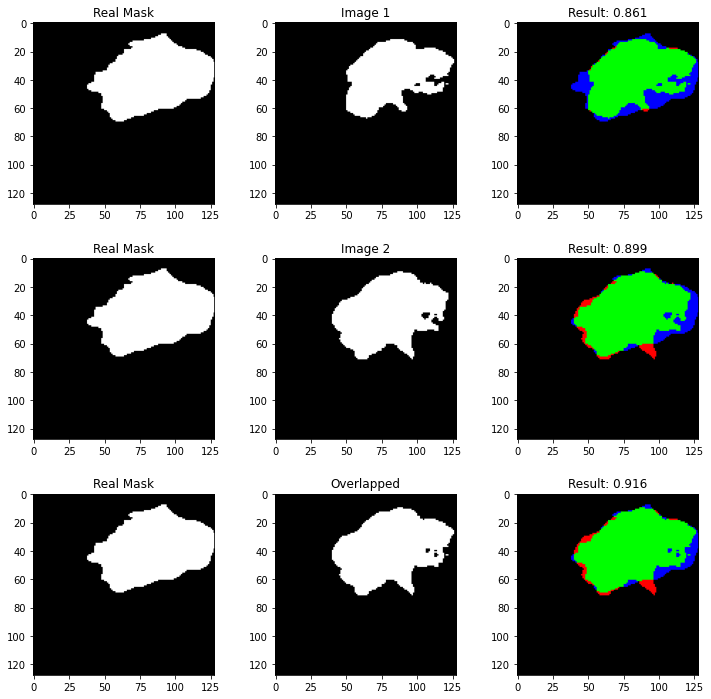

IMPROVED


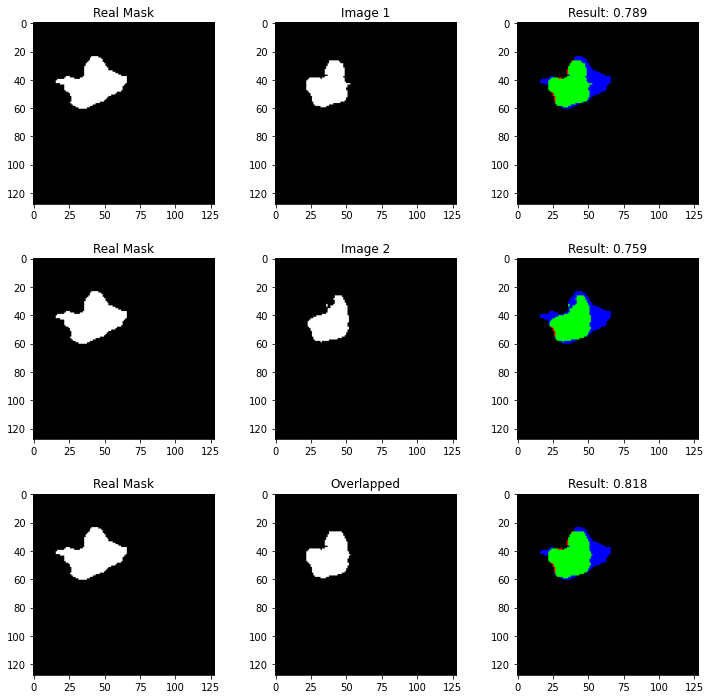

0.8056953795474135
0.8124541591880592
0.8114896696025284


In [112]:
dices1, dices2, dices_over = [], [], []
for n, (s, f) in enumerate(zip(sorted(glob.glob(sequential_paths)), sorted(glob.glob(functional_paths)))):
#     if n > 0:
#         break
    label = f.split("/")[-1].split("_")[0]
    if label == "tensor([0.])":
        label = 'benign'
    else:
        label = "malignant"
    id_ = f.split("/")[-1].split("_")[1]
    mask = cv2.imread(f"/home/carlos/Documentos/proyectos/breast_cancer/Datasets/Dataset_BUSI_with_GT_postprocessed_128/masks/{label}_id_{id_}_mask.png", 0)    
    img_s = cv2.imread(s, 0)
    img_f = cv2.imread(f, 0)

    dice1, dice2, dice_over = plot_common_pixels(img_s, img_f, mask)
    dices1.append(dice1)
    dices2.append(dice2)
    dices_over.append(dice_over)

print(np.mean(dices1))
print(np.mean(dices2))
print(np.mean(dices_over))

In [110]:
import numpy as np
import matplotlib.pyplot as plt

def plot_common_pixels(image1, image2, real_mask):
    
    tp_color = [0, 1, 0]  # green
    fp_color = [1, 0, 0]  # red
    fn_color = [0, 0, 1]  # blue

    
    
    # Compute the common pixels
    common_pixels = np.logical_or(image1, image2)
    

    # Create a figure with three rows and three columns of subplots
    fig, axs = plt.subplots(3, 3, figsize=(12, 12))
    
    # Plot the real mask in the first row, first column
    axs[0, 0].imshow(real_mask, cmap='gray')
    axs[0, 0].set_title('Real Mask')
    
    # Plot the first image in the second row, first column
    axs[1, 0].imshow(real_mask, cmap='gray')
    axs[1, 0].set_title('Real Mask')
    
    # Plot the second image in the third row, first column
    axs[2, 0].imshow(real_mask, cmap='gray')
    axs[2, 0].set_title('Real Mask')

    
    # Plot the common pixels in the second row, second column
    axs[0, 1].imshow(image1, cmap='gray')
    axs[0, 1].set_title('Image 1')
    
    # Plot the common pixels in the second row, second column
    axs[1, 1].imshow(image2, cmap='gray')
    axs[1, 1].set_title('Image 2')
    
    # Plot the false positives in the second row, third column
    axs[2, 1].imshow(common_pixels, cmap='gray')
    axs[2, 1].set_title('Overlapped')
    
    

    # Compute the false positives, false negatives, and true positives
    intersection = np.logical_and(mask, image1)
    fp = np.logical_and(image1, np.logical_not(mask))
    fn = np.logical_and(mask, np.logical_not(image1))
    dice1 = dice_score_from_np(mask, image1)

    # Create the final image with colors for true positive, false positive, and false negative pixels
    result = np.zeros((mask.shape[0], mask.shape[1], 3))
    result[..., 0] = fp_color[0] * fp + fn_color[0] * fn + tp_color[0] * intersection
    result[..., 1] = fp_color[1] * fp + fn_color[1] * fn + tp_color[1] * intersection
    result[..., 2] = fp_color[2] * fp + fn_color[2] * fn + tp_color[2] * intersection

    axs[0, 2].imshow(result)
    axs[0, 2].set_title(f'Result: {dice1:.3f}')
    

    
    
    # Compute the false positives, false negatives, and true positives
    intersection = np.logical_and(mask, image2)
    fp = np.logical_and(image2, np.logical_not(mask))
    fn = np.logical_and(mask, np.logical_not(image2))
    dice2 = dice_score_from_np(mask, image2)
    # Create the final image with colors for true positive, false positive, and false negative pixels
    result = np.zeros((mask.shape[0], mask.shape[1], 3))
    result[..., 0] = fp_color[0] * fp + fn_color[0] * fn + tp_color[0] * intersection
    result[..., 1] = fp_color[1] * fp + fn_color[1] * fn + tp_color[1] * intersection
    result[..., 2] = fp_color[2] * fp + fn_color[2] * fn + tp_color[2] * intersection

    axs[1, 2].imshow(result)
    axs[1, 2].set_title(f'Result: {dice2:.3f}')
    
    
    
    # Compute the false positives, false negatives, and true positives
    intersection = np.logical_and(mask, common_pixels)
    fp = np.logical_and(common_pixels, np.logical_not(mask))
    fn = np.logical_and(mask, np.logical_not(common_pixels))
    dice_over = dice_score_from_np(mask, common_pixels)
    # Create the final image with colors for true positive, false positive, and false negative pixels
    result = np.zeros((mask.shape[0], mask.shape[1], 3))
    result[..., 0] = fp_color[0] * fp + fn_color[0] * fn + tp_color[0] * intersection
    result[..., 1] = fp_color[1] * fp + fn_color[1] * fn + tp_color[1] * intersection
    result[..., 2] = fp_color[2] * fp + fn_color[2] * fn + tp_color[2] * intersection

    axs[2, 2].imshow(result)
    axs[2, 2].set_title(f'Result: {dice_over:.3f}')
    
    
    # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    
    
    if (dice_over > dice1) & (dice_over > dice2):
        print("IMPROVED")
    else:
        print("NOT")
        
    # Show the plot
    plt.show()
    
    return dice1, dice2, dice_over

IMPROVED


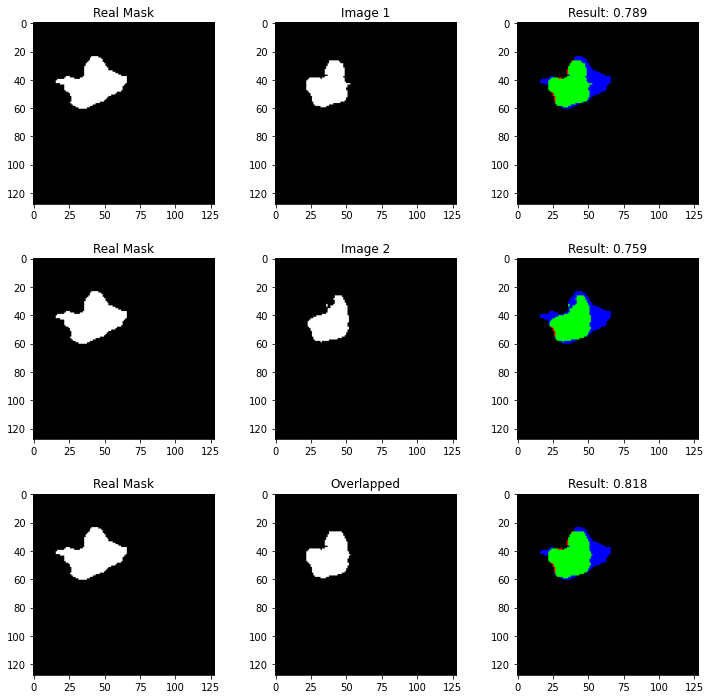

(0.7894406033940917, 0.7589343729694606, 0.8176795580110497)

In [111]:
plot_common_pixels(img_s, img_f, mask)

In [33]:
image_path = "/home/carlos/Documentos/proyectos/breast_cancer/runs/20231002_000350_FSB_BTS_UNet_24_batch_1_benign_malignant/fold_0/segs/malignant_47_seg.png"
mask = cv2.imread(image_path, 0)

In [34]:
import numpy as np
from scipy.ndimage import binary_closing

def fill_holes_in_segmentation(segmentation_mask):
    # Apply binary closing to fill holes
    filled_mask = binary_closing(segmentation_mask, structure=np.ones((10,10)))

    return filled_mask

filled_mask = fill_holes_in_segmentation(mask)

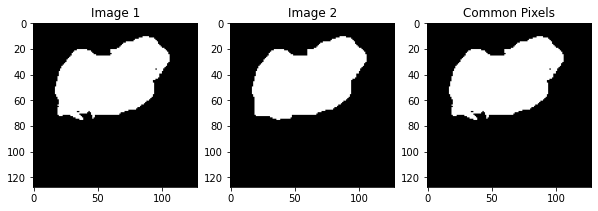

In [35]:
plot_common_pixels(mask, filled_mask, mask)